In [4]:
from __future__ import division
import numpy as np
import glob

In [19]:
data_type = 'genie'
nu_type ="NuTau"
int_type = 1
folder = '1' 
files = '1'

n_files = 100
i3_per_npz = 10 # 10 for NuE1 and NuMu1, 100 otherwise

name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'#+str(files)+'?_'
#name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)
#name = nu_type+'_'+str(int_type)
name2 = "BUMP3_"+nu_type+'_'+str(int_type)+'_'+str(folder)+'_'#+str(files)

print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3

DEFAULT_INDEX = 2.88
DEFAULT_PHI = 2.1467

outer_strings = set([1,2,3,4,5,6,7,13,14,21,22,30,31,40,41,50,51,59,60,67,68,72,73,74,75,76,77,78])

NuTau_1_1_


In [20]:
def get_rates_genie(one_weights, nu_E, n_npz_files, i3_per_npz, evts_per_i3file, spectral_index=DEFAULT_INDEX, phi_0=DEFAULT_PHI):
    ''' returns the per-year weights for the given input parameters '''
    total_events = n_npz_files*i3_per_npz*evts_per_i3file
    secs_per_year = 31536000
    
    flux_weights = 1e-18*secs_per_year*phi_0*(nu_E/100e3)**(-spectral_index)

    return flux_weights/total_events*one_weights

In [21]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
preds_dtype = np.dtype(
    [     
        ('n1', np.float32),
        ('n2', np.float32),
        ('n3', np.float32),
        ('n4', np.float32)
    ]
)
map_dtype = np.dtype(
    [
        ("id", id_dtype),
        ('raw', np.int32),
        ('st_raw', np.int32,(3)),
        ('pulses', np.int32),
        ('st_pulses', np.int32,(3)),
        ('cal', np.int32),
        ('st_cal', np.int32,(3)),
        ('hlc', np.int32),
        ('st_hlc', np.int32,(3)),
        ('slc', np.int32),
        ('st_slc', np.int32,(3))
    ]
)
st_info_dtype = np.dtype(
    [
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)

particle_dtype = np.dtype(
    [
        ("tree_id", np.uint32,(2)),
        ("pdg", np.int32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
veto_dtype = np.dtype(                                             
    [                                                                             
        ("SPE_rlogl", np.float32),                                                      
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),                                                   
        ("Cascade_rlogl_noDC", np.float32),                                              
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),                                             
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)

hese_dtype = np.dtype(                                             
    [                                                                             
        ("qtot", np.float32),
        ("vheselfveto", np.bool_),
        ("vheselfvetovertexpos", np.float32,(3)),
        ("vheselfvetovertextime", np.float32),
        ("llhratio", np.float32)
    ]
)
#if data_type =='genie':
WEIGHT_KEY = "I3MCWeightDict"
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32), 
        ('TotalColumnDepthCGS',np.float32), 
        ('MaxAzimuth',np.float32), 
        ('SelectionWeight',np.float32), 
        ('InIceNeutrinoEnergy',np.float32), 
        ('PowerLawIndex',np.float32), 
        ('TotalPrimaryWeight',np.float32), 
        ('PrimaryNeutrinoZenith',np.float32), 
        ('TotalWeight',np.float32), 
        ('PropagationWeight',np.float32), 
        ('NInIceNus',np.float32), 
        ('TrueActiveLengthBefore',np.float32), 
        ('TypeWeight',np.float32), 
        ('PrimaryNeutrinoType',np.float32), 
        ('RangeInMeter',np.float32), 
        ('BjorkenY',np.float32), 
        ('MinZenith',np.float32), 
        ('InIceNeutrinoType',np.float32), 
        ('CylinderRadius',np.float32), 
        ('BjorkenX',np.float32), 
        ('InteractionPositionWeight',np.float32), 
        ('RangeInMWE',np.float32), 
        ('InteractionColumnDepthCGS',np.float32), 
        ('CylinderHeight',np.float32), 
        ('MinAzimuth',np.float32), 
        ('TotalXsectionCGS',np.float32), 
        ('OneWeightPerType',np.float32), 
        ('ImpactParam',np.float32), 
        ('InteractionType',np.float32), 
        ('TrueActiveLengthAfter',np.float32), 
        ('MaxZenith',np.float32), 
        ('InteractionXsectionCGS',np.float32), 
        ('PrimaryNeutrinoEnergy',np.float32), 
        ('DirectionWeight',np.float32), 
        ('InjectionAreaCGS',np.float32), 
        ('MinEnergyLog',np.float32), 
        ('SolidAngle',np.float32), 
        ('LengthInVolume',np.float32), 
        ('NEvents',np.uint32), 
        ('OneWeight',np.float32), 
        ('MaxEnergyLog',np.float32), 
        ('InteractionWeight',np.float32), 
        ('EnergyLost',np.float32)
    ]
)

info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),

        ("hese3", hese_dtype),
        ("hese4", hese_dtype),
        ("hese5", hese_dtype),
        ("hese6", hese_dtype),
        ("hese7", hese_dtype),
        ("hese8", hese_dtype),
        ("hese9", hese_dtype),
        ("hese10", hese_dtype),
        ("hese11", hese_dtype),
        ("hese12", hese_dtype),
        ("llhcut",np.float32),
        ("weight", weight_dtype),
        ("weight_val",np.float32)

    ]
)
save_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),    
        ("qtot", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),

        ("hese3", hese_dtype),
        ("hese4", hese_dtype),
        ("hese5", hese_dtype),
        ("hese6", hese_dtype),
        ("hese7", hese_dtype),
        ("hese8", hese_dtype),
        ("hese9", hese_dtype),
        ("hese10", hese_dtype),
        ("hese11", hese_dtype),
        ("hese12", hese_dtype),
        ("llhcut",np.float32),
        ("weight", weight_dtype),
        ("weight_it",np.float32),
        ("weight_val",np.float32)

    ])
save_3_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),                
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qoth", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("wf_times", np.float,(180,3)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype)

    ]
)
save_2_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)

In [8]:
# size = 0
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#     for e in x:
#         if (e['qst']['q'][0][0] >= 2000):
#             size = size +1
#     print(file_name, len(x))
# print(size)

In [22]:
size = 0
#for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
for file_name in glob.glob('/home/dup193/work/double_pulse/data/nutau_hese_test/*_data.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, len(x))
    size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_88_1_l2_00000882_data.npz 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_36_1_l2_00000363_data.npz 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_17_1_l2_00000176_data.npz 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_38_1_l2_00000381_data.npz 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_85_1_l2_00000859_data.npz 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_96_1_l2_00000968_data.npz 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_22_1_l2_00000222_data.npz 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_7_1_l2_00000073_data.npz 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau_1_1_95_1_l2_00000950_data.npz 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_vars_NuTau

In [11]:
import tensorflow as tf
import os
physical_devices = tf.config.list_physical_devices()
print(physical_devices) 

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2,3,4"
from tensorflow.keras.models import load_model
model = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_2/vgg16_200k_QSt2000_dataset_norm_2.h5')
model_m = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_muon/vgg16_200k_QSt2000_dataset_norm_muon.h5')
model_3 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_300k_noQst2000_TvsE/vgg16_300k_noQSt2000_dataset_norm_TvsE_2.h5')
model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_700k_Qst_2000_MuvsTau_3/vgg16_700k_QSt2000_dataset_norm_MuVsTau_3.h5')
#model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_600k_Qst_2000_3class_classweight/vgg16_600k_QSt2000_dataset_norm_3class_classweight5.h5')

mean = 0.0012322452384978533 
std = 0.009694634936749935
mean_3 = 0.0002464977151248604
std_3 = 0.00594472698867321
mean_4 = 0.00036459346301853657
std_4 = 0.007035365793853998


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:2', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:3', device_type='XLA_GPU')]


In [16]:
from tqdm import tqdm

In [27]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_hese_test_2'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in tqdm(glob.glob('/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_*_data.npz')):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    y = np.zeros(x.shape[0],dtype = save_dtype)
    print(file_name, x.shape)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_4)/std_4
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)

    for n,e in enumerate(x):       
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","preds","qtot","cog","moi","ti","qst","qst_all", "map", "primary","prim_daughter","logan_veto","hese_old","hese3", "hese4",\
           "hese5","hese6","hese7", "hese8","hese9","hese10","hese11","hese12","llhcut","weight","weight_it",'weight_val']][n]=\
        (e["id"],preds,e["qtot"],e["cog"],e["moi"],e["ti"],e["qst"],e["qst_all"], e["map"], e["primary"],\
         e["prim_daughter"],e["logan_veto"],e["hese_old"],e["hese3"], e["hese4"],e["hese5"],e["hese6"],\
         e["hese7"], e["hese8"],e["hese9"],e["hese10"],e["hese11"],e["hese12"],e["llhcut"],e["weight"],e["weight_val"], weight_val)
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    #print(y['out_st'])
    print(data[pos:pos+len(x)].shape,y.shape,pos,len(x))
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)


  0%|          | 0/999 [00:00<?, ?it/s]

NuTau_1_1_
#.npz files =  100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000342_data.npz (89, 1)


  0%|          | 1/999 [00:03<1:01:02,  3.67s/it]

(89,) (89,) 0 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000227_data.npz (95, 1)


  0%|          | 2/999 [00:07<1:01:40,  3.71s/it]

(95,) (95,) 89 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000184_data.npz (96, 1)


  0%|          | 3/999 [00:11<1:02:20,  3.76s/it]

(96,) (96,) 184 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000572_data.npz (111, 1)


  0%|          | 4/999 [00:15<1:05:36,  3.96s/it]

(111,) (111,) 280 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000031_data.npz (108, 1)


  1%|          | 5/999 [00:20<1:07:24,  4.07s/it]

(108,) (108,) 391 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000873_data.npz (103, 1)


  1%|          | 6/999 [00:24<1:07:36,  4.09s/it]

(103,) (103,) 499 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000399_data.npz (103, 1)


  1%|          | 7/999 [00:28<1:07:42,  4.10s/it]

(103,) (103,) 602 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000418_data.npz (97, 1)


  1%|          | 8/999 [00:32<1:06:35,  4.03s/it]

(97,) (97,) 705 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000710_data.npz (107, 1)


  1%|          | 9/999 [00:36<1:07:45,  4.11s/it]

(107,) (107,) 802 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000784_data.npz (103, 1)


  1%|          | 10/999 [00:41<1:11:29,  4.34s/it]

(103,) (103,) 909 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000608_data.npz (139, 1)


  1%|          | 11/999 [00:46<1:17:18,  4.69s/it]

(139,) (139,) 1012 139
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000454_data.npz (89, 1)


  1%|          | 12/999 [00:50<1:11:42,  4.36s/it]

(89,) (89,) 1151 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000793_data.npz (98, 1)


  1%|▏         | 13/999 [00:54<1:09:30,  4.23s/it]

(98,) (98,) 1240 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000800_data.npz (107, 1)


  1%|▏         | 14/999 [00:58<1:09:36,  4.24s/it]

(107,) (107,) 1338 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000907_data.npz (111, 1)


  2%|▏         | 15/999 [01:03<1:10:29,  4.30s/it]

(111,) (111,) 1445 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000133_data.npz (103, 1)


  2%|▏         | 16/999 [01:07<1:09:38,  4.25s/it]

(103,) (103,) 1556 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000936_data.npz (112, 1)


  2%|▏         | 17/999 [01:11<1:10:42,  4.32s/it]

(112,) (112,) 1659 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000236_data.npz (100, 1)


  2%|▏         | 18/999 [01:15<1:09:07,  4.23s/it]

(100,) (100,) 1771 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000843_data.npz (110, 1)


  2%|▏         | 19/999 [01:20<1:09:53,  4.28s/it]

(110,) (110,) 1871 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000534_data.npz (128, 1)


  2%|▏         | 20/999 [01:25<1:13:54,  4.53s/it]

(128,) (128,) 1981 128
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000697_data.npz (88, 1)


  2%|▏         | 21/999 [01:28<1:09:00,  4.23s/it]

(88,) (88,) 2109 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000379_data.npz (97, 1)


  2%|▏         | 22/999 [01:32<1:07:09,  4.12s/it]

(97,) (97,) 2197 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000186_data.npz (114, 1)


  2%|▏         | 23/999 [01:37<1:09:10,  4.25s/it]

(114,) (114,) 2294 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000435_data.npz (120, 1)


  2%|▏         | 24/999 [01:42<1:11:49,  4.42s/it]

(120,) (120,) 2408 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000028_data.npz (101, 1)


  3%|▎         | 25/999 [01:46<1:10:04,  4.32s/it]

(101,) (101,) 2528 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000894_data.npz (103, 1)


  3%|▎         | 26/999 [01:50<1:09:02,  4.26s/it]

(103,) (103,) 2629 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000358_data.npz (117, 1)


  3%|▎         | 27/999 [01:54<1:11:03,  4.39s/it]

(117,) (117,) 2732 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000032_data.npz (121, 1)


  3%|▎         | 28/999 [01:59<1:13:06,  4.52s/it]

(121,) (121,) 2849 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000325_data.npz (100, 1)


  3%|▎         | 29/999 [02:03<1:10:41,  4.37s/it]

(100,) (100,) 2970 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000122_data.npz (99, 1)


  3%|▎         | 30/999 [02:07<1:08:45,  4.26s/it]

(99,) (99,) 3070 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000930_data.npz (96, 1)


  3%|▎         | 31/999 [02:11<1:06:48,  4.14s/it]

(96,) (96,) 3169 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000013_data.npz (113, 1)


  3%|▎         | 32/999 [02:16<1:08:31,  4.25s/it]

(113,) (113,) 3265 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000624_data.npz (87, 1)


  3%|▎         | 33/999 [02:19<1:04:49,  4.03s/it]

(87,) (87,) 3378 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000589_data.npz (98, 1)


  3%|▎         | 34/999 [02:23<1:04:14,  3.99s/it]

(98,) (98,) 3465 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000519_data.npz (130, 1)


  4%|▎         | 35/999 [02:28<1:09:58,  4.36s/it]

(130,) (130,) 3563 130
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000257_data.npz (103, 1)


  4%|▎         | 36/999 [02:32<1:08:49,  4.29s/it]

(103,) (103,) 3693 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000256_data.npz (91, 1)


  4%|▎         | 37/999 [02:36<1:05:47,  4.10s/it]

(91,) (91,) 3796 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000324_data.npz (103, 1)


  4%|▍         | 38/999 [02:40<1:05:51,  4.11s/it]

(103,) (103,) 3887 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000335_data.npz (111, 1)


  4%|▍         | 39/999 [02:45<1:07:21,  4.21s/it]

(111,) (111,) 3990 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000175_data.npz (101, 1)


  4%|▍         | 40/999 [02:49<1:06:29,  4.16s/it]

(101,) (101,) 4101 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000472_data.npz (97, 1)


  4%|▍         | 41/999 [02:53<1:05:10,  4.08s/it]

(97,) (97,) 4202 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000908_data.npz (115, 1)


  4%|▍         | 42/999 [02:57<1:07:36,  4.24s/it]

(115,) (115,) 4299 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000652_data.npz (96, 1)


  4%|▍         | 43/999 [03:01<1:05:41,  4.12s/it]

(96,) (96,) 4414 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000312_data.npz (108, 1)


  4%|▍         | 44/999 [03:05<1:06:35,  4.18s/it]

(108,) (108,) 4510 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000848_data.npz (98, 1)


  5%|▍         | 45/999 [03:09<1:05:23,  4.11s/it]

(98,) (98,) 4618 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000928_data.npz (118, 1)


  5%|▍         | 46/999 [03:14<1:08:02,  4.28s/it]

(118,) (118,) 4716 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000082_data.npz (115, 1)


  5%|▍         | 47/999 [03:19<1:09:15,  4.37s/it]

(115,) (115,) 4834 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000145_data.npz (98, 1)


  5%|▍         | 48/999 [03:22<1:07:09,  4.24s/it]

(98,) (98,) 4949 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000806_data.npz (94, 1)


  5%|▍         | 49/999 [03:26<1:04:51,  4.10s/it]

(94,) (94,) 5047 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000558_data.npz (98, 1)


  5%|▌         | 50/999 [03:30<1:04:03,  4.05s/it]

(98,) (98,) 5141 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000135_data.npz (100, 1)


  5%|▌         | 51/999 [03:34<1:03:46,  4.04s/it]

(100,) (100,) 5239 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000879_data.npz (103, 1)


  5%|▌         | 52/999 [03:38<1:04:15,  4.07s/it]

(103,) (103,) 5339 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000284_data.npz (92, 1)


  5%|▌         | 53/999 [03:42<1:02:28,  3.96s/it]

(92,) (92,) 5442 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000641_data.npz (113, 1)


  5%|▌         | 54/999 [03:47<1:05:05,  4.13s/it]

(113,) (113,) 5534 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000549_data.npz (119, 1)


  6%|▌         | 55/999 [03:51<1:07:59,  4.32s/it]

(119,) (119,) 5647 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000157_data.npz (119, 1)


  6%|▌         | 56/999 [03:56<1:09:59,  4.45s/it]

(119,) (119,) 5766 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000861_data.npz (76, 1)


  6%|▌         | 57/999 [03:59<1:03:33,  4.05s/it]

(76,) (76,) 5885 76
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000356_data.npz (114, 1)


  6%|▌         | 58/999 [04:04<1:05:50,  4.20s/it]

(114,) (114,) 5961 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000382_data.npz (103, 1)


  6%|▌         | 59/999 [04:08<1:05:24,  4.17s/it]

(103,) (103,) 6075 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000395_data.npz (94, 1)


  6%|▌         | 60/999 [04:12<1:03:28,  4.06s/it]

(94,) (94,) 6178 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000308_data.npz (123, 1)


  6%|▌         | 61/999 [04:17<1:07:22,  4.31s/it]

(123,) (123,) 6272 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000973_data.npz (109, 1)


  6%|▌         | 62/999 [04:21<1:07:37,  4.33s/it]

(109,) (109,) 6395 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000575_data.npz (114, 1)


  6%|▋         | 63/999 [04:25<1:08:37,  4.40s/it]

(114,) (114,) 6504 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000976_data.npz (119, 1)


  6%|▋         | 64/999 [04:30<1:10:13,  4.51s/it]

(119,) (119,) 6618 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000239_data.npz (113, 1)


  7%|▋         | 65/999 [04:35<1:10:14,  4.51s/it]

(113,) (113,) 6737 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000272_data.npz (97, 1)


  7%|▋         | 66/999 [04:39<1:07:23,  4.33s/it]

(97,) (97,) 6850 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000419_data.npz (113, 1)


  7%|▋         | 67/999 [04:43<1:08:07,  4.39s/it]

(113,) (113,) 6947 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000319_data.npz (100, 1)


  7%|▋         | 68/999 [04:47<1:06:24,  4.28s/it]

(100,) (100,) 7060 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000113_data.npz (127, 1)


  7%|▋         | 69/999 [04:52<1:10:04,  4.52s/it]

(127,) (127,) 7160 127
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000722_data.npz (101, 1)


  7%|▋         | 70/999 [04:56<1:07:52,  4.38s/it]

(101,) (101,) 7287 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000996_data.npz (133, 1)


  7%|▋         | 71/999 [05:02<1:12:13,  4.67s/it]

(133,) (133,) 7388 133
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000266_data.npz (117, 1)


  7%|▋         | 72/999 [05:06<1:12:11,  4.67s/it]

(117,) (117,) 7521 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000211_data.npz (101, 1)


  7%|▋         | 73/999 [05:10<1:09:16,  4.49s/it]

(101,) (101,) 7638 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000739_data.npz (102, 1)


  7%|▋         | 74/999 [05:15<1:07:26,  4.38s/it]

(102,) (102,) 7739 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000771_data.npz (105, 1)


  8%|▊         | 75/999 [05:19<1:06:39,  4.33s/it]

(105,) (105,) 7841 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000130_data.npz (115, 1)


  8%|▊         | 76/999 [05:23<1:07:59,  4.42s/it]

(115,) (115,) 7946 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000019_data.npz (105, 1)


  8%|▊         | 77/999 [05:28<1:07:00,  4.36s/it]

(105,) (105,) 8061 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000801_data.npz (130, 1)


  8%|▊         | 78/999 [05:33<1:10:56,  4.62s/it]

(130,) (130,) 8166 130
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000468_data.npz (114, 1)


  8%|▊         | 79/999 [05:37<1:10:42,  4.61s/it]

(114,) (114,) 8296 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000273_data.npz (94, 1)


  8%|▊         | 80/999 [05:41<1:06:56,  4.37s/it]

(94,) (94,) 8410 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000876_data.npz (117, 1)


  8%|▊         | 81/999 [05:46<1:08:21,  4.47s/it]

(117,) (117,) 8504 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000528_data.npz (123, 1)


  8%|▊         | 82/999 [05:51<1:10:20,  4.60s/it]

(123,) (123,) 8621 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000374_data.npz (106, 1)


  8%|▊         | 83/999 [05:55<1:08:43,  4.50s/it]

(106,) (106,) 8744 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000263_data.npz (114, 1)


  8%|▊         | 84/999 [06:00<1:09:00,  4.52s/it]

(114,) (114,) 8850 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000673_data.npz (107, 1)


  9%|▊         | 85/999 [06:04<1:07:54,  4.46s/it]

(107,) (107,) 8964 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000148_data.npz (102, 1)


  9%|▊         | 86/999 [06:08<1:06:16,  4.36s/it]

(102,) (102,) 9071 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000037_data.npz (104, 1)


  9%|▊         | 87/999 [06:12<1:05:32,  4.31s/it]

(104,) (104,) 9173 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000696_data.npz (130, 1)


  9%|▉         | 88/999 [06:18<1:09:48,  4.60s/it]

(130,) (130,) 9277 130
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000168_data.npz (118, 1)


  9%|▉         | 89/999 [06:22<1:10:26,  4.64s/it]

(118,) (118,) 9407 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000587_data.npz (107, 1)


  9%|▉         | 90/999 [06:27<1:08:44,  4.54s/it]

(107,) (107,) 9525 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000323_data.npz (123, 1)


  9%|▉         | 91/999 [06:32<1:10:23,  4.65s/it]

(123,) (123,) 9632 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000504_data.npz (109, 1)


  9%|▉         | 92/999 [06:36<1:09:56,  4.63s/it]

(109,) (109,) 9755 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000027_data.npz (96, 1)


  9%|▉         | 93/999 [06:40<1:06:21,  4.39s/it]

(96,) (96,) 9864 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000816_data.npz (99, 1)


  9%|▉         | 94/999 [06:44<1:04:19,  4.26s/it]

(99,) (99,) 9960 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000376_data.npz (109, 1)


 10%|▉         | 95/999 [06:48<1:04:40,  4.29s/it]

(109,) (109,) 10059 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000518_data.npz (89, 1)


 10%|▉         | 96/999 [06:52<1:01:26,  4.08s/it]

(89,) (89,) 10168 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000058_data.npz (98, 1)


 10%|▉         | 97/999 [06:56<1:00:46,  4.04s/it]

(98,) (98,) 10257 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000865_data.npz (107, 1)


 10%|▉         | 98/999 [07:00<1:01:51,  4.12s/it]

(107,) (107,) 10355 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000217_data.npz (106, 1)


 10%|▉         | 99/999 [07:04<1:02:21,  4.16s/it]

(106,) (106,) 10462 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000890_data.npz (101, 1)


 10%|█         | 100/999 [07:08<1:01:48,  4.12s/it]

(101,) (101,) 10568 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000618_data.npz (98, 1)


 10%|█         | 101/999 [07:12<1:00:57,  4.07s/it]

(98,) (98,) 10669 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000380_data.npz (97, 1)


 10%|█         | 102/999 [07:16<1:00:09,  4.02s/it]

(97,) (97,) 10767 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000061_data.npz (103, 1)


 10%|█         | 103/999 [07:20<1:00:34,  4.06s/it]

(103,) (103,) 10864 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000012_data.npz (119, 1)


 10%|█         | 104/999 [07:25<1:03:33,  4.26s/it]

(119,) (119,) 10967 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000720_data.npz (124, 1)


 11%|█         | 105/999 [07:30<1:06:34,  4.47s/it]

(124,) (124,) 11086 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000364_data.npz (99, 1)


 11%|█         | 106/999 [07:34<1:04:16,  4.32s/it]

(99,) (99,) 11210 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000760_data.npz (99, 1)


 11%|█         | 107/999 [07:38<1:02:42,  4.22s/it]

(99,) (99,) 11309 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000593_data.npz (86, 1)


 11%|█         | 108/999 [07:42<59:18,  3.99s/it]  

(86,) (86,) 11408 86
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000026_data.npz (102, 1)


 11%|█         | 109/999 [07:46<59:40,  4.02s/it]

(102,) (102,) 11494 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000422_data.npz (113, 1)


 11%|█         | 110/999 [07:50<1:01:51,  4.17s/it]

(113,) (113,) 11596 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000649_data.npz (122, 1)


 11%|█         | 111/999 [07:55<1:04:51,  4.38s/it]

(122,) (122,) 11709 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000307_data.npz (104, 1)


 11%|█         | 112/999 [07:59<1:03:52,  4.32s/it]

(104,) (104,) 11831 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000508_data.npz (114, 1)


 11%|█▏        | 113/999 [08:04<1:04:49,  4.39s/it]

(114,) (114,) 11935 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000939_data.npz (123, 1)


 11%|█▏        | 114/999 [08:09<1:07:11,  4.55s/it]

(123,) (123,) 12049 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000064_data.npz (99, 1)


 12%|█▏        | 115/999 [08:13<1:04:36,  4.38s/it]

(99,) (99,) 12172 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000886_data.npz (132, 1)


 12%|█▏        | 116/999 [08:18<1:08:25,  4.65s/it]

(132,) (132,) 12271 132
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000228_data.npz (95, 1)


 12%|█▏        | 117/999 [08:22<1:04:44,  4.40s/it]

(95,) (95,) 12403 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000079_data.npz (98, 1)


 12%|█▏        | 118/999 [08:26<1:02:34,  4.26s/it]

(98,) (98,) 12498 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000780_data.npz (97, 1)


 12%|█▏        | 119/999 [08:30<1:00:52,  4.15s/it]

(97,) (97,) 12596 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000535_data.npz (107, 1)


 12%|█▏        | 120/999 [08:34<1:01:20,  4.19s/it]

(107,) (107,) 12693 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000052_data.npz (121, 1)


 12%|█▏        | 121/999 [08:39<1:03:55,  4.37s/it]

(121,) (121,) 12800 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000337_data.npz (110, 1)


 12%|█▏        | 122/999 [08:43<1:04:02,  4.38s/it]

(110,) (110,) 12921 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000042_data.npz (101, 1)


 12%|█▏        | 123/999 [08:47<1:02:29,  4.28s/it]

(101,) (101,) 13031 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000446_data.npz (110, 1)


 12%|█▏        | 124/999 [08:52<1:02:59,  4.32s/it]

(110,) (110,) 13132 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000811_data.npz (94, 1)


 13%|█▎        | 125/999 [08:55<1:00:33,  4.16s/it]

(94,) (94,) 13242 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000860_data.npz (103, 1)


 13%|█▎        | 126/999 [08:59<1:00:21,  4.15s/it]

(103,) (103,) 13336 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000802_data.npz (103, 1)


 13%|█▎        | 127/999 [09:04<1:00:17,  4.15s/it]

(103,) (103,) 13439 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000623_data.npz (117, 1)


 13%|█▎        | 128/999 [09:08<1:02:28,  4.30s/it]

(117,) (117,) 13542 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000480_data.npz (113, 1)


 13%|█▎        | 129/999 [09:13<1:03:28,  4.38s/it]

(113,) (113,) 13659 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000679_data.npz (131, 1)


 13%|█▎        | 130/999 [09:18<1:07:06,  4.63s/it]

(131,) (131,) 13772 131
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000606_data.npz (121, 1)


 13%|█▎        | 131/999 [09:23<1:07:53,  4.69s/it]

(121,) (121,) 13903 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000496_data.npz (99, 1)


 13%|█▎        | 132/999 [09:27<1:04:37,  4.47s/it]

(99,) (99,) 14024 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000002_data.npz (115, 1)


 13%|█▎        | 133/999 [09:31<1:05:06,  4.51s/it]

(115,) (115,) 14123 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000174_data.npz (102, 1)


 13%|█▎        | 134/999 [09:36<1:03:17,  4.39s/it]

(102,) (102,) 14238 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000881_data.npz (116, 1)


 14%|█▎        | 135/999 [09:40<1:04:28,  4.48s/it]

(116,) (116,) 14340 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000706_data.npz (104, 1)


 14%|█▎        | 136/999 [09:44<1:03:01,  4.38s/it]

(104,) (104,) 14456 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000553_data.npz (105, 1)


 14%|█▎        | 137/999 [09:49<1:02:08,  4.33s/it]

(105,) (105,) 14560 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000393_data.npz (103, 1)


 14%|█▍        | 138/999 [09:53<1:01:08,  4.26s/it]

(103,) (103,) 14665 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000725_data.npz (90, 1)


 14%|█▍        | 139/999 [09:56<58:19,  4.07s/it]  

(90,) (90,) 14768 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000210_data.npz (91, 1)


 14%|█▍        | 140/999 [10:00<56:33,  3.95s/it]

(91,) (91,) 14858 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000817_data.npz (105, 1)


 14%|█▍        | 141/999 [10:04<57:36,  4.03s/it]

(105,) (105,) 14949 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000464_data.npz (100, 1)


 14%|█▍        | 142/999 [10:08<57:27,  4.02s/it]

(100,) (100,) 15054 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000063_data.npz (107, 1)


 14%|█▍        | 143/999 [10:12<58:29,  4.10s/it]

(107,) (107,) 15154 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000810_data.npz (96, 1)


 14%|█▍        | 144/999 [10:16<57:24,  4.03s/it]

(96,) (96,) 15261 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000240_data.npz (104, 1)


 15%|█▍        | 145/999 [10:21<57:57,  4.07s/it]

(104,) (104,) 15357 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000512_data.npz (115, 1)


 15%|█▍        | 146/999 [10:25<1:00:11,  4.23s/it]

(115,) (115,) 15461 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000007_data.npz (107, 1)


 15%|█▍        | 147/999 [10:29<1:00:19,  4.25s/it]

(107,) (107,) 15576 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000260_data.npz (112, 1)


 15%|█▍        | 148/999 [10:34<1:01:20,  4.32s/it]

(112,) (112,) 15683 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000474_data.npz (93, 1)


 15%|█▍        | 149/999 [10:38<58:48,  4.15s/it]  

(93,) (93,) 15795 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000025_data.npz (121, 1)


 15%|█▌        | 150/999 [10:42<1:01:32,  4.35s/it]

(121,) (121,) 15888 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000635_data.npz (101, 1)


 15%|█▌        | 151/999 [10:47<1:00:11,  4.26s/it]

(101,) (101,) 16009 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000612_data.npz (95, 1)


 15%|█▌        | 152/999 [10:50<58:15,  4.13s/it]  

(95,) (95,) 16110 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000946_data.npz (85, 1)


 15%|█▌        | 153/999 [10:54<55:15,  3.92s/it]

(85,) (85,) 16205 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000381_data.npz (116, 1)


 15%|█▌        | 154/999 [10:58<58:18,  4.14s/it]

(116,) (116,) 16290 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000986_data.npz (120, 1)


 16%|█▌        | 155/999 [11:03<1:01:04,  4.34s/it]

(120,) (120,) 16406 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000998_data.npz (102, 1)


 16%|█▌        | 156/999 [11:07<59:57,  4.27s/it]  

(102,) (102,) 16526 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000650_data.npz (86, 1)


 16%|█▌        | 157/999 [11:11<56:30,  4.03s/it]

(86,) (86,) 16628 86
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000533_data.npz (102, 1)


 16%|█▌        | 158/999 [11:15<56:45,  4.05s/it]

(102,) (102,) 16714 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000632_data.npz (108, 1)


 16%|█▌        | 159/999 [11:19<57:56,  4.14s/it]

(108,) (108,) 16816 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000948_data.npz (98, 1)


 16%|█▌        | 160/999 [11:23<57:04,  4.08s/it]

(98,) (98,) 16924 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000826_data.npz (97, 1)


 16%|█▌        | 161/999 [11:27<56:23,  4.04s/it]

(97,) (97,) 17022 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000712_data.npz (110, 1)


 16%|█▌        | 162/999 [11:32<57:50,  4.15s/it]

(110,) (110,) 17119 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000040_data.npz (112, 1)


 16%|█▋        | 163/999 [11:36<59:19,  4.26s/it]

(112,) (112,) 17229 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000370_data.npz (103, 1)


 16%|█▋        | 164/999 [11:40<58:46,  4.22s/it]

(103,) (103,) 17341 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000656_data.npz (98, 1)


 17%|█▋        | 165/999 [11:44<57:34,  4.14s/it]

(98,) (98,) 17444 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000698_data.npz (126, 1)


 17%|█▋        | 166/999 [11:49<1:01:12,  4.41s/it]

(126,) (126,) 17542 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000858_data.npz (117, 1)


 17%|█▋        | 167/999 [11:54<1:02:10,  4.48s/it]

(117,) (117,) 17668 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000104_data.npz (99, 1)


 17%|█▋        | 168/999 [11:58<1:00:00,  4.33s/it]

(99,) (99,) 17785 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000232_data.npz (92, 1)


 17%|█▋        | 169/999 [12:02<57:28,  4.15s/it]  

(92,) (92,) 17884 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000537_data.npz (110, 1)


 17%|█▋        | 170/999 [12:06<58:26,  4.23s/it]

(110,) (110,) 17976 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000091_data.npz (108, 1)


 17%|█▋        | 171/999 [12:10<58:49,  4.26s/it]

(108,) (108,) 18086 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000129_data.npz (87, 1)


 17%|█▋        | 172/999 [12:14<55:45,  4.05s/it]

(87,) (87,) 18194 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000259_data.npz (84, 1)


 17%|█▋        | 173/999 [12:17<53:05,  3.86s/it]

(84,) (84,) 18281 84
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000680_data.npz (89, 1)


 17%|█▋        | 174/999 [12:21<51:57,  3.78s/it]

(89,) (89,) 18365 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000957_data.npz (116, 1)


 18%|█▊        | 175/999 [12:25<55:22,  4.03s/it]

(116,) (116,) 18454 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000147_data.npz (111, 1)


 18%|█▊        | 176/999 [12:30<57:38,  4.20s/it]

(111,) (111,) 18570 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000978_data.npz (122, 1)


 18%|█▊        | 177/999 [12:35<1:00:19,  4.40s/it]

(122,) (122,) 18681 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000654_data.npz (99, 1)


 18%|█▊        | 178/999 [12:39<58:32,  4.28s/it]  

(99,) (99,) 18803 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000538_data.npz (97, 1)


 18%|█▊        | 179/999 [12:43<56:57,  4.17s/it]

(97,) (97,) 18902 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000297_data.npz (103, 1)


 18%|█▊        | 180/999 [12:47<56:40,  4.15s/it]

(103,) (103,) 18999 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000965_data.npz (113, 1)


 18%|█▊        | 181/999 [12:51<57:59,  4.25s/it]

(113,) (113,) 19102 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000072_data.npz (126, 1)


 18%|█▊        | 182/999 [12:56<1:00:58,  4.48s/it]

(126,) (126,) 19215 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000884_data.npz (114, 1)


 18%|█▊        | 183/999 [13:01<1:01:07,  4.49s/it]

(114,) (114,) 19341 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000022_data.npz (99, 1)


 18%|█▊        | 184/999 [13:05<58:55,  4.34s/it]  

(99,) (99,) 19455 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000551_data.npz (102, 1)


 19%|█▊        | 185/999 [13:09<57:48,  4.26s/it]

(102,) (102,) 19554 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000369_data.npz (103, 1)


 19%|█▊        | 186/999 [13:13<57:14,  4.22s/it]

(103,) (103,) 19656 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000689_data.npz (118, 1)


 19%|█▊        | 187/999 [13:18<59:03,  4.36s/it]

(118,) (118,) 19759 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000467_data.npz (111, 1)


 19%|█▉        | 188/999 [13:22<59:20,  4.39s/it]

(111,) (111,) 19877 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000143_data.npz (107, 1)


 19%|█▉        | 189/999 [13:27<58:46,  4.35s/it]

(107,) (107,) 19988 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000833_data.npz (91, 1)


 19%|█▉        | 190/999 [13:30<55:53,  4.15s/it]

(91,) (91,) 20095 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000620_data.npz (109, 1)


 19%|█▉        | 191/999 [13:35<56:37,  4.20s/it]

(109,) (109,) 20186 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000415_data.npz (99, 1)


 19%|█▉        | 192/999 [13:39<55:37,  4.14s/it]

(99,) (99,) 20295 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000832_data.npz (103, 1)


 19%|█▉        | 193/999 [13:43<55:29,  4.13s/it]

(103,) (103,) 20394 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000716_data.npz (97, 1)


 19%|█▉        | 194/999 [13:47<54:26,  4.06s/it]

(97,) (97,) 20497 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000333_data.npz (114, 1)


 20%|█▉        | 195/999 [13:51<56:22,  4.21s/it]

(114,) (114,) 20594 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000927_data.npz (97, 1)


 20%|█▉        | 196/999 [13:55<55:02,  4.11s/it]

(97,) (97,) 20708 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000743_data.npz (103, 1)


 20%|█▉        | 197/999 [13:59<55:02,  4.12s/it]

(103,) (103,) 20805 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000893_data.npz (96, 1)


 20%|█▉        | 198/999 [14:03<53:55,  4.04s/it]

(96,) (96,) 20908 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000062_data.npz (99, 1)


 20%|█▉        | 199/999 [14:07<53:27,  4.01s/it]

(99,) (99,) 21004 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000945_data.npz (112, 1)


 20%|██        | 200/999 [14:11<55:15,  4.15s/it]

(112,) (112,) 21103 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000420_data.npz (114, 1)


 20%|██        | 201/999 [14:16<56:44,  4.27s/it]

(114,) (114,) 21215 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000735_data.npz (109, 1)


 20%|██        | 202/999 [14:20<57:00,  4.29s/it]

(109,) (109,) 21329 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000847_data.npz (96, 1)


 20%|██        | 203/999 [14:24<55:15,  4.17s/it]

(96,) (96,) 21438 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000911_data.npz (107, 1)


 20%|██        | 204/999 [14:28<55:39,  4.20s/it]

(107,) (107,) 21534 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000555_data.npz (126, 1)


 21%|██        | 205/999 [14:34<58:56,  4.45s/it]

(126,) (126,) 21641 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000365_data.npz (104, 1)


 21%|██        | 206/999 [14:38<57:44,  4.37s/it]

(104,) (104,) 21767 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000423_data.npz (113, 1)


 21%|██        | 207/999 [14:42<58:10,  4.41s/it]

(113,) (113,) 21871 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000225_data.npz (110, 1)


 21%|██        | 208/999 [14:47<58:02,  4.40s/it]

(110,) (110,) 21984 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000206_data.npz (107, 1)


 21%|██        | 209/999 [14:51<57:24,  4.36s/it]

(107,) (107,) 22094 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000943_data.npz (112, 1)


 21%|██        | 210/999 [14:55<57:49,  4.40s/it]

(112,) (112,) 22201 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000690_data.npz (131, 1)


 21%|██        | 211/999 [15:01<1:00:52,  4.64s/it]

(131,) (131,) 22313 131
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000459_data.npz (126, 1)


 21%|██        | 212/999 [15:06<1:02:14,  4.75s/it]

(126,) (126,) 22444 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000804_data.npz (112, 1)


 21%|██▏       | 213/999 [15:10<1:01:06,  4.67s/it]

(112,) (112,) 22570 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000106_data.npz (101, 1)


 21%|██▏       | 214/999 [15:14<58:38,  4.48s/it]  

(101,) (101,) 22682 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000224_data.npz (110, 1)


 22%|██▏       | 215/999 [15:18<58:13,  4.46s/it]

(110,) (110,) 22783 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000719_data.npz (111, 1)


 22%|██▏       | 216/999 [15:23<58:09,  4.46s/it]

(111,) (111,) 22893 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000111_data.npz (117, 1)


 22%|██▏       | 217/999 [15:28<58:57,  4.52s/it]

(117,) (117,) 23004 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000166_data.npz (125, 1)


 22%|██▏       | 218/999 [15:33<1:00:49,  4.67s/it]

(125,) (125,) 23121 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000455_data.npz (107, 1)


 22%|██▏       | 219/999 [15:37<59:11,  4.55s/it]  

(107,) (107,) 23246 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000883_data.npz (103, 1)


 22%|██▏       | 220/999 [15:41<57:24,  4.42s/it]

(103,) (103,) 23353 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000598_data.npz (98, 1)


 22%|██▏       | 221/999 [15:45<55:34,  4.29s/it]

(98,) (98,) 23456 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000746_data.npz (96, 1)


 22%|██▏       | 222/999 [15:49<53:52,  4.16s/it]

(96,) (96,) 23554 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000721_data.npz (107, 1)


 22%|██▏       | 223/999 [15:53<54:13,  4.19s/it]

(107,) (107,) 23650 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000088_data.npz (97, 1)


 22%|██▏       | 224/999 [15:57<53:00,  4.10s/it]

(97,) (97,) 23757 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000952_data.npz (110, 1)


 23%|██▎       | 225/999 [16:01<54:04,  4.19s/it]

(110,) (110,) 23854 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000975_data.npz (99, 1)


 23%|██▎       | 226/999 [16:05<53:06,  4.12s/it]

(99,) (99,) 23964 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000597_data.npz (94, 1)


 23%|██▎       | 227/999 [16:09<51:42,  4.02s/it]

(94,) (94,) 24063 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000560_data.npz (114, 1)


 23%|██▎       | 228/999 [16:14<53:40,  4.18s/it]

(114,) (114,) 24157 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000920_data.npz (107, 1)


 23%|██▎       | 229/999 [16:18<53:58,  4.21s/it]

(107,) (107,) 24271 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000127_data.npz (107, 1)


 23%|██▎       | 230/999 [16:22<54:12,  4.23s/it]

(107,) (107,) 24378 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000694_data.npz (125, 1)


 23%|██▎       | 231/999 [16:27<57:01,  4.45s/it]

(125,) (125,) 24485 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000885_data.npz (118, 1)


 23%|██▎       | 232/999 [16:32<57:54,  4.53s/it]

(118,) (118,) 24610 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000318_data.npz (97, 1)


 23%|██▎       | 233/999 [16:36<55:27,  4.34s/it]

(97,) (97,) 24728 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000969_data.npz (116, 1)


 23%|██▎       | 234/999 [16:40<56:31,  4.43s/it]

(116,) (116,) 24825 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000222_data.npz (97, 1)


 24%|██▎       | 235/999 [16:44<54:28,  4.28s/it]

(97,) (97,) 24941 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000602_data.npz (102, 1)


 24%|██▎       | 236/999 [16:48<53:41,  4.22s/it]

(102,) (102,) 25038 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000585_data.npz (102, 1)


 24%|██▎       | 237/999 [16:53<53:07,  4.18s/it]

(102,) (102,) 25140 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000067_data.npz (119, 1)


 24%|██▍       | 238/999 [16:57<55:22,  4.37s/it]

(119,) (119,) 25242 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000303_data.npz (120, 1)


 24%|██▍       | 239/999 [17:02<57:00,  4.50s/it]

(120,) (120,) 25361 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000569_data.npz (94, 1)


 24%|██▍       | 240/999 [17:06<54:09,  4.28s/it]

(94,) (94,) 25481 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000831_data.npz (98, 1)


 24%|██▍       | 241/999 [17:10<52:52,  4.19s/it]

(98,) (98,) 25575 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000692_data.npz (108, 1)


 24%|██▍       | 242/999 [17:14<53:27,  4.24s/it]

(108,) (108,) 25673 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000658_data.npz (95, 1)


 24%|██▍       | 243/999 [17:18<51:50,  4.11s/it]

(95,) (95,) 25781 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000770_data.npz (105, 1)


 24%|██▍       | 244/999 [17:22<52:17,  4.16s/it]

(105,) (105,) 25876 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000769_data.npz (108, 1)


 25%|██▍       | 245/999 [17:27<53:01,  4.22s/it]

(108,) (108,) 25981 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000990_data.npz (107, 1)


 25%|██▍       | 246/999 [17:31<53:21,  4.25s/it]

(107,) (107,) 26089 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000006_data.npz (101, 1)


 25%|██▍       | 247/999 [17:35<52:34,  4.19s/it]

(101,) (101,) 26196 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000189_data.npz (99, 1)


 25%|██▍       | 248/999 [17:39<51:41,  4.13s/it]

(99,) (99,) 26297 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000662_data.npz (92, 1)


 25%|██▍       | 249/999 [17:43<50:05,  4.01s/it]

(92,) (92,) 26396 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000498_data.npz (105, 1)


 25%|██▌       | 250/999 [17:47<50:57,  4.08s/it]

(105,) (105,) 26488 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000447_data.npz (90, 1)


 25%|██▌       | 251/999 [17:51<49:09,  3.94s/it]

(90,) (90,) 26593 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000729_data.npz (103, 1)


 25%|██▌       | 252/999 [17:55<49:51,  4.00s/it]

(103,) (103,) 26683 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000152_data.npz (98, 1)


 25%|██▌       | 253/999 [17:59<49:35,  3.99s/it]

(98,) (98,) 26786 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000941_data.npz (100, 1)


 25%|██▌       | 254/999 [18:03<49:40,  4.00s/it]

(100,) (100,) 26884 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000118_data.npz (95, 1)


 26%|██▌       | 255/999 [18:07<48:59,  3.95s/it]

(95,) (95,) 26984 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000169_data.npz (114, 1)


 26%|██▌       | 256/999 [18:11<51:18,  4.14s/it]

(114,) (114,) 27079 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000433_data.npz (110, 1)


 26%|██▌       | 257/999 [18:16<52:19,  4.23s/it]

(110,) (110,) 27193 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000536_data.npz (109, 1)


 26%|██▌       | 258/999 [18:20<53:43,  4.35s/it]

(109,) (109,) 27303 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000664_data.npz (91, 1)


 26%|██▌       | 259/999 [18:24<51:09,  4.15s/it]

(91,) (91,) 27412 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000233_data.npz (108, 1)


 26%|██▌       | 260/999 [18:28<51:50,  4.21s/it]

(108,) (108,) 27503 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000629_data.npz (131, 1)


 26%|██▌       | 261/999 [18:34<55:30,  4.51s/it]

(131,) (131,) 27611 131
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000050_data.npz (106, 1)


 26%|██▌       | 262/999 [18:38<54:30,  4.44s/it]

(106,) (106,) 27742 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000869_data.npz (112, 1)


 26%|██▋       | 263/999 [18:42<54:36,  4.45s/it]

(112,) (112,) 27848 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000521_data.npz (124, 1)


 26%|██▋       | 264/999 [18:47<56:28,  4.61s/it]

(124,) (124,) 27960 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000039_data.npz (121, 1)


 27%|██▋       | 265/999 [18:52<57:06,  4.67s/it]

(121,) (121,) 28084 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000084_data.npz (113, 1)


 27%|██▋       | 266/999 [18:57<56:24,  4.62s/it]

(113,) (113,) 28205 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000121_data.npz (102, 1)


 27%|██▋       | 267/999 [19:01<54:22,  4.46s/it]

(102,) (102,) 28318 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000363_data.npz (85, 1)


 27%|██▋       | 268/999 [19:04<50:32,  4.15s/it]

(85,) (85,) 28420 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000069_data.npz (110, 1)


 27%|██▋       | 269/999 [19:08<51:24,  4.22s/it]

(110,) (110,) 28505 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000020_data.npz (109, 1)


 27%|██▋       | 270/999 [19:13<51:45,  4.26s/it]

(109,) (109,) 28615 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000014_data.npz (91, 1)


 27%|██▋       | 271/999 [19:16<49:28,  4.08s/it]

(91,) (91,) 28724 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000797_data.npz (110, 1)


 27%|██▋       | 272/999 [19:21<50:32,  4.17s/it]

(110,) (110,) 28815 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000484_data.npz (116, 1)


 27%|██▋       | 273/999 [19:26<52:08,  4.31s/it]

(116,) (116,) 28925 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000672_data.npz (93, 1)


 27%|██▋       | 274/999 [19:29<49:59,  4.14s/it]

(93,) (93,) 29041 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000276_data.npz (104, 1)


 28%|██▊       | 275/999 [19:33<50:08,  4.15s/it]

(104,) (104,) 29134 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000740_data.npz (91, 1)


 28%|██▊       | 276/999 [19:37<48:16,  4.01s/it]

(91,) (91,) 29238 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000609_data.npz (110, 1)


 28%|██▊       | 277/999 [19:42<49:36,  4.12s/it]

(110,) (110,) 29329 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000665_data.npz (99, 1)


 28%|██▊       | 278/999 [19:45<49:01,  4.08s/it]

(99,) (99,) 29439 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000234_data.npz (124, 1)


 28%|██▊       | 279/999 [19:50<52:06,  4.34s/it]

(124,) (124,) 29538 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000903_data.npz (78, 1)


 28%|██▊       | 280/999 [19:54<47:52,  4.00s/it]

(78,) (78,) 29662 78
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000340_data.npz (106, 1)


 28%|██▊       | 281/999 [19:58<48:44,  4.07s/it]

(106,) (106,) 29740 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000018_data.npz (106, 1)


 28%|██▊       | 282/999 [20:02<49:18,  4.13s/it]

(106,) (106,) 29846 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000611_data.npz (125, 1)


 28%|██▊       | 283/999 [20:07<52:21,  4.39s/it]

(125,) (125,) 29952 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000173_data.npz (109, 1)


 28%|██▊       | 284/999 [20:11<52:12,  4.38s/it]

(109,) (109,) 30077 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000648_data.npz (87, 1)


 29%|██▊       | 285/999 [20:15<49:01,  4.12s/it]

(87,) (87,) 30186 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000078_data.npz (109, 1)


 29%|██▊       | 286/999 [20:19<49:49,  4.19s/it]

(109,) (109,) 30273 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000176_data.npz (112, 1)


 29%|██▊       | 287/999 [20:24<50:54,  4.29s/it]

(112,) (112,) 30382 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000405_data.npz (115, 1)


 29%|██▉       | 288/999 [20:28<51:54,  4.38s/it]

(115,) (115,) 30494 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000592_data.npz (111, 1)


 29%|██▉       | 289/999 [20:33<52:00,  4.40s/it]

(111,) (111,) 30609 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000601_data.npz (110, 1)


 29%|██▉       | 290/999 [20:37<51:54,  4.39s/it]

(110,) (110,) 30720 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000475_data.npz (112, 1)


 29%|██▉       | 291/999 [20:42<52:09,  4.42s/it]

(112,) (112,) 30830 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000258_data.npz (108, 1)


 29%|██▉       | 292/999 [20:46<51:44,  4.39s/it]

(108,) (108,) 30942 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000544_data.npz (117, 1)


 29%|██▉       | 293/999 [20:51<52:42,  4.48s/it]

(117,) (117,) 31050 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000820_data.npz (102, 1)


 29%|██▉       | 294/999 [20:55<51:19,  4.37s/it]

(102,) (102,) 31167 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000912_data.npz (109, 1)


 30%|██▉       | 295/999 [20:59<51:15,  4.37s/it]

(109,) (109,) 31269 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000491_data.npz (125, 1)


 30%|██▉       | 296/999 [21:04<53:15,  4.55s/it]

(125,) (125,) 31378 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000416_data.npz (103, 1)


 30%|██▉       | 297/999 [21:08<51:40,  4.42s/it]

(103,) (103,) 31503 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000160_data.npz (114, 1)


 30%|██▉       | 298/999 [21:13<52:02,  4.45s/it]

(114,) (114,) 31606 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000155_data.npz (100, 1)


 30%|██▉       | 299/999 [21:17<50:31,  4.33s/it]

(100,) (100,) 31720 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000215_data.npz (87, 1)


 30%|███       | 300/999 [21:20<47:41,  4.09s/it]

(87,) (87,) 31820 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000765_data.npz (103, 1)


 30%|███       | 301/999 [21:25<47:44,  4.10s/it]

(103,) (103,) 31907 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000730_data.npz (91, 1)


 30%|███       | 302/999 [21:28<46:06,  3.97s/it]

(91,) (91,) 32010 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000101_data.npz (103, 1)


 30%|███       | 303/999 [21:32<46:33,  4.01s/it]

(103,) (103,) 32101 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000068_data.npz (105, 1)


 30%|███       | 304/999 [21:37<47:12,  4.08s/it]

(105,) (105,) 32204 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000136_data.npz (111, 1)


 31%|███       | 305/999 [21:41<48:23,  4.18s/it]

(111,) (111,) 32309 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000898_data.npz (101, 1)


 31%|███       | 306/999 [21:45<47:56,  4.15s/it]

(101,) (101,) 32420 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000896_data.npz (99, 1)


 31%|███       | 307/999 [21:49<47:14,  4.10s/it]

(99,) (99,) 32521 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000407_data.npz (103, 1)


 31%|███       | 308/999 [21:53<47:12,  4.10s/it]

(103,) (103,) 32620 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000295_data.npz (119, 1)


 31%|███       | 309/999 [21:58<49:23,  4.29s/it]

(119,) (119,) 32723 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000488_data.npz (87, 1)


 31%|███       | 310/999 [22:01<46:34,  4.06s/it]

(87,) (87,) 32842 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000437_data.npz (97, 1)


 31%|███       | 311/999 [22:05<45:57,  4.01s/it]

(97,) (97,) 32929 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000204_data.npz (102, 1)


 31%|███       | 312/999 [22:09<46:18,  4.04s/it]

(102,) (102,) 33026 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000863_data.npz (113, 1)


 31%|███▏      | 313/999 [22:14<47:58,  4.20s/it]

(113,) (113,) 33128 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000367_data.npz (98, 1)


 31%|███▏      | 314/999 [22:18<47:02,  4.12s/it]

(98,) (98,) 33241 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000252_data.npz (97, 1)


 32%|███▏      | 315/999 [22:22<46:16,  4.06s/it]

(97,) (97,) 33339 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000071_data.npz (107, 1)


 32%|███▏      | 316/999 [22:26<46:59,  4.13s/it]

(107,) (107,) 33436 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000427_data.npz (135, 1)


 32%|███▏      | 317/999 [22:32<51:09,  4.50s/it]

(135,) (135,) 33543 135
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000891_data.npz (130, 1)


 32%|███▏      | 318/999 [22:37<53:28,  4.71s/it]

(130,) (130,) 33678 130
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000478_data.npz (105, 1)


 32%|███▏      | 319/999 [22:41<51:46,  4.57s/it]

(105,) (105,) 33808 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000112_data.npz (119, 1)


 32%|███▏      | 320/999 [22:46<52:19,  4.62s/it]

(119,) (119,) 33913 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000124_data.npz (102, 1)


 32%|███▏      | 321/999 [22:50<50:29,  4.47s/it]

(102,) (102,) 34032 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000855_data.npz (90, 1)


 32%|███▏      | 322/999 [22:53<47:37,  4.22s/it]

(90,) (90,) 34134 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000439_data.npz (103, 1)


 32%|███▏      | 323/999 [22:58<47:16,  4.20s/it]

(103,) (103,) 34224 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000674_data.npz (115, 1)


 32%|███▏      | 324/999 [23:02<48:33,  4.32s/it]

(115,) (115,) 34327 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000351_data.npz (106, 1)


 33%|███▎      | 325/999 [23:06<48:13,  4.29s/it]

(106,) (106,) 34442 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000024_data.npz (123, 1)


 33%|███▎      | 326/999 [23:11<50:13,  4.48s/it]

(123,) (123,) 34548 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000545_data.npz (98, 1)


 33%|███▎      | 327/999 [23:15<48:20,  4.32s/it]

(98,) (98,) 34671 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000901_data.npz (110, 1)


 33%|███▎      | 328/999 [23:20<48:36,  4.35s/it]

(110,) (110,) 34769 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000306_data.npz (105, 1)


 33%|███▎      | 329/999 [23:24<48:04,  4.31s/it]

(105,) (105,) 34879 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000643_data.npz (116, 1)


 33%|███▎      | 330/999 [23:29<49:05,  4.40s/it]

(116,) (116,) 34984 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000359_data.npz (113, 1)


 33%|███▎      | 331/999 [23:33<49:22,  4.44s/it]

(113,) (113,) 35100 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000045_data.npz (113, 1)


 33%|███▎      | 332/999 [23:38<49:36,  4.46s/it]

(113,) (113,) 35213 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000033_data.npz (117, 1)


 33%|███▎      | 333/999 [23:42<50:14,  4.53s/it]

(117,) (117,) 35326 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000678_data.npz (113, 1)


 33%|███▎      | 334/999 [23:47<50:09,  4.53s/it]

(113,) (113,) 35443 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000353_data.npz (104, 1)


 34%|███▎      | 335/999 [23:51<48:55,  4.42s/it]

(104,) (104,) 35556 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000298_data.npz (98, 1)


 34%|███▎      | 336/999 [23:55<47:18,  4.28s/it]

(98,) (98,) 35660 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000897_data.npz (110, 1)


 34%|███▎      | 337/999 [23:59<47:41,  4.32s/it]

(110,) (110,) 35758 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000287_data.npz (112, 1)


 34%|███▍      | 338/999 [24:04<48:12,  4.38s/it]

(112,) (112,) 35868 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000279_data.npz (110, 1)


 34%|███▍      | 339/999 [24:08<48:15,  4.39s/it]

(110,) (110,) 35980 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000347_data.npz (101, 1)


 34%|███▍      | 340/999 [24:12<47:06,  4.29s/it]

(101,) (101,) 36090 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000193_data.npz (130, 1)


 34%|███▍      | 341/999 [24:18<50:09,  4.57s/it]

(130,) (130,) 36191 130
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000829_data.npz (106, 1)


 34%|███▍      | 342/999 [24:22<49:29,  4.52s/it]

(106,) (106,) 36321 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000406_data.npz (102, 1)


 34%|███▍      | 343/999 [24:26<48:02,  4.39s/it]

(102,) (102,) 36427 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000647_data.npz (117, 1)


 34%|███▍      | 344/999 [24:31<48:52,  4.48s/it]

(117,) (117,) 36529 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000138_data.npz (130, 1)


 35%|███▍      | 345/999 [24:36<51:06,  4.69s/it]

(130,) (130,) 36646 130
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000682_data.npz (101, 1)


 35%|███▍      | 346/999 [24:40<48:55,  4.49s/it]

(101,) (101,) 36776 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000755_data.npz (104, 1)


 35%|███▍      | 347/999 [24:44<47:47,  4.40s/it]

(104,) (104,) 36877 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000481_data.npz (106, 1)


 35%|███▍      | 348/999 [24:48<47:15,  4.36s/it]

(106,) (106,) 36981 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000171_data.npz (110, 1)


 35%|███▍      | 349/999 [24:53<47:20,  4.37s/it]

(110,) (110,) 37087 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000809_data.npz (101, 1)


 35%|███▌      | 350/999 [24:57<46:10,  4.27s/it]

(101,) (101,) 37197 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000349_data.npz (95, 1)


 35%|███▌      | 351/999 [25:01<44:38,  4.13s/it]

(95,) (95,) 37298 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000822_data.npz (97, 1)


 35%|███▌      | 352/999 [25:04<43:47,  4.06s/it]

(97,) (97,) 37393 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000398_data.npz (109, 1)


 35%|███▌      | 353/999 [25:09<44:37,  4.15s/it]

(109,) (109,) 37490 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000377_data.npz (98, 1)


 35%|███▌      | 354/999 [25:13<43:51,  4.08s/it]

(98,) (98,) 37599 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000451_data.npz (112, 1)


 36%|███▌      | 355/999 [25:17<45:02,  4.20s/it]

(112,) (112,) 37697 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000054_data.npz (119, 1)


 36%|███▌      | 356/999 [25:22<46:46,  4.37s/it]

(119,) (119,) 37809 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000974_data.npz (117, 1)


 36%|███▌      | 357/999 [25:27<47:41,  4.46s/it]

(117,) (117,) 37928 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000836_data.npz (88, 1)


 36%|███▌      | 358/999 [25:30<44:45,  4.19s/it]

(88,) (88,) 38045 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000949_data.npz (100, 1)


 36%|███▌      | 359/999 [25:34<44:08,  4.14s/it]

(100,) (100,) 38133 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000626_data.npz (108, 1)


 36%|███▌      | 360/999 [25:39<44:40,  4.19s/it]

(108,) (108,) 38233 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000443_data.npz (103, 1)


 36%|███▌      | 361/999 [25:43<44:24,  4.18s/it]

(103,) (103,) 38341 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000501_data.npz (103, 1)


 36%|███▌      | 362/999 [25:47<44:08,  4.16s/it]

(103,) (103,) 38444 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000140_data.npz (122, 1)


 36%|███▋      | 363/999 [25:52<46:16,  4.37s/it]

(122,) (122,) 38547 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000409_data.npz (102, 1)


 36%|███▋      | 364/999 [25:56<45:18,  4.28s/it]

(102,) (102,) 38669 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000993_data.npz (103, 1)


 37%|███▋      | 365/999 [26:00<44:42,  4.23s/it]

(103,) (103,) 38771 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000213_data.npz (104, 1)


 37%|███▋      | 366/999 [26:04<44:24,  4.21s/it]

(104,) (104,) 38874 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000968_data.npz (121, 1)


 37%|███▋      | 367/999 [26:09<46:19,  4.40s/it]

(121,) (121,) 38978 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000080_data.npz (124, 1)


 37%|███▋      | 368/999 [26:14<47:58,  4.56s/it]

(124,) (124,) 39099 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000099_data.npz (122, 1)


 37%|███▋      | 369/999 [26:19<48:50,  4.65s/it]

(122,) (122,) 39223 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000630_data.npz (96, 1)


 37%|███▋      | 370/999 [26:23<46:13,  4.41s/it]

(96,) (96,) 39345 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000524_data.npz (103, 1)


 37%|███▋      | 371/999 [26:27<45:14,  4.32s/it]

(103,) (103,) 39441 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000966_data.npz (103, 1)


 37%|███▋      | 372/999 [26:31<44:31,  4.26s/it]

(103,) (103,) 39544 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000709_data.npz (107, 1)


 37%|███▋      | 373/999 [26:35<44:32,  4.27s/it]

(107,) (107,) 39647 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000209_data.npz (115, 1)


 37%|███▋      | 374/999 [26:40<45:31,  4.37s/it]

(115,) (115,) 39754 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000242_data.npz (98, 1)


 38%|███▊      | 375/999 [26:44<44:07,  4.24s/it]

(98,) (98,) 39869 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000159_data.npz (108, 1)


 38%|███▊      | 376/999 [26:48<44:21,  4.27s/it]

(108,) (108,) 39967 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000271_data.npz (102, 1)


 38%|███▊      | 377/999 [26:52<43:41,  4.21s/it]

(102,) (102,) 40075 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000849_data.npz (98, 1)


 38%|███▊      | 378/999 [26:56<42:43,  4.13s/it]

(98,) (98,) 40177 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000900_data.npz (107, 1)


 38%|███▊      | 379/999 [27:00<43:08,  4.17s/it]

(107,) (107,) 40275 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000814_data.npz (112, 1)


 38%|███▊      | 380/999 [27:05<44:02,  4.27s/it]

(112,) (112,) 40382 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000520_data.npz (92, 1)


 38%|███▊      | 381/999 [27:08<42:12,  4.10s/it]

(92,) (92,) 40494 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000841_data.npz (93, 1)


 38%|███▊      | 382/999 [27:12<41:00,  3.99s/it]

(93,) (93,) 40586 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000095_data.npz (112, 1)


 38%|███▊      | 383/999 [27:17<42:28,  4.14s/it]

(112,) (112,) 40679 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000055_data.npz (116, 1)


 38%|███▊      | 384/999 [27:21<43:52,  4.28s/it]

(116,) (116,) 40791 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000304_data.npz (94, 1)


 39%|███▊      | 385/999 [27:25<42:13,  4.13s/it]

(94,) (94,) 40907 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000403_data.npz (101, 1)


 39%|███▊      | 386/999 [27:29<41:52,  4.10s/it]

(101,) (101,) 41001 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000198_data.npz (107, 1)


 39%|███▊      | 387/999 [27:33<42:21,  4.15s/it]

(107,) (107,) 41102 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000523_data.npz (117, 1)


 39%|███▉      | 388/999 [27:38<43:52,  4.31s/it]

(117,) (117,) 41209 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000466_data.npz (85, 1)


 39%|███▉      | 389/999 [27:41<41:07,  4.05s/it]

(85,) (85,) 41326 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000181_data.npz (101, 1)


 39%|███▉      | 390/999 [27:45<41:07,  4.05s/it]

(101,) (101,) 41411 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000931_data.npz (102, 1)


 39%|███▉      | 391/999 [27:50<41:12,  4.07s/it]

(102,) (102,) 41512 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000463_data.npz (99, 1)


 39%|███▉      | 392/999 [27:54<40:48,  4.03s/it]

(99,) (99,) 41614 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000357_data.npz (97, 1)


 39%|███▉      | 393/999 [27:57<40:16,  3.99s/it]

(97,) (97,) 41713 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000195_data.npz (99, 1)


 39%|███▉      | 394/999 [28:01<40:10,  3.98s/it]

(99,) (99,) 41810 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000961_data.npz (96, 1)


 40%|███▉      | 395/999 [28:05<39:43,  3.95s/it]

(96,) (96,) 41909 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000035_data.npz (111, 1)


 40%|███▉      | 396/999 [28:10<41:08,  4.09s/it]

(111,) (111,) 42005 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000830_data.npz (113, 1)


 40%|███▉      | 397/999 [28:14<42:20,  4.22s/it]

(113,) (113,) 42116 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000638_data.npz (113, 1)


 40%|███▉      | 398/999 [28:19<43:11,  4.31s/it]

(113,) (113,) 42229 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000458_data.npz (85, 1)


 40%|███▉      | 399/999 [28:22<40:30,  4.05s/it]

(85,) (85,) 42342 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000094_data.npz (104, 1)


 40%|████      | 400/999 [28:26<40:51,  4.09s/it]

(104,) (104,) 42427 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000199_data.npz (113, 1)


 40%|████      | 401/999 [28:31<42:04,  4.22s/it]

(113,) (113,) 42531 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000442_data.npz (109, 1)


 40%|████      | 402/999 [28:35<42:27,  4.27s/it]

(109,) (109,) 42644 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000573_data.npz (90, 1)


 40%|████      | 403/999 [28:39<40:29,  4.08s/it]

(90,) (90,) 42753 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000401_data.npz (93, 1)


 40%|████      | 404/999 [28:43<39:25,  3.98s/it]

(93,) (93,) 42843 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000086_data.npz (117, 1)


 41%|████      | 405/999 [28:47<41:27,  4.19s/it]

(117,) (117,) 42936 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000200_data.npz (104, 1)


 41%|████      | 406/999 [28:51<41:17,  4.18s/it]

(104,) (104,) 43053 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000741_data.npz (123, 1)


 41%|████      | 407/999 [28:56<43:32,  4.41s/it]

(123,) (123,) 43157 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000117_data.npz (102, 1)


 41%|████      | 408/999 [29:01<42:32,  4.32s/it]

(102,) (102,) 43280 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000895_data.npz (117, 1)


 41%|████      | 409/999 [29:05<43:33,  4.43s/it]

(117,) (117,) 43382 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000315_data.npz (110, 1)


 41%|████      | 410/999 [29:10<43:23,  4.42s/it]

(110,) (110,) 43499 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000354_data.npz (90, 1)


 41%|████      | 411/999 [29:13<40:58,  4.18s/it]

(90,) (90,) 43609 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000922_data.npz (96, 1)


 41%|████      | 412/999 [29:17<39:54,  4.08s/it]

(96,) (96,) 43699 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000268_data.npz (92, 1)


 41%|████▏     | 413/999 [29:21<38:43,  3.97s/it]

(92,) (92,) 43795 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000525_data.npz (95, 1)


 41%|████▏     | 414/999 [29:25<38:10,  3.92s/it]

(95,) (95,) 43887 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000003_data.npz (92, 1)


 42%|████▏     | 415/999 [29:28<37:28,  3.85s/it]

(92,) (92,) 43982 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000302_data.npz (121, 1)


 42%|████▏     | 416/999 [29:33<40:16,  4.15s/it]

(121,) (121,) 44074 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000243_data.npz (127, 1)


 42%|████▏     | 417/999 [29:38<42:59,  4.43s/it]

(127,) (127,) 44195 127
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000614_data.npz (116, 1)


 42%|████▏     | 418/999 [29:43<43:36,  4.50s/it]

(116,) (116,) 44322 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000158_data.npz (122, 1)


 42%|████▏     | 419/999 [29:48<44:43,  4.63s/it]

(122,) (122,) 44438 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000410_data.npz (116, 1)


 42%|████▏     | 420/999 [29:53<44:54,  4.65s/it]

(116,) (116,) 44560 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000417_data.npz (129, 1)


 42%|████▏     | 421/999 [29:58<46:17,  4.81s/it]

(129,) (129,) 44676 129
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000991_data.npz (105, 1)


 42%|████▏     | 422/999 [30:02<44:29,  4.63s/it]

(105,) (105,) 44805 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000581_data.npz (101, 1)


 42%|████▏     | 423/999 [30:06<42:47,  4.46s/it]

(101,) (101,) 44910 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000226_data.npz (108, 1)


 42%|████▏     | 424/999 [30:10<42:52,  4.47s/it]

(108,) (108,) 45011 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000878_data.npz (105, 1)


 43%|████▎     | 425/999 [30:15<42:01,  4.39s/it]

(105,) (105,) 45119 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000502_data.npz (108, 1)


 43%|████▎     | 426/999 [30:19<41:45,  4.37s/it]

(108,) (108,) 45224 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000070_data.npz (115, 1)


 43%|████▎     | 427/999 [30:24<42:19,  4.44s/it]

(115,) (115,) 45332 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000750_data.npz (115, 1)


 43%|████▎     | 428/999 [30:28<42:38,  4.48s/it]

(115,) (115,) 45447 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000646_data.npz (91, 1)


 43%|████▎     | 429/999 [30:32<40:14,  4.24s/it]

(91,) (91,) 45562 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000933_data.npz (126, 1)


 43%|████▎     | 430/999 [30:37<42:26,  4.48s/it]

(126,) (126,) 45653 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000235_data.npz (117, 1)


 43%|████▎     | 431/999 [30:42<42:57,  4.54s/it]

(117,) (117,) 45779 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000144_data.npz (117, 1)


 43%|████▎     | 432/999 [30:46<43:19,  4.58s/it]

(117,) (117,) 45896 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000499_data.npz (116, 1)


 43%|████▎     | 433/999 [30:51<43:25,  4.60s/it]

(116,) (116,) 46013 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000571_data.npz (107, 1)


 43%|████▎     | 434/999 [30:55<42:26,  4.51s/it]

(107,) (107,) 46129 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000781_data.npz (104, 1)


 44%|████▎     | 435/999 [30:59<41:26,  4.41s/it]

(104,) (104,) 46236 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000151_data.npz (86, 1)


 44%|████▎     | 436/999 [31:03<38:42,  4.13s/it]

(86,) (86,) 46340 86
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000320_data.npz (125, 1)


 44%|████▎     | 437/999 [31:08<40:59,  4.38s/it]

(125,) (125,) 46426 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000700_data.npz (111, 1)


 44%|████▍     | 438/999 [31:12<41:06,  4.40s/it]

(111,) (111,) 46551 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000668_data.npz (103, 1)


 44%|████▍     | 439/999 [31:16<40:17,  4.32s/it]

(103,) (103,) 46662 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000921_data.npz (120, 1)


 44%|████▍     | 440/999 [31:21<41:35,  4.46s/it]

(120,) (120,) 46765 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000955_data.npz (113, 1)


 44%|████▍     | 441/999 [31:26<41:40,  4.48s/it]

(113,) (113,) 46885 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000482_data.npz (107, 1)


 44%|████▍     | 442/999 [31:30<41:02,  4.42s/it]

(107,) (107,) 46998 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000513_data.npz (107, 1)


 44%|████▍     | 443/999 [31:34<40:35,  4.38s/it]

(107,) (107,) 47105 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000745_data.npz (109, 1)


 44%|████▍     | 444/999 [31:39<40:29,  4.38s/it]

(109,) (109,) 47212 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000617_data.npz (109, 1)


 45%|████▍     | 445/999 [31:43<40:22,  4.37s/it]

(109,) (109,) 47321 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000162_data.npz (125, 1)


 45%|████▍     | 446/999 [31:48<42:05,  4.57s/it]

(125,) (125,) 47430 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000197_data.npz (121, 1)


 45%|████▍     | 447/999 [31:53<42:47,  4.65s/it]

(121,) (121,) 47555 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000408_data.npz (100, 1)


 45%|████▍     | 448/999 [31:57<40:59,  4.46s/it]

(100,) (100,) 47676 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000651_data.npz (124, 1)


 45%|████▍     | 449/999 [32:02<42:12,  4.60s/it]

(124,) (124,) 47776 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000684_data.npz (113, 1)


 45%|████▌     | 450/999 [32:06<41:55,  4.58s/it]

(113,) (113,) 47900 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000445_data.npz (100, 1)


 45%|████▌     | 451/999 [32:10<40:21,  4.42s/it]

(100,) (100,) 48013 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000392_data.npz (114, 1)


 45%|████▌     | 452/999 [32:15<40:41,  4.46s/it]

(114,) (114,) 48113 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000808_data.npz (104, 1)


 45%|████▌     | 453/999 [32:19<39:55,  4.39s/it]

(104,) (104,) 48227 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000852_data.npz (97, 1)


 45%|████▌     | 454/999 [32:23<38:32,  4.24s/it]

(97,) (97,) 48331 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000937_data.npz (104, 1)


 46%|████▌     | 455/999 [32:27<38:16,  4.22s/it]

(104,) (104,) 48428 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000350_data.npz (104, 1)


 46%|████▌     | 456/999 [32:31<38:02,  4.20s/it]

(104,) (104,) 48532 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000043_data.npz (112, 1)


 46%|████▌     | 457/999 [32:36<38:40,  4.28s/it]

(112,) (112,) 48636 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000603_data.npz (108, 1)


 46%|████▌     | 458/999 [32:40<38:39,  4.29s/it]

(108,) (108,) 48748 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000322_data.npz (99, 1)


 46%|████▌     | 459/999 [32:44<37:44,  4.19s/it]

(99,) (99,) 48856 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000221_data.npz (125, 1)


 46%|████▌     | 460/999 [32:49<39:46,  4.43s/it]

(125,) (125,) 48955 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000489_data.npz (118, 1)


 46%|████▌     | 461/999 [32:54<40:25,  4.51s/it]

(118,) (118,) 49080 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000671_data.npz (122, 1)


 46%|████▌     | 462/999 [32:59<41:15,  4.61s/it]

(122,) (122,) 49198 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000065_data.npz (105, 1)


 46%|████▋     | 463/999 [33:03<40:05,  4.49s/it]

(105,) (105,) 49320 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000812_data.npz (72, 1)


 46%|████▋     | 464/999 [33:06<35:50,  4.02s/it]

(72,) (72,) 49425 72
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000782_data.npz (119, 1)


 47%|████▋     | 465/999 [33:10<37:39,  4.23s/it]

(119,) (119,) 49497 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000327_data.npz (82, 1)


 47%|████▋     | 466/999 [33:14<35:10,  3.96s/it]

(82,) (82,) 49616 82
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000300_data.npz (121, 1)


 47%|████▋     | 467/999 [33:19<37:22,  4.22s/it]

(121,) (121,) 49698 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000526_data.npz (111, 1)


 47%|████▋     | 468/999 [33:23<37:53,  4.28s/it]

(111,) (111,) 49819 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000456_data.npz (95, 1)


 47%|████▋     | 469/999 [33:27<36:37,  4.15s/it]

(95,) (95,) 49930 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000837_data.npz (103, 1)


 47%|████▋     | 470/999 [33:31<36:30,  4.14s/it]

(103,) (103,) 50025 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000590_data.npz (110, 1)


 47%|████▋     | 471/999 [33:35<37:11,  4.23s/it]

(110,) (110,) 50128 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000691_data.npz (93, 1)


 47%|████▋     | 472/999 [33:39<35:55,  4.09s/it]

(93,) (93,) 50238 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000038_data.npz (108, 1)


 47%|████▋     | 473/999 [33:44<36:27,  4.16s/it]

(108,) (108,) 50331 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000134_data.npz (107, 1)


 47%|████▋     | 474/999 [33:48<36:42,  4.19s/it]

(107,) (107,) 50439 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000196_data.npz (113, 1)


 48%|████▊     | 475/999 [33:52<37:28,  4.29s/it]

(113,) (113,) 50546 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000988_data.npz (103, 1)


 48%|████▊     | 476/999 [33:56<36:58,  4.24s/it]

(103,) (103,) 50659 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000182_data.npz (108, 1)


 48%|████▊     | 477/999 [34:01<37:11,  4.28s/it]

(108,) (108,) 50762 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000752_data.npz (109, 1)


 48%|████▊     | 478/999 [34:05<37:22,  4.30s/it]

(109,) (109,) 50870 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000835_data.npz (117, 1)


 48%|████▊     | 479/999 [34:10<38:20,  4.42s/it]

(117,) (117,) 50979 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000783_data.npz (96, 1)


 48%|████▊     | 480/999 [34:14<36:47,  4.25s/it]

(96,) (96,) 51096 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000964_data.npz (95, 1)


 48%|████▊     | 481/999 [34:18<35:35,  4.12s/it]

(95,) (95,) 51192 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000139_data.npz (120, 1)


 48%|████▊     | 482/999 [34:22<37:12,  4.32s/it]

(120,) (120,) 51287 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000517_data.npz (100, 1)


 48%|████▊     | 483/999 [34:26<36:19,  4.22s/it]

(100,) (100,) 51407 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000918_data.npz (102, 1)


 48%|████▊     | 484/999 [34:30<35:52,  4.18s/it]

(102,) (102,) 51507 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000910_data.npz (102, 1)


 49%|████▊     | 485/999 [34:35<35:34,  4.15s/it]

(102,) (102,) 51609 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000566_data.npz (123, 1)


 49%|████▊     | 486/999 [34:39<37:24,  4.38s/it]

(123,) (123,) 51711 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000255_data.npz (110, 1)


 49%|████▊     | 487/999 [34:44<37:23,  4.38s/it]

(110,) (110,) 51834 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000640_data.npz (120, 1)


 49%|████▉     | 488/999 [34:49<38:19,  4.50s/it]

(120,) (120,) 51944 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000749_data.npz (83, 1)


 49%|████▉     | 489/999 [34:52<35:19,  4.16s/it]

(83,) (83,) 52064 83
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000561_data.npz (109, 1)


 49%|████▉     | 490/999 [34:56<35:44,  4.21s/it]

(109,) (109,) 52147 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000330_data.npz (113, 1)


 49%|████▉     | 491/999 [35:01<36:24,  4.30s/it]

(113,) (113,) 52256 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000316_data.npz (98, 1)


 49%|████▉     | 492/999 [35:05<35:27,  4.20s/it]

(98,) (98,) 52369 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000956_data.npz (116, 1)


 49%|████▉     | 493/999 [35:09<36:29,  4.33s/it]

(116,) (116,) 52467 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000625_data.npz (104, 1)


 49%|████▉     | 494/999 [35:14<36:00,  4.28s/it]

(104,) (104,) 52583 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000702_data.npz (115, 1)


 50%|████▉     | 495/999 [35:18<36:41,  4.37s/it]

(115,) (115,) 52687 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000842_data.npz (111, 1)


 50%|████▉     | 496/999 [35:23<36:49,  4.39s/it]

(111,) (111,) 52802 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000622_data.npz (104, 1)


 50%|████▉     | 497/999 [35:27<36:15,  4.33s/it]

(104,) (104,) 52913 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000165_data.npz (95, 1)


 50%|████▉     | 498/999 [35:31<34:55,  4.18s/it]

(95,) (95,) 53017 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000970_data.npz (103, 1)


 50%|████▉     | 499/999 [35:35<34:45,  4.17s/it]

(103,) (103,) 53112 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000414_data.npz (110, 1)


 50%|█████     | 500/999 [35:39<35:17,  4.24s/it]

(110,) (110,) 53215 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000669_data.npz (105, 1)


 50%|█████     | 501/999 [35:43<35:12,  4.24s/it]

(105,) (105,) 53325 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000586_data.npz (113, 1)


 50%|█████     | 502/999 [35:48<35:57,  4.34s/it]

(113,) (113,) 53430 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000688_data.npz (102, 1)


 50%|█████     | 503/999 [35:52<35:18,  4.27s/it]

(102,) (102,) 53543 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000137_data.npz (100, 1)


 50%|█████     | 504/999 [35:56<34:37,  4.20s/it]

(100,) (100,) 53645 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000868_data.npz (131, 1)


 51%|█████     | 505/999 [36:01<37:12,  4.52s/it]

(131,) (131,) 53745 131
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000904_data.npz (97, 1)


 51%|█████     | 506/999 [36:05<35:34,  4.33s/it]

(97,) (97,) 53876 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000731_data.npz (99, 1)


 51%|█████     | 507/999 [36:09<34:34,  4.22s/it]

(99,) (99,) 53973 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000244_data.npz (102, 1)


 51%|█████     | 508/999 [36:13<34:31,  4.22s/it]

(102,) (102,) 54072 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000685_data.npz (108, 1)


 51%|█████     | 509/999 [36:18<34:41,  4.25s/it]

(108,) (108,) 54174 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000989_data.npz (107, 1)


 51%|█████     | 510/999 [36:22<34:44,  4.26s/it]

(107,) (107,) 54282 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000397_data.npz (104, 1)


 51%|█████     | 511/999 [36:26<34:23,  4.23s/it]

(104,) (104,) 54389 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000899_data.npz (116, 1)


 51%|█████▏    | 512/999 [36:31<35:15,  4.34s/it]

(116,) (116,) 54493 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000431_data.npz (96, 1)


 51%|█████▏    | 513/999 [36:35<33:57,  4.19s/it]

(96,) (96,) 54609 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000329_data.npz (105, 1)


 51%|█████▏    | 514/999 [36:39<33:54,  4.19s/it]

(105,) (105,) 54705 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000059_data.npz (124, 1)


 52%|█████▏    | 515/999 [36:44<35:39,  4.42s/it]

(124,) (124,) 54810 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000461_data.npz (93, 1)


 52%|█████▏    | 516/999 [36:48<33:56,  4.22s/it]

(93,) (93,) 54934 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000494_data.npz (98, 1)


 52%|█████▏    | 517/999 [36:51<33:10,  4.13s/it]

(98,) (98,) 55027 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000077_data.npz (118, 1)


 52%|█████▏    | 518/999 [36:56<34:30,  4.30s/it]

(118,) (118,) 55125 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000188_data.npz (110, 1)


 52%|█████▏    | 519/999 [37:01<34:44,  4.34s/it]

(110,) (110,) 55243 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000218_data.npz (82, 1)


 52%|█████▏    | 520/999 [37:04<32:13,  4.04s/it]

(82,) (82,) 55353 82
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000053_data.npz (105, 1)


 52%|█████▏    | 521/999 [37:08<32:40,  4.10s/it]

(105,) (105,) 55435 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000366_data.npz (112, 1)


 52%|█████▏    | 522/999 [37:13<33:29,  4.21s/it]

(112,) (112,) 55540 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000265_data.npz (115, 1)


 52%|█████▏    | 523/999 [37:17<34:22,  4.33s/it]

(115,) (115,) 55652 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000090_data.npz (124, 1)


 52%|█████▏    | 524/999 [37:22<35:43,  4.51s/it]

(124,) (124,) 55767 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000764_data.npz (103, 1)


 53%|█████▎    | 525/999 [37:26<34:43,  4.40s/it]

(103,) (103,) 55891 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000056_data.npz (108, 1)


 53%|█████▎    | 526/999 [37:31<34:33,  4.38s/it]

(108,) (108,) 55994 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000758_data.npz (109, 1)


 53%|█████▎    | 527/999 [37:35<34:29,  4.38s/it]

(109,) (109,) 56102 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000718_data.npz (99, 1)


 53%|█████▎    | 528/999 [37:39<33:30,  4.27s/it]

(99,) (99,) 56211 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000595_data.npz (107, 1)


 53%|█████▎    | 529/999 [37:43<33:29,  4.28s/it]

(107,) (107,) 56310 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000776_data.npz (98, 1)


 53%|█████▎    | 530/999 [37:47<32:40,  4.18s/it]

(98,) (98,) 56417 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000490_data.npz (92, 1)


 53%|█████▎    | 531/999 [37:51<31:35,  4.05s/it]

(92,) (92,) 56515 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000250_data.npz (113, 1)


 53%|█████▎    | 532/999 [37:56<32:40,  4.20s/it]

(113,) (113,) 56607 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000383_data.npz (92, 1)


 53%|█████▎    | 533/999 [37:59<31:28,  4.05s/it]

(92,) (92,) 56720 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000916_data.npz (107, 1)


 53%|█████▎    | 534/999 [38:04<32:00,  4.13s/it]

(107,) (107,) 56812 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000613_data.npz (106, 1)


 54%|█████▎    | 535/999 [38:08<32:12,  4.16s/it]

(106,) (106,) 56919 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000203_data.npz (103, 1)


 54%|█████▎    | 536/999 [38:12<32:06,  4.16s/it]

(103,) (103,) 57025 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000761_data.npz (111, 1)


 54%|█████▍    | 537/999 [38:16<32:39,  4.24s/it]

(111,) (111,) 57128 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000076_data.npz (104, 1)


 54%|█████▍    | 538/999 [38:21<32:26,  4.22s/it]

(104,) (104,) 57239 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000132_data.npz (122, 1)


 54%|█████▍    | 539/999 [38:25<33:47,  4.41s/it]

(122,) (122,) 57343 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000092_data.npz (107, 1)


 54%|█████▍    | 540/999 [38:30<33:25,  4.37s/it]

(107,) (107,) 57465 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000840_data.npz (97, 1)


 54%|█████▍    | 541/999 [38:34<32:15,  4.23s/it]

(97,) (97,) 57572 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000270_data.npz (96, 1)


 54%|█████▍    | 542/999 [38:37<31:20,  4.11s/it]

(96,) (96,) 57669 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000485_data.npz (91, 1)


 54%|█████▍    | 543/999 [38:41<30:12,  3.98s/it]

(91,) (91,) 57765 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000029_data.npz (118, 1)


 54%|█████▍    | 544/999 [38:46<31:50,  4.20s/it]

(118,) (118,) 57856 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000871_data.npz (112, 1)


 55%|█████▍    | 545/999 [38:50<32:22,  4.28s/it]

(112,) (112,) 57974 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000557_data.npz (88, 1)


 55%|█████▍    | 546/999 [38:54<30:37,  4.06s/it]

(88,) (88,) 58086 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000999_data.npz (102, 1)


 55%|█████▍    | 547/999 [38:58<30:37,  4.06s/it]

(102,) (102,) 58174 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000906_data.npz (100, 1)


 55%|█████▍    | 548/999 [39:02<30:24,  4.05s/it]

(100,) (100,) 58276 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000267_data.npz (128, 1)


 55%|█████▍    | 549/999 [39:07<32:42,  4.36s/it]

(128,) (128,) 58376 128
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000953_data.npz (107, 1)


 55%|█████▌    | 550/999 [39:11<32:29,  4.34s/it]

(107,) (107,) 58504 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000008_data.npz (106, 1)


 55%|█████▌    | 551/999 [39:16<32:12,  4.31s/it]

(106,) (106,) 58611 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000073_data.npz (105, 1)


 55%|█████▌    | 552/999 [39:20<31:53,  4.28s/it]

(105,) (105,) 58717 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000580_data.npz (103, 1)


 55%|█████▌    | 553/999 [39:24<31:30,  4.24s/it]

(103,) (103,) 58822 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000934_data.npz (110, 1)


 55%|█████▌    | 554/999 [39:28<31:48,  4.29s/it]

(110,) (110,) 58925 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000237_data.npz (106, 1)


 56%|█████▌    | 555/999 [39:33<31:39,  4.28s/it]

(106,) (106,) 59035 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000338_data.npz (110, 1)


 56%|█████▌    | 556/999 [39:37<31:49,  4.31s/it]

(110,) (110,) 59141 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000909_data.npz (115, 1)


 56%|█████▌    | 557/999 [39:42<32:20,  4.39s/it]

(115,) (115,) 59251 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000663_data.npz (116, 1)


 56%|█████▌    | 558/999 [39:46<32:48,  4.46s/it]

(116,) (116,) 59366 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000205_data.npz (111, 1)


 56%|█████▌    | 559/999 [39:51<32:40,  4.46s/it]

(111,) (111,) 59482 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000317_data.npz (112, 1)


 56%|█████▌    | 560/999 [39:55<32:40,  4.47s/it]

(112,) (112,) 59593 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000011_data.npz (111, 1)


 56%|█████▌    | 561/999 [40:00<32:33,  4.46s/it]

(111,) (111,) 59705 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000516_data.npz (110, 1)


 56%|█████▋    | 562/999 [40:04<32:21,  4.44s/it]

(110,) (110,) 59816 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000262_data.npz (110, 1)


 56%|█████▋    | 563/999 [40:08<32:11,  4.43s/it]

(110,) (110,) 59926 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000610_data.npz (114, 1)


 56%|█████▋    | 564/999 [40:13<32:22,  4.47s/it]

(114,) (114,) 60036 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000385_data.npz (102, 1)


 57%|█████▋    | 565/999 [40:17<31:32,  4.36s/it]

(102,) (102,) 60150 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000925_data.npz (110, 1)


 57%|█████▋    | 566/999 [40:21<31:32,  4.37s/it]

(110,) (110,) 60252 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000984_data.npz (88, 1)


 57%|█████▋    | 567/999 [40:25<29:42,  4.13s/it]

(88,) (88,) 60362 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000657_data.npz (105, 1)


 57%|█████▋    | 568/999 [40:29<29:49,  4.15s/it]

(105,) (105,) 60450 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000543_data.npz (92, 1)


 57%|█████▋    | 569/999 [40:33<28:49,  4.02s/it]

(92,) (92,) 60555 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000542_data.npz (108, 1)


 57%|█████▋    | 570/999 [40:37<29:26,  4.12s/it]

(108,) (108,) 60647 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000985_data.npz (93, 1)


 57%|█████▋    | 571/999 [40:41<28:33,  4.00s/it]

(93,) (93,) 60755 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000637_data.npz (114, 1)


 57%|█████▋    | 572/999 [40:46<29:41,  4.17s/it]

(114,) (114,) 60848 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000044_data.npz (102, 1)


 57%|█████▋    | 573/999 [40:50<29:27,  4.15s/it]

(102,) (102,) 60962 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000636_data.npz (112, 1)


 57%|█████▋    | 574/999 [40:54<30:07,  4.25s/it]

(112,) (112,) 61064 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000103_data.npz (97, 1)


 58%|█████▊    | 575/999 [40:58<29:18,  4.15s/it]

(97,) (97,) 61176 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000509_data.npz (114, 1)


 58%|█████▊    | 576/999 [41:03<30:07,  4.27s/it]

(114,) (114,) 61273 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000568_data.npz (111, 1)


 58%|█████▊    | 577/999 [41:07<30:22,  4.32s/it]

(111,) (111,) 61387 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000959_data.npz (122, 1)


 58%|█████▊    | 578/999 [41:12<31:31,  4.49s/it]

(122,) (122,) 61498 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000190_data.npz (119, 1)


 58%|█████▊    | 579/999 [41:17<32:03,  4.58s/it]

(119,) (119,) 61620 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000180_data.npz (118, 1)


 58%|█████▊    | 580/999 [41:21<32:13,  4.62s/it]

(118,) (118,) 61739 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000821_data.npz (102, 1)


 58%|█████▊    | 581/999 [41:26<31:04,  4.46s/it]

(102,) (102,) 61857 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000187_data.npz (100, 1)


 58%|█████▊    | 582/999 [41:30<30:03,  4.33s/it]

(100,) (100,) 61959 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000947_data.npz (114, 1)


 58%|█████▊    | 583/999 [41:34<30:25,  4.39s/it]

(114,) (114,) 62059 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000839_data.npz (118, 1)


 58%|█████▊    | 584/999 [41:39<31:00,  4.48s/it]

(118,) (118,) 62173 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000627_data.npz (118, 1)


 59%|█████▊    | 585/999 [41:43<31:24,  4.55s/it]

(118,) (118,) 62291 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000355_data.npz (111, 1)


 59%|█████▊    | 586/999 [41:48<31:09,  4.53s/it]

(111,) (111,) 62409 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000172_data.npz (108, 1)


 59%|█████▉    | 587/999 [41:52<30:39,  4.47s/it]

(108,) (108,) 62520 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000492_data.npz (121, 1)


 59%|█████▉    | 588/999 [41:57<31:17,  4.57s/it]

(121,) (121,) 62628 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000596_data.npz (97, 1)


 59%|█████▉    | 589/999 [42:01<29:50,  4.37s/it]

(97,) (97,) 62749 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000979_data.npz (122, 1)


 59%|█████▉    | 590/999 [42:06<31:12,  4.58s/it]

(122,) (122,) 62846 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000105_data.npz (110, 1)


 59%|█████▉    | 591/999 [42:10<30:49,  4.53s/it]

(110,) (110,) 62968 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000785_data.npz (103, 1)


 59%|█████▉    | 592/999 [42:15<29:56,  4.41s/it]

(103,) (103,) 63078 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000396_data.npz (100, 1)


 59%|█████▉    | 593/999 [42:19<29:01,  4.29s/it]

(100,) (100,) 63181 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000695_data.npz (117, 1)


 59%|█████▉    | 594/999 [42:23<29:44,  4.41s/it]

(117,) (117,) 63281 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000798_data.npz (106, 1)


 60%|█████▉    | 595/999 [42:28<29:21,  4.36s/it]

(106,) (106,) 63398 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000938_data.npz (113, 1)


 60%|█████▉    | 596/999 [42:32<29:36,  4.41s/it]

(113,) (113,) 63504 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000819_data.npz (115, 1)


 60%|█████▉    | 597/999 [42:37<29:57,  4.47s/it]

(115,) (115,) 63617 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000827_data.npz (100, 1)


 60%|█████▉    | 598/999 [42:41<28:58,  4.34s/it]

(100,) (100,) 63732 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000360_data.npz (106, 1)


 60%|█████▉    | 599/999 [42:45<28:42,  4.31s/it]

(106,) (106,) 63832 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000441_data.npz (97, 1)


 60%|██████    | 600/999 [42:49<27:48,  4.18s/it]

(97,) (97,) 63938 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000713_data.npz (109, 1)


 60%|██████    | 601/999 [42:53<28:03,  4.23s/it]

(109,) (109,) 64035 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000541_data.npz (120, 1)


 60%|██████    | 602/999 [42:58<29:08,  4.40s/it]

(120,) (120,) 64144 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000245_data.npz (117, 1)


 60%|██████    | 603/999 [43:03<29:37,  4.49s/it]

(117,) (117,) 64264 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000687_data.npz (94, 1)


 60%|██████    | 604/999 [43:06<28:10,  4.28s/it]

(94,) (94,) 64381 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000556_data.npz (114, 1)


 61%|██████    | 605/999 [43:11<28:39,  4.36s/it]

(114,) (114,) 64475 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000248_data.npz (100, 1)


 61%|██████    | 606/999 [43:15<27:56,  4.27s/it]

(100,) (100,) 64589 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000285_data.npz (123, 1)


 61%|██████    | 607/999 [43:20<29:10,  4.46s/it]

(123,) (123,) 64689 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000514_data.npz (95, 1)


 61%|██████    | 608/999 [43:24<27:50,  4.27s/it]

(95,) (95,) 64812 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000963_data.npz (102, 1)


 61%|██████    | 609/999 [43:28<27:27,  4.22s/it]

(102,) (102,) 64907 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000321_data.npz (100, 1)


 61%|██████    | 610/999 [43:32<27:00,  4.16s/it]

(100,) (100,) 65009 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000677_data.npz (115, 1)


 61%|██████    | 611/999 [43:37<27:47,  4.30s/it]

(115,) (115,) 65109 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000231_data.npz (112, 1)


 61%|██████▏   | 612/999 [43:41<28:03,  4.35s/it]

(112,) (112,) 65224 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000856_data.npz (110, 1)


 61%|██████▏   | 613/999 [43:45<28:05,  4.37s/it]

(110,) (110,) 65336 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000293_data.npz (123, 1)


 61%|██████▏   | 614/999 [43:50<29:00,  4.52s/it]

(123,) (123,) 65446 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000779_data.npz (110, 1)


 62%|██████▏   | 615/999 [43:55<28:42,  4.48s/it]

(110,) (110,) 65569 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000707_data.npz (115, 1)


 62%|██████▏   | 616/999 [43:59<28:48,  4.51s/it]

(115,) (115,) 65679 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000550_data.npz (109, 1)


 62%|██████▏   | 617/999 [44:04<28:24,  4.46s/it]

(109,) (109,) 65794 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000787_data.npz (118, 1)


 62%|██████▏   | 618/999 [44:08<28:48,  4.54s/it]

(118,) (118,) 65903 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000958_data.npz (118, 1)


 62%|██████▏   | 619/999 [44:13<29:01,  4.58s/it]

(118,) (118,) 66021 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000179_data.npz (117, 1)


 62%|██████▏   | 620/999 [44:18<29:09,  4.62s/it]

(117,) (117,) 66139 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000201_data.npz (114, 1)


 62%|██████▏   | 621/999 [44:22<28:56,  4.59s/it]

(114,) (114,) 66256 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000599_data.npz (93, 1)


 62%|██████▏   | 622/999 [44:26<27:18,  4.35s/it]

(93,) (93,) 66370 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000705_data.npz (89, 1)


 62%|██████▏   | 623/999 [44:30<25:49,  4.12s/it]

(89,) (89,) 66463 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000570_data.npz (112, 1)


 62%|██████▏   | 624/999 [44:34<26:27,  4.23s/it]

(112,) (112,) 66552 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000341_data.npz (98, 1)


 63%|██████▎   | 625/999 [44:38<25:51,  4.15s/it]

(98,) (98,) 66664 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000633_data.npz (111, 1)


 63%|██████▎   | 626/999 [44:43<26:20,  4.24s/it]

(111,) (111,) 66762 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000170_data.npz (115, 1)


 63%|██████▎   | 627/999 [44:47<26:55,  4.34s/it]

(115,) (115,) 66873 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000253_data.npz (107, 1)


 63%|██████▎   | 628/999 [44:51<26:45,  4.33s/it]

(107,) (107,) 66988 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000384_data.npz (100, 1)


 63%|██████▎   | 629/999 [44:55<26:07,  4.24s/it]

(100,) (100,) 67095 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000390_data.npz (104, 1)


 63%|██████▎   | 630/999 [45:00<25:54,  4.21s/it]

(104,) (104,) 67195 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000294_data.npz (106, 1)


 63%|██████▎   | 631/999 [45:04<25:54,  4.22s/it]

(106,) (106,) 67299 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000583_data.npz (116, 1)


 63%|██████▎   | 632/999 [45:08<26:34,  4.34s/it]

(116,) (116,) 67405 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000506_data.npz (126, 1)


 63%|██████▎   | 633/999 [45:13<27:41,  4.54s/it]

(126,) (126,) 67521 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000100_data.npz (129, 1)


 63%|██████▎   | 634/999 [45:19<28:44,  4.72s/it]

(129,) (129,) 67647 129
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000126_data.npz (112, 1)


 64%|██████▎   | 635/999 [45:23<28:14,  4.66s/it]

(112,) (112,) 67776 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000060_data.npz (106, 1)


 64%|██████▎   | 636/999 [45:27<27:27,  4.54s/it]

(106,) (106,) 67888 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000115_data.npz (85, 1)


 64%|██████▍   | 637/999 [45:31<25:25,  4.21s/it]

(85,) (85,) 67994 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000402_data.npz (102, 1)


 64%|██████▍   | 638/999 [45:35<25:06,  4.17s/it]

(102,) (102,) 68079 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000305_data.npz (104, 1)


 64%|██████▍   | 639/999 [45:39<25:03,  4.18s/it]

(104,) (104,) 68181 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000723_data.npz (103, 1)


 64%|██████▍   | 640/999 [45:43<24:52,  4.16s/it]

(103,) (103,) 68285 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000290_data.npz (96, 1)


 64%|██████▍   | 641/999 [45:47<24:15,  4.07s/it]

(96,) (96,) 68388 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000757_data.npz (101, 1)


 64%|██████▍   | 642/999 [45:51<24:10,  4.06s/it]

(101,) (101,) 68484 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000387_data.npz (106, 1)


 64%|██████▍   | 643/999 [45:55<24:26,  4.12s/it]

(106,) (106,) 68585 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000057_data.npz (100, 1)


 64%|██████▍   | 644/999 [45:59<24:11,  4.09s/it]

(100,) (100,) 68691 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000728_data.npz (119, 1)


 65%|██████▍   | 645/999 [46:04<25:17,  4.29s/it]

(119,) (119,) 68791 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000645_data.npz (89, 1)


 65%|██████▍   | 646/999 [46:08<24:00,  4.08s/it]

(89,) (89,) 68910 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000085_data.npz (104, 1)


 65%|██████▍   | 647/999 [46:12<24:04,  4.10s/it]

(104,) (104,) 68999 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000185_data.npz (114, 1)


 65%|██████▍   | 648/999 [46:16<24:49,  4.24s/it]

(114,) (114,) 69103 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000412_data.npz (95, 1)


 65%|██████▍   | 649/999 [46:20<24:00,  4.12s/it]

(95,) (95,) 69217 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000096_data.npz (104, 1)


 65%|██████▌   | 650/999 [46:24<24:02,  4.13s/it]

(104,) (104,) 69312 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000249_data.npz (110, 1)


 65%|██████▌   | 651/999 [46:29<24:27,  4.22s/it]

(110,) (110,) 69416 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000762_data.npz (98, 1)


 65%|██████▌   | 652/999 [46:33<23:55,  4.14s/it]

(98,) (98,) 69526 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000554_data.npz (106, 1)


 65%|██████▌   | 653/999 [46:37<24:06,  4.18s/it]

(106,) (106,) 69624 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000449_data.npz (105, 1)


 65%|██████▌   | 654/999 [46:41<24:07,  4.20s/it]

(105,) (105,) 69730 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000277_data.npz (102, 1)


 66%|██████▌   | 655/999 [46:45<23:51,  4.16s/it]

(102,) (102,) 69835 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000924_data.npz (105, 1)


 66%|██████▌   | 656/999 [46:50<23:51,  4.17s/it]

(105,) (105,) 69937 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000421_data.npz (129, 1)


 66%|██████▌   | 657/999 [46:55<25:25,  4.46s/it]

(129,) (129,) 70042 129
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000208_data.npz (91, 1)


 66%|██████▌   | 658/999 [46:58<23:59,  4.22s/it]

(91,) (91,) 70171 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000161_data.npz (85, 1)


 66%|██████▌   | 659/999 [47:02<22:35,  3.99s/it]

(85,) (85,) 70262 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000791_data.npz (107, 1)


 66%|██████▌   | 660/999 [47:06<23:00,  4.07s/it]

(107,) (107,) 70347 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000773_data.npz (109, 1)


 66%|██████▌   | 661/999 [47:10<23:23,  4.15s/it]

(109,) (109,) 70454 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000756_data.npz (112, 1)


 66%|██████▋   | 662/999 [47:15<23:52,  4.25s/it]

(112,) (112,) 70563 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000588_data.npz (97, 1)


 66%|██████▋   | 663/999 [47:19<23:11,  4.14s/it]

(97,) (97,) 70675 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000345_data.npz (93, 1)


 66%|██████▋   | 664/999 [47:23<22:28,  4.02s/it]

(93,) (93,) 70772 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000331_data.npz (107, 1)


 67%|██████▋   | 665/999 [47:27<22:49,  4.10s/it]

(107,) (107,) 70865 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000600_data.npz (110, 1)


 67%|██████▋   | 666/999 [47:31<23:15,  4.19s/it]

(110,) (110,) 70972 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000497_data.npz (86, 1)


 67%|██████▋   | 667/999 [47:35<21:59,  3.97s/it]

(86,) (86,) 71082 86
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000917_data.npz (86, 1)


 67%|██████▋   | 668/999 [47:38<21:04,  3.82s/it]

(86,) (86,) 71168 86
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000888_data.npz (95, 1)


 67%|██████▋   | 669/999 [47:42<21:01,  3.82s/it]

(95,) (95,) 71254 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000479_data.npz (89, 1)


 67%|██████▋   | 670/999 [47:46<20:33,  3.75s/it]

(89,) (89,) 71349 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000229_data.npz (116, 1)


 67%|██████▋   | 671/999 [47:50<21:54,  4.01s/it]

(116,) (116,) 71438 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_6_1_l2_00000066_data.npz (103, 1)


 67%|██████▋   | 672/999 [47:55<22:19,  4.10s/it]

(103,) (103,) 71554 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000001_data.npz (96, 1)


 67%|██████▋   | 673/999 [47:58<21:52,  4.03s/it]

(96,) (96,) 71657 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000511_data.npz (117, 1)


 67%|██████▋   | 674/999 [48:03<22:49,  4.22s/it]

(117,) (117,) 71753 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000047_data.npz (100, 1)


 68%|██████▊   | 675/999 [48:07<22:23,  4.15s/it]

(100,) (100,) 71870 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000711_data.npz (118, 1)


 68%|██████▊   | 676/999 [48:12<23:13,  4.31s/it]

(118,) (118,) 71970 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000291_data.npz (115, 1)


 68%|██████▊   | 677/999 [48:16<23:36,  4.40s/it]

(115,) (115,) 72088 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000460_data.npz (98, 1)


 68%|██████▊   | 678/999 [48:20<22:47,  4.26s/it]

(98,) (98,) 72203 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000667_data.npz (94, 1)


 68%|██████▊   | 679/999 [48:24<21:55,  4.11s/it]

(94,) (94,) 72301 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000866_data.npz (112, 1)


 68%|██████▊   | 680/999 [48:28<22:24,  4.22s/it]

(112,) (112,) 72395 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000607_data.npz (96, 1)


 68%|██████▊   | 681/999 [48:32<21:45,  4.11s/it]

(96,) (96,) 72507 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000944_data.npz (96, 1)


 68%|██████▊   | 682/999 [48:36<21:16,  4.03s/it]

(96,) (96,) 72603 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000041_data.npz (101, 1)


 68%|██████▊   | 683/999 [48:40<21:14,  4.03s/it]

(101,) (101,) 72699 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000473_data.npz (123, 1)


 68%|██████▊   | 684/999 [48:45<22:35,  4.30s/it]

(123,) (123,) 72800 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000373_data.npz (107, 1)


 69%|██████▊   | 685/999 [48:49<22:29,  4.30s/it]

(107,) (107,) 72923 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000744_data.npz (120, 1)


 69%|██████▊   | 686/999 [48:54<23:09,  4.44s/it]

(120,) (120,) 73030 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000732_data.npz (91, 1)


 69%|██████▉   | 687/999 [48:58<21:53,  4.21s/it]

(91,) (91,) 73150 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000994_data.npz (101, 1)


 69%|██████▉   | 688/999 [49:02<21:36,  4.17s/it]

(101,) (101,) 73241 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000850_data.npz (105, 1)


 69%|██████▉   | 689/999 [49:06<21:36,  4.18s/it]

(105,) (105,) 73342 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000156_data.npz (111, 1)


 69%|██████▉   | 690/999 [49:11<21:57,  4.26s/it]

(111,) (111,) 73447 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000747_data.npz (123, 1)


 69%|██████▉   | 691/999 [49:16<22:52,  4.46s/it]

(123,) (123,) 73558 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000505_data.npz (98, 1)


 69%|██████▉   | 692/999 [49:19<22:01,  4.30s/it]

(98,) (98,) 73681 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000154_data.npz (122, 1)


 69%|██████▉   | 693/999 [49:24<22:45,  4.46s/it]

(122,) (122,) 73779 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000727_data.npz (114, 1)


 69%|██████▉   | 694/999 [49:29<22:49,  4.49s/it]

(114,) (114,) 73901 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000853_data.npz (116, 1)


 70%|██████▉   | 695/999 [49:34<22:59,  4.54s/it]

(116,) (116,) 74015 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000751_data.npz (99, 1)


 70%|██████▉   | 696/999 [49:37<22:04,  4.37s/it]

(99,) (99,) 74131 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000450_data.npz (115, 1)


 70%|██████▉   | 697/999 [49:42<22:20,  4.44s/it]

(115,) (115,) 74230 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000413_data.npz (110, 1)


 70%|██████▉   | 698/999 [49:46<22:11,  4.42s/it]

(110,) (110,) 74345 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000639_data.npz (117, 1)


 70%|██████▉   | 699/999 [49:51<22:29,  4.50s/it]

(117,) (117,) 74455 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000748_data.npz (103, 1)


 70%|███████   | 700/999 [49:55<21:51,  4.39s/it]

(103,) (103,) 74572 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000361_data.npz (107, 1)


 70%|███████   | 701/999 [50:00<21:37,  4.36s/it]

(107,) (107,) 74675 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000874_data.npz (94, 1)


 70%|███████   | 702/999 [50:03<20:42,  4.18s/it]

(94,) (94,) 74782 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000666_data.npz (100, 1)


 70%|███████   | 703/999 [50:07<20:26,  4.14s/it]

(100,) (100,) 74876 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000788_data.npz (113, 1)


 70%|███████   | 704/999 [50:12<20:53,  4.25s/it]

(113,) (113,) 74976 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000424_data.npz (127, 1)


 71%|███████   | 705/999 [50:17<22:01,  4.49s/it]

(127,) (127,) 75089 127
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000150_data.npz (109, 1)


 71%|███████   | 706/999 [50:21<21:44,  4.45s/it]

(109,) (109,) 75216 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000230_data.npz (103, 1)


 71%|███████   | 707/999 [50:25<21:12,  4.36s/it]

(103,) (103,) 75325 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000102_data.npz (93, 1)


 71%|███████   | 708/999 [50:29<20:13,  4.17s/it]

(93,) (93,) 75428 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000487_data.npz (106, 1)


 71%|███████   | 709/999 [50:33<20:18,  4.20s/it]

(106,) (106,) 75521 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000699_data.npz (133, 1)


 71%|███████   | 710/999 [50:39<21:47,  4.52s/it]

(133,) (133,) 75627 133
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000469_data.npz (89, 1)


 71%|███████   | 711/999 [50:42<20:22,  4.24s/it]

(89,) (89,) 75760 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000661_data.npz (107, 1)


 71%|███████▏  | 712/999 [50:47<20:19,  4.25s/it]

(107,) (107,) 75849 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000655_data.npz (112, 1)


 71%|███████▏  | 713/999 [50:51<20:37,  4.33s/it]

(112,) (112,) 75956 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000114_data.npz (111, 1)


 71%|███████▏  | 714/999 [50:56<20:42,  4.36s/it]

(111,) (111,) 76068 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_18_1_l2_00000183_data.npz (125, 1)


 72%|███████▏  | 715/999 [51:00<21:29,  4.54s/it]

(125,) (125,) 76179 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000754_data.npz (105, 1)


 72%|███████▏  | 716/999 [51:05<20:56,  4.44s/it]

(105,) (105,) 76304 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000388_data.npz (92, 1)


 72%|███████▏  | 717/999 [51:08<19:49,  4.22s/it]

(92,) (92,) 76409 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000448_data.npz (103, 1)


 72%|███████▏  | 718/999 [51:13<19:37,  4.19s/it]

(103,) (103,) 76501 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000261_data.npz (118, 1)


 72%|███████▏  | 719/999 [51:17<20:16,  4.34s/it]

(118,) (118,) 76604 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000540_data.npz (93, 1)


 72%|███████▏  | 720/999 [51:21<19:23,  4.17s/it]

(93,) (93,) 76722 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000375_data.npz (97, 1)


 72%|███████▏  | 721/999 [51:25<18:56,  4.09s/it]

(97,) (97,) 76815 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000577_data.npz (101, 1)


 72%|███████▏  | 722/999 [51:29<18:50,  4.08s/it]

(101,) (101,) 76912 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000207_data.npz (108, 1)


 72%|███████▏  | 723/999 [51:33<19:10,  4.17s/it]

(108,) (108,) 77013 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000470_data.npz (120, 1)


 72%|███████▏  | 724/999 [51:38<19:57,  4.36s/it]

(120,) (120,) 77121 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000288_data.npz (111, 1)


 73%|███████▎  | 725/999 [51:43<20:01,  4.38s/it]

(111,) (111,) 77241 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000426_data.npz (92, 1)


 73%|███████▎  | 726/999 [51:46<19:02,  4.18s/it]

(92,) (92,) 77352 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000967_data.npz (106, 1)


 73%|███████▎  | 727/999 [51:51<19:03,  4.20s/it]

(106,) (106,) 77444 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_15_1_l2_00000153_data.npz (104, 1)


 73%|███████▎  | 728/999 [51:55<18:55,  4.19s/it]

(104,) (104,) 77550 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000457_data.npz (82, 1)


 73%|███████▎  | 729/999 [51:58<17:39,  3.92s/it]

(82,) (82,) 77654 82
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000615_data.npz (113, 1)


 73%|███████▎  | 730/999 [52:03<18:22,  4.10s/it]

(113,) (113,) 77736 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000704_data.npz (103, 1)


 73%|███████▎  | 731/999 [52:07<18:20,  4.10s/it]

(103,) (103,) 77849 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000125_data.npz (102, 1)


 73%|███████▎  | 732/999 [52:11<18:13,  4.10s/it]

(102,) (102,) 77952 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000292_data.npz (88, 1)


 73%|███████▎  | 733/999 [52:14<17:27,  3.94s/it]

(88,) (88,) 78054 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000177_data.npz (100, 1)


 73%|███████▎  | 734/999 [52:18<17:29,  3.96s/it]

(100,) (100,) 78142 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_23_1_l2_00000238_data.npz (110, 1)


 74%|███████▎  | 735/999 [52:23<18:01,  4.10s/it]

(110,) (110,) 78242 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000862_data.npz (98, 1)


 74%|███████▎  | 736/999 [52:27<17:45,  4.05s/it]

(98,) (98,) 78352 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000982_data.npz (113, 1)


 74%|███████▍  | 737/999 [52:31<18:17,  4.19s/it]

(113,) (113,) 78450 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000212_data.npz (124, 1)


 74%|███████▍  | 738/999 [52:36<19:09,  4.41s/it]

(124,) (124,) 78563 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000344_data.npz (113, 1)


 74%|███████▍  | 739/999 [52:41<19:13,  4.44s/it]

(113,) (113,) 78687 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000604_data.npz (96, 1)


 74%|███████▍  | 740/999 [52:44<18:23,  4.26s/it]

(96,) (96,) 78800 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000289_data.npz (116, 1)


 74%|███████▍  | 741/999 [52:49<18:47,  4.37s/it]

(116,) (116,) 78896 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000192_data.npz (123, 1)


 74%|███████▍  | 742/999 [52:54<19:25,  4.53s/it]

(123,) (123,) 79012 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000530_data.npz (110, 1)


 74%|███████▍  | 743/999 [52:58<19:10,  4.49s/it]

(110,) (110,) 79135 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000109_data.npz (88, 1)


 74%|███████▍  | 744/999 [53:02<17:52,  4.21s/it]

(88,) (88,) 79245 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000823_data.npz (113, 1)


 75%|███████▍  | 745/999 [53:06<18:14,  4.31s/it]

(113,) (113,) 79333 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000107_data.npz (93, 1)


 75%|███████▍  | 746/999 [53:10<17:27,  4.14s/it]

(93,) (93,) 79446 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000049_data.npz (100, 1)


 75%|███████▍  | 747/999 [53:14<17:14,  4.10s/it]

(100,) (100,) 79539 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000309_data.npz (109, 1)


 75%|███████▍  | 748/999 [53:19<17:30,  4.19s/it]

(109,) (109,) 79639 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000163_data.npz (109, 1)


 75%|███████▍  | 749/999 [53:23<17:40,  4.24s/it]

(109,) (109,) 79748 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000328_data.npz (108, 1)


 75%|███████▌  | 750/999 [53:27<17:42,  4.27s/it]

(108,) (108,) 79857 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000004_data.npz (107, 1)


 75%|███████▌  | 751/999 [53:32<17:39,  4.27s/it]

(107,) (107,) 79965 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000264_data.npz (101, 1)


 75%|███████▌  | 752/999 [53:36<17:19,  4.21s/it]

(101,) (101,) 80072 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000790_data.npz (104, 1)


 75%|███████▌  | 753/999 [53:40<17:13,  4.20s/it]

(104,) (104,) 80173 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_17_1_l2_00000178_data.npz (103, 1)


 75%|███████▌  | 754/999 [53:44<17:02,  4.17s/it]

(103,) (103,) 80277 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000486_data.npz (124, 1)


 76%|███████▌  | 755/999 [53:49<17:58,  4.42s/it]

(124,) (124,) 80380 124
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000683_data.npz (106, 1)


 76%|███████▌  | 756/999 [53:53<17:52,  4.42s/it]

(106,) (106,) 80504 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000960_data.npz (107, 1)


 76%|███████▌  | 757/999 [53:58<17:38,  4.37s/it]

(107,) (107,) 80610 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000539_data.npz (105, 1)


 76%|███████▌  | 758/999 [54:02<17:21,  4.32s/it]

(105,) (105,) 80717 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000574_data.npz (110, 1)


 76%|███████▌  | 759/999 [54:06<17:22,  4.34s/it]

(110,) (110,) 80822 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_20_1_l2_00000202_data.npz (109, 1)


 76%|███████▌  | 760/999 [54:11<17:21,  4.36s/it]

(109,) (109,) 80932 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000703_data.npz (92, 1)


 76%|███████▌  | 761/999 [54:14<16:29,  4.16s/it]

(92,) (92,) 81041 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000283_data.npz (107, 1)


 76%|███████▋  | 762/999 [54:19<16:33,  4.19s/it]

(107,) (107,) 81133 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000794_data.npz (95, 1)


 76%|███████▋  | 763/999 [54:22<16:02,  4.08s/it]

(95,) (95,) 81240 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000532_data.npz (106, 1)


 76%|███████▋  | 764/999 [54:27<16:08,  4.12s/it]

(106,) (106,) 81335 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000334_data.npz (109, 1)


 77%|███████▋  | 765/999 [54:31<16:20,  4.19s/it]

(109,) (109,) 81441 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000087_data.npz (108, 1)


 77%|███████▋  | 766/999 [54:35<16:25,  4.23s/it]

(108,) (108,) 81550 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000254_data.npz (117, 1)


 77%|███████▋  | 767/999 [54:40<16:52,  4.36s/it]

(117,) (117,) 81658 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000915_data.npz (98, 1)


 77%|███████▋  | 768/999 [54:44<16:18,  4.23s/it]

(98,) (98,) 81775 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000348_data.npz (102, 1)


 77%|███████▋  | 769/999 [54:48<16:04,  4.19s/it]

(102,) (102,) 81873 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000942_data.npz (100, 1)


 77%|███████▋  | 770/999 [54:52<15:47,  4.14s/it]

(100,) (100,) 81975 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000567_data.npz (116, 1)


 77%|███████▋  | 771/999 [54:57<16:18,  4.29s/it]

(116,) (116,) 82075 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000378_data.npz (108, 1)


 77%|███████▋  | 772/999 [55:01<16:17,  4.31s/it]

(108,) (108,) 82191 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000844_data.npz (102, 1)


 77%|███████▋  | 773/999 [55:05<15:57,  4.24s/it]

(102,) (102,) 82299 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000670_data.npz (107, 1)


 77%|███████▋  | 774/999 [55:09<15:56,  4.25s/it]

(107,) (107,) 82401 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000444_data.npz (125, 1)


 78%|███████▊  | 775/999 [55:14<16:39,  4.46s/it]

(125,) (125,) 82508 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000476_data.npz (108, 1)


 78%|███████▊  | 776/999 [55:19<16:25,  4.42s/it]

(108,) (108,) 82633 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000775_data.npz (116, 1)


 78%|███████▊  | 777/999 [55:23<16:33,  4.48s/it]

(116,) (116,) 82741 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000116_data.npz (120, 1)


 78%|███████▊  | 778/999 [55:28<16:49,  4.57s/it]

(120,) (120,) 82857 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000146_data.npz (121, 1)


 78%|███████▊  | 779/999 [55:33<17:02,  4.65s/it]

(121,) (121,) 82977 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000578_data.npz (114, 1)


 78%|███████▊  | 780/999 [55:37<16:51,  4.62s/it]

(114,) (114,) 83098 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000515_data.npz (112, 1)


 78%|███████▊  | 781/999 [55:42<16:37,  4.58s/it]

(112,) (112,) 83212 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000738_data.npz (119, 1)


 78%|███████▊  | 782/999 [55:47<16:42,  4.62s/it]

(119,) (119,) 83324 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_94_1_l2_00000940_data.npz (100, 1)


 78%|███████▊  | 783/999 [55:51<15:55,  4.43s/it]

(100,) (100,) 83443 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000753_data.npz (111, 1)


 78%|███████▊  | 784/999 [55:55<15:51,  4.43s/it]

(111,) (111,) 83543 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000803_data.npz (109, 1)


 79%|███████▊  | 785/999 [55:59<15:43,  4.41s/it]

(109,) (109,) 83654 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000987_data.npz (114, 1)


 79%|███████▊  | 786/999 [56:04<15:49,  4.46s/it]

(114,) (114,) 83763 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_75_1_l2_00000759_data.npz (116, 1)


 79%|███████▉  | 787/999 [56:09<15:55,  4.51s/it]

(116,) (116,) 83877 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000299_data.npz (121, 1)


 79%|███████▉  | 788/999 [56:13<16:11,  4.60s/it]

(121,) (121,) 83993 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000992_data.npz (129, 1)


 79%|███████▉  | 789/999 [56:18<16:40,  4.76s/it]

(129,) (129,) 84114 129
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000247_data.npz (114, 1)


 79%|███████▉  | 790/999 [56:23<16:23,  4.71s/it]

(114,) (114,) 84243 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000372_data.npz (110, 1)


 79%|███████▉  | 791/999 [56:27<16:01,  4.62s/it]

(110,) (110,) 84357 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000887_data.npz (102, 1)


 79%|███████▉  | 792/999 [56:32<15:23,  4.46s/it]

(102,) (102,) 84467 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_60_1_l2_00000605_data.npz (96, 1)


 79%|███████▉  | 793/999 [56:35<14:42,  4.28s/it]

(96,) (96,) 84569 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000675_data.npz (109, 1)


 79%|███████▉  | 794/999 [56:40<14:42,  4.31s/it]

(109,) (109,) 84665 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000030_data.npz (109, 1)


 80%|███████▉  | 795/999 [56:44<14:42,  4.33s/it]

(109,) (109,) 84774 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000717_data.npz (98, 1)


 80%|███████▉  | 796/999 [56:48<14:15,  4.21s/it]

(98,) (98,) 84883 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000714_data.npz (96, 1)


 80%|███████▉  | 797/999 [56:52<13:50,  4.11s/it]

(96,) (96,) 84981 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000563_data.npz (97, 1)


 80%|███████▉  | 798/999 [56:56<13:34,  4.05s/it]

(97,) (97,) 85077 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000194_data.npz (102, 1)


 80%|███████▉  | 799/999 [57:00<13:31,  4.06s/it]

(102,) (102,) 85174 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000465_data.npz (94, 1)


 80%|████████  | 800/999 [57:04<13:10,  3.97s/it]

(94,) (94,) 85276 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000778_data.npz (122, 1)


 80%|████████  | 801/999 [57:09<13:57,  4.23s/it]

(122,) (122,) 85370 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000929_data.npz (118, 1)


 80%|████████  | 802/999 [57:13<14:21,  4.38s/it]

(118,) (118,) 85492 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000795_data.npz (93, 1)


 80%|████████  | 803/999 [57:17<13:40,  4.18s/it]

(93,) (93,) 85610 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000434_data.npz (95, 1)


 80%|████████  | 804/999 [57:21<13:14,  4.08s/it]

(95,) (95,) 85703 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_5_1_l2_00000051_data.npz (112, 1)


 81%|████████  | 805/999 [57:25<13:33,  4.19s/it]

(112,) (112,) 85798 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000805_data.npz (104, 1)


 81%|████████  | 806/999 [57:30<13:27,  4.19s/it]

(104,) (104,) 85910 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000286_data.npz (106, 1)


 81%|████████  | 807/999 [57:34<13:27,  4.20s/it]

(106,) (106,) 86014 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000046_data.npz (82, 1)


 81%|████████  | 808/999 [57:37<12:32,  3.94s/it]

(82,) (82,) 86120 82
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000394_data.npz (114, 1)


 81%|████████  | 809/999 [57:42<13:03,  4.12s/it]

(114,) (114,) 86202 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000005_data.npz (111, 1)


 81%|████████  | 810/999 [57:46<13:16,  4.22s/it]

(111,) (111,) 86316 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000845_data.npz (126, 1)


 81%|████████  | 811/999 [57:51<13:58,  4.46s/it]

(126,) (126,) 86427 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000529_data.npz (109, 1)


 81%|████████▏ | 812/999 [57:55<13:48,  4.43s/it]

(109,) (109,) 86553 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000128_data.npz (99, 1)


 81%|████████▏ | 813/999 [57:59<13:18,  4.29s/it]

(99,) (99,) 86662 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000214_data.npz (132, 1)


 81%|████████▏ | 814/999 [58:05<14:09,  4.59s/it]

(132,) (132,) 86761 132
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000098_data.npz (108, 1)


 82%|████████▏ | 815/999 [58:09<13:51,  4.52s/it]

(108,) (108,) 86893 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000436_data.npz (84, 1)


 82%|████████▏ | 816/999 [58:12<12:45,  4.18s/it]

(84,) (84,) 87001 84
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000120_data.npz (92, 1)


 82%|████████▏ | 817/999 [58:16<12:14,  4.04s/it]

(92,) (92,) 87085 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000981_data.npz (95, 1)


 82%|████████▏ | 818/999 [58:20<11:59,  3.97s/it]

(95,) (95,) 87177 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000997_data.npz (114, 1)


 82%|████████▏ | 819/999 [58:25<12:26,  4.15s/it]

(114,) (114,) 87272 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000971_data.npz (99, 1)


 82%|████████▏ | 820/999 [58:28<12:11,  4.09s/it]

(99,) (99,) 87386 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000864_data.npz (78, 1)


 82%|████████▏ | 821/999 [58:32<11:18,  3.81s/it]

(78,) (78,) 87485 78
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000851_data.npz (87, 1)


 82%|████████▏ | 822/999 [58:35<10:57,  3.72s/it]

(87,) (87,) 87563 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000786_data.npz (111, 1)


 82%|████████▏ | 823/999 [58:40<11:32,  3.94s/it]

(111,) (111,) 87650 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000701_data.npz (118, 1)


 82%|████████▏ | 824/999 [58:44<12:10,  4.18s/it]

(118,) (118,) 87761 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000016_data.npz (107, 1)


 83%|████████▎ | 825/999 [58:49<12:12,  4.21s/it]

(107,) (107,) 87879 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000838_data.npz (109, 1)


 83%|████████▎ | 826/999 [58:53<12:18,  4.27s/it]

(109,) (109,) 87986 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000983_data.npz (110, 1)


 83%|████████▎ | 827/999 [58:57<12:23,  4.32s/it]

(110,) (110,) 88095 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000564_data.npz (101, 1)


 83%|████████▎ | 828/999 [59:02<12:05,  4.24s/it]

(101,) (101,) 88205 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000010_data.npz (106, 1)


 83%|████████▎ | 829/999 [59:06<12:02,  4.25s/it]

(106,) (106,) 88306 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000216_data.npz (117, 1)


 83%|████████▎ | 830/999 [59:11<12:22,  4.39s/it]

(117,) (117,) 88412 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000429_data.npz (95, 1)


 83%|████████▎ | 831/999 [59:14<11:50,  4.23s/it]

(95,) (95,) 88529 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000774_data.npz (119, 1)


 83%|████████▎ | 832/999 [59:19<12:14,  4.40s/it]

(119,) (119,) 88624 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000389_data.npz (111, 1)


 83%|████████▎ | 833/999 [59:24<12:13,  4.42s/it]

(111,) (111,) 88743 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_78_1_l2_00000789_data.npz (115, 1)


 83%|████████▎ | 834/999 [59:28<12:22,  4.50s/it]

(115,) (115,) 88854 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000425_data.npz (104, 1)


 84%|████████▎ | 835/999 [59:33<12:05,  4.42s/it]

(104,) (104,) 88969 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000404_data.npz (92, 1)


 84%|████████▎ | 836/999 [59:36<11:26,  4.21s/it]

(92,) (92,) 89073 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000141_data.npz (106, 1)


 84%|████████▍ | 837/999 [59:41<11:24,  4.23s/it]

(106,) (106,) 89165 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000913_data.npz (90, 1)


 84%|████████▍ | 838/999 [59:44<11:00,  4.10s/it]

(90,) (90,) 89271 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_0_1_l2_00000009_data.npz (111, 1)


 84%|████████▍ | 839/999 [59:49<11:12,  4.20s/it]

(111,) (111,) 89361 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000310_data.npz (107, 1)


 84%|████████▍ | 840/999 [59:53<11:12,  4.23s/it]

(107,) (107,) 89472 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_37_1_l2_00000371_data.npz (132, 1)


 84%|████████▍ | 841/999 [59:58<11:56,  4.53s/it]

(132,) (132,) 89579 132
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000594_data.npz (113, 1)


 84%|████████▍ | 842/999 [1:00:03<11:50,  4.53s/it]

(113,) (113,) 89711 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_84_1_l2_00000846_data.npz (114, 1)


 84%|████████▍ | 843/999 [1:00:07<11:47,  4.54s/it]

(114,) (114,) 89824 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000926_data.npz (97, 1)


 84%|████████▍ | 844/999 [1:00:11<11:14,  4.35s/it]

(97,) (97,) 89938 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000621_data.npz (118, 1)


 85%|████████▍ | 845/999 [1:00:16<11:25,  4.45s/it]

(118,) (118,) 90035 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000332_data.npz (102, 1)


 85%|████████▍ | 846/999 [1:00:20<11:04,  4.34s/it]

(102,) (102,) 90153 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000336_data.npz (102, 1)


 85%|████████▍ | 847/999 [1:00:24<10:48,  4.27s/it]

(102,) (102,) 90255 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000083_data.npz (118, 1)


 85%|████████▍ | 848/999 [1:00:29<11:03,  4.40s/it]

(118,) (118,) 90357 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000951_data.npz (112, 1)


 85%|████████▍ | 849/999 [1:00:33<11:02,  4.42s/it]

(112,) (112,) 90475 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000872_data.npz (101, 1)


 85%|████████▌ | 850/999 [1:00:37<10:43,  4.32s/it]

(101,) (101,) 90587 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000644_data.npz (97, 1)


 85%|████████▌ | 851/999 [1:00:41<10:20,  4.19s/it]

(97,) (97,) 90688 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_29_1_l2_00000296_data.npz (125, 1)


 85%|████████▌ | 852/999 [1:00:46<10:50,  4.42s/it]

(125,) (125,) 90785 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_86_1_l2_00000867_data.npz (101, 1)


 85%|████████▌ | 853/999 [1:00:50<10:28,  4.31s/it]

(101,) (101,) 90910 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_98_1_l2_00000980_data.npz (103, 1)


 85%|████████▌ | 854/999 [1:00:54<10:16,  4.25s/it]

(103,) (103,) 91011 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000828_data.npz (113, 1)


 86%|████████▌ | 855/999 [1:00:59<10:23,  4.33s/it]

(113,) (113,) 91114 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000875_data.npz (98, 1)


 86%|████████▌ | 856/999 [1:01:03<10:02,  4.21s/it]

(98,) (98,) 91227 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_32_1_l2_00000326_data.npz (93, 1)


 86%|████████▌ | 857/999 [1:01:07<09:38,  4.07s/it]

(93,) (93,) 91325 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000280_data.npz (104, 1)


 86%|████████▌ | 858/999 [1:01:11<09:37,  4.10s/it]

(104,) (104,) 91418 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000686_data.npz (107, 1)


 86%|████████▌ | 859/999 [1:01:15<09:41,  4.15s/it]

(107,) (107,) 91522 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_53_1_l2_00000531_data.npz (98, 1)


 86%|████████▌ | 860/999 [1:01:19<09:27,  4.08s/it]

(98,) (98,) 91629 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000314_data.npz (121, 1)


 86%|████████▌ | 861/999 [1:01:24<09:53,  4.30s/it]

(121,) (121,) 91727 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_30_1_l2_00000301_data.npz (104, 1)


 86%|████████▋ | 862/999 [1:01:28<09:43,  4.26s/it]

(104,) (104,) 91848 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000438_data.npz (103, 1)


 86%|████████▋ | 863/999 [1:01:32<09:33,  4.22s/it]

(103,) (103,) 91952 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000766_data.npz (111, 1)


 86%|████████▋ | 864/999 [1:01:37<09:38,  4.28s/it]

(111,) (111,) 92055 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000919_data.npz (112, 1)


 87%|████████▋ | 865/999 [1:01:41<09:42,  4.35s/it]

(112,) (112,) 92166 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_96_1_l2_00000962_data.npz (110, 1)


 87%|████████▋ | 866/999 [1:01:45<09:41,  4.37s/it]

(110,) (110,) 92278 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000430_data.npz (107, 1)


 87%|████████▋ | 867/999 [1:01:50<09:33,  4.34s/it]

(107,) (107,) 92388 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_12_1_l2_00000123_data.npz (112, 1)


 87%|████████▋ | 868/999 [1:01:54<09:34,  4.39s/it]

(112,) (112,) 92495 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000562_data.npz (116, 1)


 87%|████████▋ | 869/999 [1:01:59<09:41,  4.47s/it]

(116,) (116,) 92607 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_35_1_l2_00000352_data.npz (110, 1)


 87%|████████▋ | 870/999 [1:02:03<09:34,  4.45s/it]

(110,) (110,) 92723 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000021_data.npz (116, 1)


 87%|████████▋ | 871/999 [1:02:08<09:38,  4.52s/it]

(116,) (116,) 92833 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000343_data.npz (104, 1)


 87%|████████▋ | 872/999 [1:02:12<09:20,  4.41s/it]

(104,) (104,) 92949 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000311_data.npz (101, 1)


 87%|████████▋ | 873/999 [1:02:16<09:02,  4.31s/it]

(101,) (101,) 93053 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_10_1_l2_00000108_data.npz (102, 1)


 87%|████████▋ | 874/999 [1:02:20<08:50,  4.24s/it]

(102,) (102,) 93154 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_40_1_l2_00000400_data.npz (111, 1)


 88%|████████▊ | 875/999 [1:02:25<08:53,  4.30s/it]

(111,) (111,) 93256 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000972_data.npz (119, 1)


 88%|████████▊ | 876/999 [1:02:29<09:04,  4.43s/it]

(119,) (119,) 93367 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_13_1_l2_00000131_data.npz (85, 1)


 88%|████████▊ | 877/999 [1:02:33<08:24,  4.13s/it]

(85,) (85,) 93486 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_19_1_l2_00000191_data.npz (117, 1)


 88%|████████▊ | 878/999 [1:02:38<08:39,  4.30s/it]

(117,) (117,) 93571 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000796_data.npz (126, 1)


 88%|████████▊ | 879/999 [1:02:43<09:02,  4.52s/it]

(126,) (126,) 93688 126
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000653_data.npz (91, 1)


 88%|████████▊ | 880/999 [1:02:46<08:27,  4.26s/it]

(91,) (91,) 93814 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000110_data.npz (96, 1)


 88%|████████▊ | 881/999 [1:02:50<08:08,  4.14s/it]

(96,) (96,) 93905 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000631_data.npz (113, 1)


 88%|████████▊ | 882/999 [1:02:55<08:17,  4.25s/it]

(113,) (113,) 94001 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000149_data.npz (109, 1)


 88%|████████▊ | 883/999 [1:02:59<08:18,  4.30s/it]

(109,) (109,) 94114 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000813_data.npz (112, 1)


 88%|████████▊ | 884/999 [1:03:04<08:21,  4.36s/it]

(112,) (112,) 94223 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_4_1_l2_00000048_data.npz (89, 1)


 89%|████████▊ | 885/999 [1:03:07<07:52,  4.15s/it]

(89,) (89,) 94335 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000772_data.npz (100, 1)


 89%|████████▊ | 886/999 [1:03:11<07:44,  4.11s/it]

(100,) (100,) 94424 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000036_data.npz (84, 1)


 89%|████████▉ | 887/999 [1:03:15<07:17,  3.90s/it]

(84,) (84,) 94524 84
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_69_1_l2_00000693_data.npz (82, 1)


 89%|████████▉ | 888/999 [1:03:18<06:54,  3.73s/it]

(82,) (82,) 94608 82
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000220_data.npz (87, 1)


 89%|████████▉ | 889/999 [1:03:22<06:43,  3.67s/it]

(87,) (87,) 94690 87
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000503_data.npz (100, 1)


 89%|████████▉ | 890/999 [1:03:26<06:51,  3.78s/it]

(100,) (100,) 94777 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_46_1_l2_00000462_data.npz (105, 1)


 89%|████████▉ | 891/999 [1:03:30<07:02,  3.92s/it]

(105,) (105,) 94877 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000552_data.npz (127, 1)


 89%|████████▉ | 892/999 [1:03:35<07:38,  4.28s/it]

(127,) (127,) 94982 127
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_55_1_l2_00000559_data.npz (117, 1)


 89%|████████▉ | 893/999 [1:03:40<07:47,  4.41s/it]

(117,) (117,) 95109 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000281_data.npz (114, 1)


 89%|████████▉ | 894/999 [1:03:44<07:48,  4.46s/it]

(114,) (114,) 95226 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000582_data.npz (125, 1)


 90%|████████▉ | 895/999 [1:03:49<08:03,  4.64s/it]

(125,) (125,) 95340 125
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000368_data.npz (117, 1)


 90%|████████▉ | 896/999 [1:03:54<08:01,  4.68s/it]

(117,) (117,) 95465 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000074_data.npz (107, 1)


 90%|████████▉ | 897/999 [1:03:58<07:45,  4.56s/it]

(107,) (107,) 95582 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000882_data.npz (115, 1)


 90%|████████▉ | 898/999 [1:04:03<07:43,  4.59s/it]

(115,) (115,) 95689 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000471_data.npz (119, 1)


 90%|████████▉ | 899/999 [1:04:08<07:44,  4.64s/it]

(119,) (119,) 95804 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_67_1_l2_00000676_data.npz (97, 1)


 90%|█████████ | 900/999 [1:04:12<07:17,  4.42s/it]

(97,) (97,) 95923 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_43_1_l2_00000432_data.npz (103, 1)


 90%|█████████ | 901/999 [1:04:16<07:06,  4.35s/it]

(103,) (103,) 96020 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_62_1_l2_00000628_data.npz (97, 1)


 90%|█████████ | 902/999 [1:04:20<06:48,  4.21s/it]

(97,) (97,) 96123 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000493_data.npz (113, 1)


 90%|█████████ | 903/999 [1:04:24<06:53,  4.31s/it]

(113,) (113,) 96220 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000619_data.npz (98, 1)


 90%|█████████ | 904/999 [1:04:28<06:38,  4.20s/it]

(98,) (98,) 96333 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000950_data.npz (94, 1)


 91%|█████████ | 905/999 [1:04:32<06:23,  4.08s/it]

(94,) (94,) 96431 94
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000792_data.npz (118, 1)


 91%|█████████ | 906/999 [1:04:37<06:38,  4.29s/it]

(118,) (118,) 96525 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_48_1_l2_00000483_data.npz (102, 1)


 91%|█████████ | 907/999 [1:04:41<06:28,  4.23s/it]

(102,) (102,) 96643 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_26_1_l2_00000269_data.npz (92, 1)


 91%|█████████ | 908/999 [1:04:45<06:10,  4.07s/it]

(92,) (92,) 96745 92
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_99_1_l2_00000995_data.npz (89, 1)


 91%|█████████ | 909/999 [1:04:48<05:52,  3.92s/it]

(89,) (89,) 96837 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_3_1_l2_00000034_data.npz (111, 1)


 91%|█████████ | 910/999 [1:04:53<06:03,  4.08s/it]

(111,) (111,) 96926 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000733_data.npz (120, 1)


 91%|█████████ | 911/999 [1:04:57<06:18,  4.31s/it]

(120,) (120,) 97037 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_56_1_l2_00000565_data.npz (105, 1)


 91%|█████████▏| 912/999 [1:05:02<06:13,  4.29s/it]

(105,) (105,) 97157 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_68_1_l2_00000681_data.npz (108, 1)


 91%|█████████▏| 913/999 [1:05:06<06:10,  4.31s/it]

(108,) (108,) 97262 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000097_data.npz (115, 1)


 91%|█████████▏| 914/999 [1:05:11<06:15,  4.42s/it]

(115,) (115,) 97370 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000824_data.npz (104, 1)


 92%|█████████▏| 915/999 [1:05:15<06:05,  4.35s/it]

(104,) (104,) 97485 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_92_1_l2_00000923_data.npz (107, 1)


 92%|█████████▏| 916/999 [1:05:19<06:01,  4.35s/it]

(107,) (107,) 97589 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000767_data.npz (115, 1)


 92%|█████████▏| 917/999 [1:05:24<06:02,  4.43s/it]

(115,) (115,) 97696 115
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_65_1_l2_00000659_data.npz (121, 1)


 92%|█████████▏| 918/999 [1:05:29<06:12,  4.59s/it]

(121,) (121,) 97811 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_41_1_l2_00000411_data.npz (120, 1)


 92%|█████████▏| 919/999 [1:05:34<06:12,  4.65s/it]

(120,) (120,) 97932 120
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000275_data.npz (121, 1)


 92%|█████████▏| 920/999 [1:05:38<06:11,  4.71s/it]

(121,) (121,) 98052 121
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000089_data.npz (96, 1)


 92%|█████████▏| 921/999 [1:05:42<05:47,  4.45s/it]

(96,) (96,) 98173 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000889_data.npz (85, 1)


 92%|█████████▏| 922/999 [1:05:46<05:19,  4.15s/it]

(85,) (85,) 98269 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_79_1_l2_00000799_data.npz (114, 1)


 92%|█████████▏| 923/999 [1:05:50<05:24,  4.28s/it]

(114,) (114,) 98354 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_47_1_l2_00000477_data.npz (97, 1)


 92%|█████████▏| 924/999 [1:05:54<05:12,  4.17s/it]

(97,) (97,) 98468 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_44_1_l2_00000440_data.npz (111, 1)


 93%|█████████▎| 925/999 [1:05:59<05:14,  4.25s/it]

(111,) (111,) 98565 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_64_1_l2_00000642_data.npz (101, 1)


 93%|█████████▎| 926/999 [1:06:03<05:06,  4.19s/it]

(101,) (101,) 98676 101
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000167_data.npz (119, 1)


 93%|█████████▎| 927/999 [1:06:08<05:14,  4.36s/it]

(119,) (119,) 98777 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000278_data.npz (89, 1)


 93%|█████████▎| 928/999 [1:06:11<04:53,  4.13s/it]

(89,) (89,) 98896 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000453_data.npz (104, 1)


 93%|█████████▎| 929/999 [1:06:15<04:50,  4.15s/it]

(104,) (104,) 98985 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_42_1_l2_00000428_data.npz (111, 1)


 93%|█████████▎| 930/999 [1:06:20<04:52,  4.24s/it]

(111,) (111,) 99089 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_16_1_l2_00000164_data.npz (110, 1)


 93%|█████████▎| 931/999 [1:06:24<04:51,  4.28s/it]

(110,) (110,) 99200 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000763_data.npz (100, 1)


 93%|█████████▎| 932/999 [1:06:28<04:41,  4.20s/it]

(100,) (100,) 99310 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_63_1_l2_00000634_data.npz (105, 1)


 93%|█████████▎| 933/999 [1:06:32<04:37,  4.20s/it]

(105,) (105,) 99410 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000724_data.npz (93, 1)


 93%|█████████▎| 934/999 [1:06:36<04:24,  4.06s/it]

(93,) (93,) 99515 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_83_1_l2_00000834_data.npz (112, 1)


 94%|█████████▎| 935/999 [1:06:41<04:28,  4.19s/it]

(112,) (112,) 99608 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_9_1_l2_00000093_data.npz (114, 1)


 94%|█████████▎| 936/999 [1:06:45<04:30,  4.30s/it]

(114,) (114,) 99720 114
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000546_data.npz (105, 1)


 94%|█████████▍| 937/999 [1:06:49<04:24,  4.27s/it]

(105,) (105,) 99834 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_2_1_l2_00000023_data.npz (95, 1)


 94%|█████████▍| 938/999 [1:06:53<04:12,  4.13s/it]

(95,) (95,) 99939 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_80_1_l2_00000807_data.npz (109, 1)


 94%|█████████▍| 939/999 [1:06:58<04:11,  4.20s/it]

(109,) (109,) 100034 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_11_1_l2_00000119_data.npz (79, 1)


 94%|█████████▍| 940/999 [1:07:01<03:50,  3.90s/it]

(79,) (79,) 100143 79
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_8_1_l2_00000081_data.npz (113, 1)


 94%|█████████▍| 941/999 [1:07:05<03:56,  4.08s/it]

(113,) (113,) 100222 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_71_1_l2_00000715_data.npz (118, 1)


 94%|█████████▍| 942/999 [1:07:10<04:03,  4.27s/it]

(118,) (118,) 100335 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_97_1_l2_00000977_data.npz (113, 1)


 94%|█████████▍| 943/999 [1:07:14<04:03,  4.35s/it]

(113,) (113,) 100453 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000736_data.npz (106, 1)


 94%|█████████▍| 944/999 [1:07:19<03:57,  4.32s/it]

(106,) (106,) 100566 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000017_data.npz (106, 1)


 95%|█████████▍| 945/999 [1:07:23<03:52,  4.30s/it]

(106,) (106,) 100672 106
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000818_data.npz (123, 1)


 95%|█████████▍| 946/999 [1:07:28<03:57,  4.48s/it]

(123,) (123,) 100778 123
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_27_1_l2_00000274_data.npz (102, 1)


 95%|█████████▍| 947/999 [1:07:32<03:46,  4.36s/it]

(102,) (102,) 100901 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000902_data.npz (98, 1)


 95%|█████████▍| 948/999 [1:07:36<03:35,  4.23s/it]

(98,) (98,) 101003 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000854_data.npz (103, 1)


 95%|█████████▍| 949/999 [1:07:40<03:30,  4.20s/it]

(103,) (103,) 101101 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000579_data.npz (113, 1)


 95%|█████████▌| 950/999 [1:07:45<03:30,  4.29s/it]

(113,) (113,) 101204 113
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000859_data.npz (95, 1)


 95%|█████████▌| 951/999 [1:07:48<03:19,  4.15s/it]

(95,) (95,) 101317 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_7_1_l2_00000075_data.npz (118, 1)


 95%|█████████▌| 952/999 [1:07:53<03:22,  4.32s/it]

(118,) (118,) 101412 118
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_38_1_l2_00000386_data.npz (103, 1)


 95%|█████████▌| 953/999 [1:07:57<03:16,  4.26s/it]

(103,) (103,) 101530 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_58_1_l2_00000584_data.npz (98, 1)


 95%|█████████▌| 954/999 [1:08:01<03:07,  4.16s/it]

(98,) (98,) 101633 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000548_data.npz (102, 1)


 96%|█████████▌| 955/999 [1:08:05<03:02,  4.14s/it]

(102,) (102,) 101731 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000870_data.npz (112, 1)


 96%|█████████▌| 956/999 [1:08:10<03:02,  4.24s/it]

(112,) (112,) 101833 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_95_1_l2_00000954_data.npz (116, 1)


 96%|█████████▌| 957/999 [1:08:14<03:03,  4.36s/it]

(116,) (116,) 101945 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_49_1_l2_00000495_data.npz (108, 1)


 96%|█████████▌| 958/999 [1:08:19<02:58,  4.35s/it]

(108,) (108,) 102061 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_22_1_l2_00000223_data.npz (89, 1)


 96%|█████████▌| 959/999 [1:08:22<02:45,  4.13s/it]

(89,) (89,) 102169 89
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_88_1_l2_00000880_data.npz (107, 1)


 96%|█████████▌| 960/999 [1:08:27<02:43,  4.18s/it]

(107,) (107,) 102258 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_70_1_l2_00000708_data.npz (102, 1)


 96%|█████████▌| 961/999 [1:08:31<02:37,  4.15s/it]

(102,) (102,) 102365 102
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000507_data.npz (107, 1)


 96%|█████████▋| 962/999 [1:08:35<02:34,  4.19s/it]

(107,) (107,) 102467 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_39_1_l2_00000391_data.npz (122, 1)


 96%|█████████▋| 963/999 [1:08:40<02:37,  4.38s/it]

(122,) (122,) 102574 122
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_59_1_l2_00000591_data.npz (96, 1)


 96%|█████████▋| 964/999 [1:08:44<02:27,  4.22s/it]

(96,) (96,) 102696 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_25_1_l2_00000251_data.npz (110, 1)


 97%|█████████▋| 965/999 [1:08:48<02:25,  4.27s/it]

(110,) (110,) 102792 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_1_1_l2_00000015_data.npz (99, 1)


 97%|█████████▋| 966/999 [1:08:52<02:17,  4.18s/it]

(99,) (99,) 102902 99
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_89_1_l2_00000892_data.npz (112, 1)


 97%|█████████▋| 967/999 [1:08:56<02:16,  4.27s/it]

(112,) (112,) 103001 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_21_1_l2_00000219_data.npz (93, 1)


 97%|█████████▋| 968/999 [1:09:00<02:07,  4.11s/it]

(93,) (93,) 103113 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_77_1_l2_00000777_data.npz (112, 1)


 97%|█████████▋| 969/999 [1:09:05<02:06,  4.22s/it]

(112,) (112,) 103206 112
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_31_1_l2_00000313_data.npz (108, 1)


 97%|█████████▋| 970/999 [1:09:09<02:03,  4.25s/it]

(108,) (108,) 103318 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_28_1_l2_00000282_data.npz (96, 1)


 97%|█████████▋| 971/999 [1:09:13<01:55,  4.13s/it]

(96,) (96,) 103426 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000246_data.npz (85, 1)


 97%|█████████▋| 972/999 [1:09:16<01:45,  3.92s/it]

(85,) (85,) 103522 85
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_87_1_l2_00000877_data.npz (116, 1)


 97%|█████████▋| 973/999 [1:09:21<01:47,  4.13s/it]

(116,) (116,) 103607 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000737_data.npz (116, 1)


 97%|█████████▋| 974/999 [1:09:25<01:46,  4.28s/it]

(116,) (116,) 103723 116
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_14_1_l2_00000142_data.npz (105, 1)


 98%|█████████▊| 975/999 [1:09:30<01:42,  4.26s/it]

(105,) (105,) 103839 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_45_1_l2_00000452_data.npz (109, 1)


 98%|█████████▊| 976/999 [1:09:34<01:38,  4.29s/it]

(109,) (109,) 103944 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_74_1_l2_00000742_data.npz (109, 1)


 98%|█████████▊| 977/999 [1:09:38<01:35,  4.32s/it]

(109,) (109,) 104053 109
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_90_1_l2_00000905_data.npz (93, 1)


 98%|█████████▊| 978/999 [1:09:42<01:27,  4.14s/it]

(93,) (93,) 104162 93
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_50_1_l2_00000500_data.npz (97, 1)


 98%|█████████▊| 979/999 [1:09:46<01:21,  4.08s/it]

(97,) (97,) 104255 97
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_51_1_l2_00000510_data.npz (103, 1)


 98%|█████████▊| 980/999 [1:09:50<01:17,  4.09s/it]

(103,) (103,) 104352 103
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000522_data.npz (96, 1)


 98%|█████████▊| 981/999 [1:09:54<01:12,  4.02s/it]

(96,) (96,) 104455 96
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_34_1_l2_00000346_data.npz (108, 1)


 98%|█████████▊| 982/999 [1:09:58<01:09,  4.12s/it]

(108,) (108,) 104551 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_54_1_l2_00000547_data.npz (119, 1)


 98%|█████████▊| 983/999 [1:10:03<01:08,  4.31s/it]

(119,) (119,) 104659 119
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_82_1_l2_00000825_data.npz (110, 1)


 98%|█████████▊| 984/999 [1:10:08<01:04,  4.33s/it]

(110,) (110,) 104778 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_24_1_l2_00000241_data.npz (100, 1)


 99%|█████████▊| 985/999 [1:10:12<00:59,  4.24s/it]

(100,) (100,) 104888 100
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_57_1_l2_00000576_data.npz (117, 1)


 99%|█████████▊| 986/999 [1:10:16<00:56,  4.36s/it]

(117,) (117,) 104988 117
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_85_1_l2_00000857_data.npz (107, 1)


 99%|█████████▉| 987/999 [1:10:21<00:52,  4.34s/it]

(107,) (107,) 105105 107
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_52_1_l2_00000527_data.npz (105, 1)


 99%|█████████▉| 988/999 [1:10:25<00:47,  4.30s/it]

(105,) (105,) 105212 105
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_81_1_l2_00000815_data.npz (110, 1)


 99%|█████████▉| 989/999 [1:10:29<00:43,  4.32s/it]

(110,) (110,) 105317 110
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_61_1_l2_00000616_data.npz (91, 1)


 99%|█████████▉| 990/999 [1:10:33<00:37,  4.13s/it]

(91,) (91,) 105427 91
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_73_1_l2_00000734_data.npz (108, 1)


 99%|█████████▉| 991/999 [1:10:37<00:33,  4.18s/it]

(108,) (108,) 105518 108
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_72_1_l2_00000726_data.npz (104, 1)


 99%|█████████▉| 992/999 [1:10:41<00:29,  4.19s/it]

(104,) (104,) 105626 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_36_1_l2_00000362_data.npz (88, 1)


 99%|█████████▉| 993/999 [1:10:45<00:23,  3.99s/it]

(88,) (88,) 105730 88
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_76_1_l2_00000768_data.npz (98, 1)


 99%|█████████▉| 994/999 [1:10:49<00:19,  3.97s/it]

(98,) (98,) 105818 98
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000932_data.npz (104, 1)


100%|█████████▉| 995/999 [1:10:53<00:16,  4.04s/it]

(104,) (104,) 105916 104
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_91_1_l2_00000914_data.npz (111, 1)


100%|█████████▉| 996/999 [1:10:57<00:12,  4.16s/it]

(111,) (111,) 106020 111
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_93_1_l2_00000935_data.npz (95, 1)


100%|█████████▉| 997/999 [1:11:01<00:08,  4.06s/it]

(95,) (95,) 106131 95
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_66_1_l2_00000660_data.npz (90, 1)


100%|█████████▉| 998/999 [1:11:05<00:03,  3.93s/it]

(90,) (90,) 106226 90
/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_700_100_NuTau_1_1_33_1_l2_00000339_data.npz (109, 1)


100%|██████████| 999/999 [1:11:09<00:00,  4.27s/it]

(109,) (109,) 106316 109
4269.800167798996


In [14]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    y = np.zeros(x.shape[0],dtype = save_dtype)    
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    for n,e in enumerate(x):   
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
           "logan_veto","hese_old","hese","weight"]][n]=(e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
                                                         e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
                                                         e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)

NuTau_1_1_1
#.npz files =  10
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)
554.7103762626648


NuTau_1_1_
#.npz files =  100
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_3_data.npz (12705, 1)


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


507.71141958236694


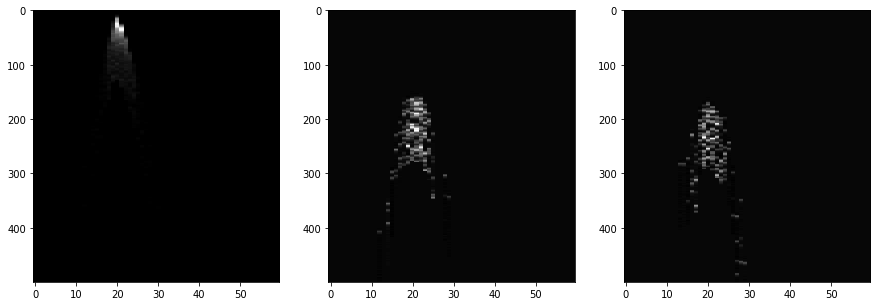

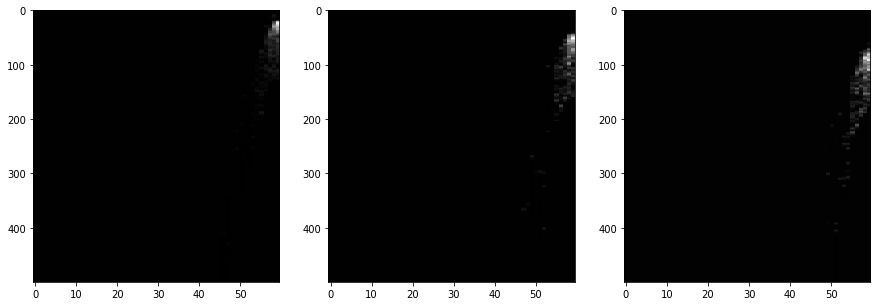

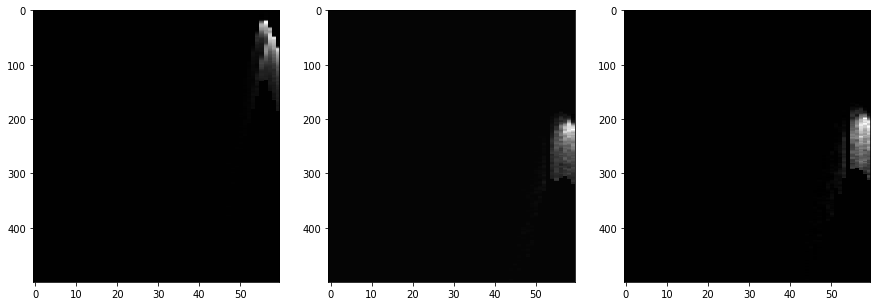

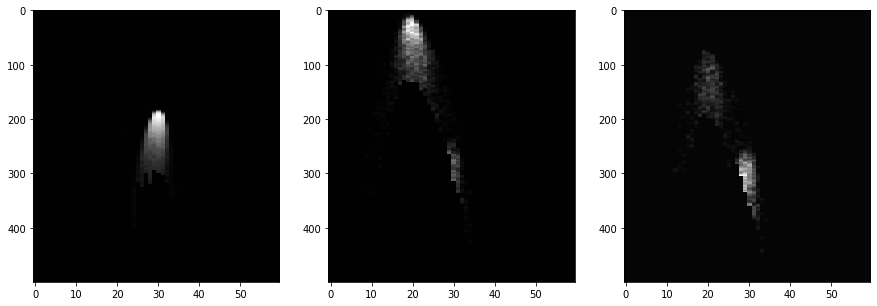

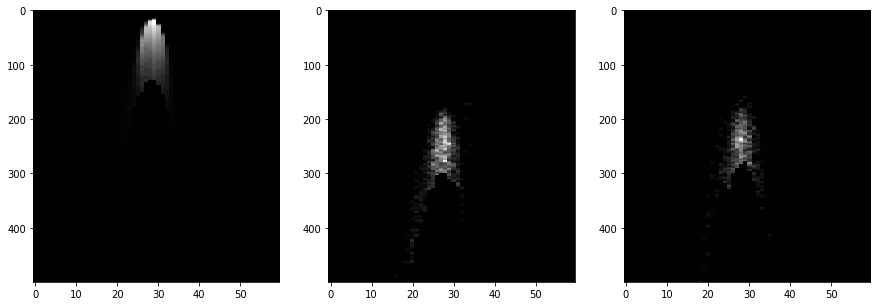

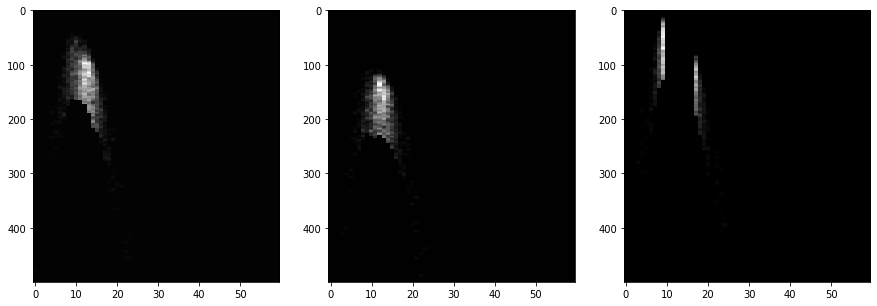

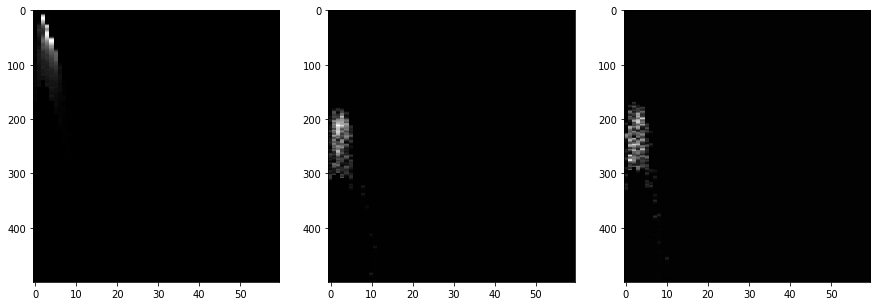

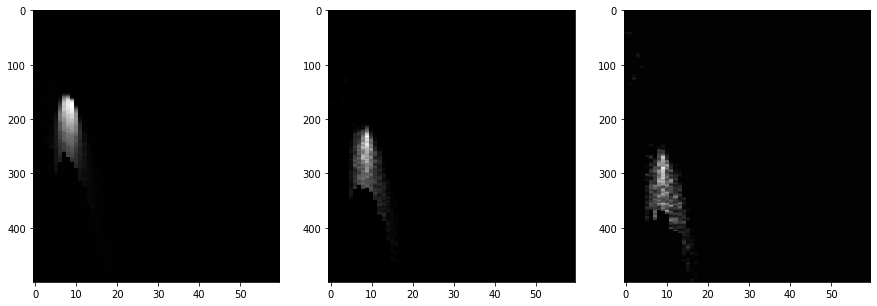

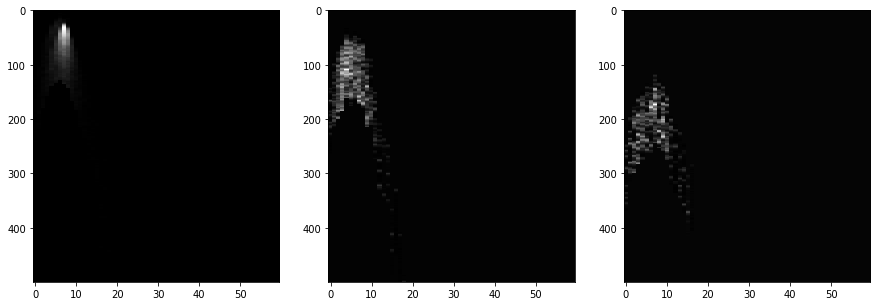

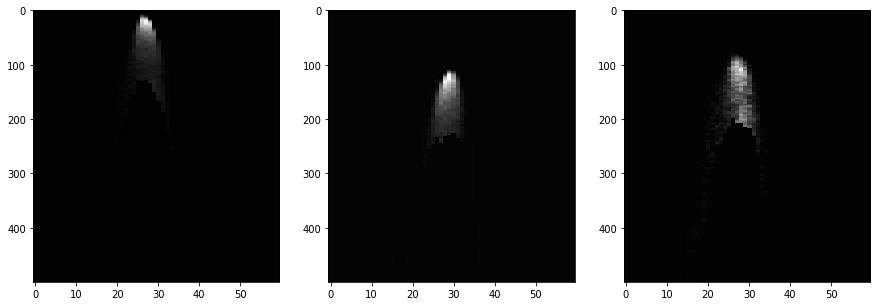

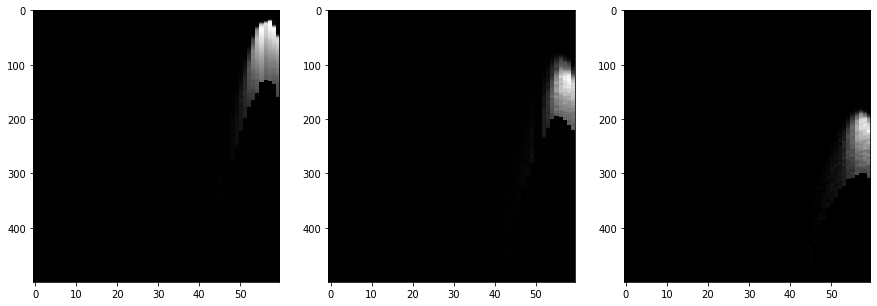

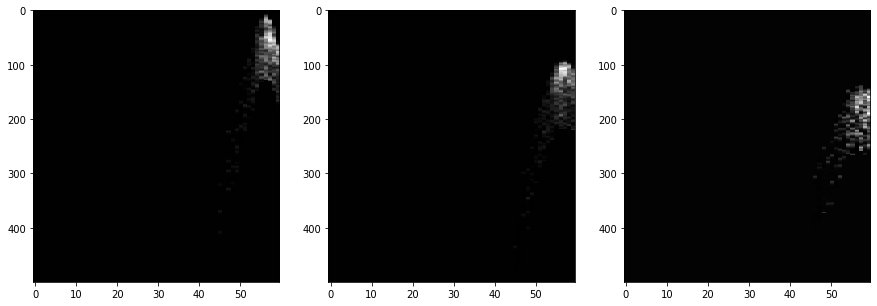

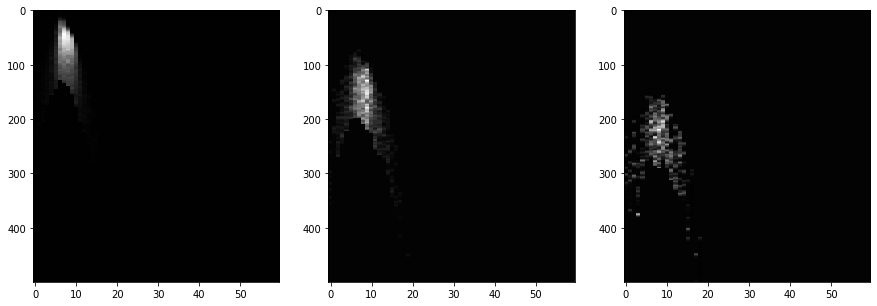

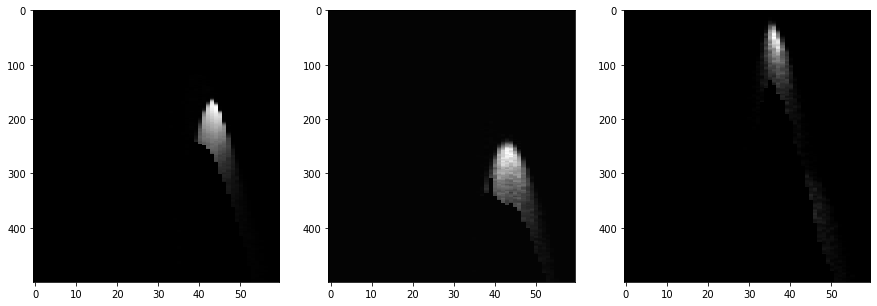

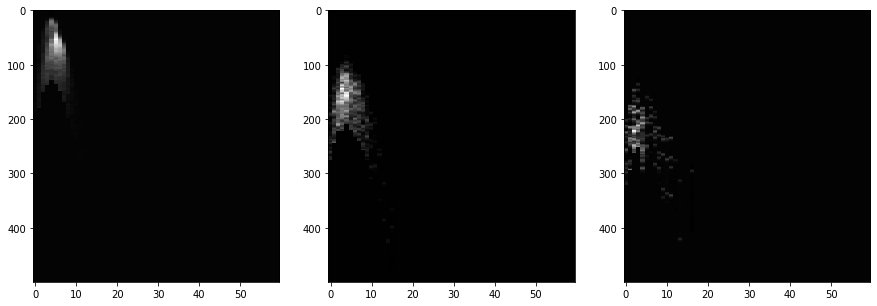

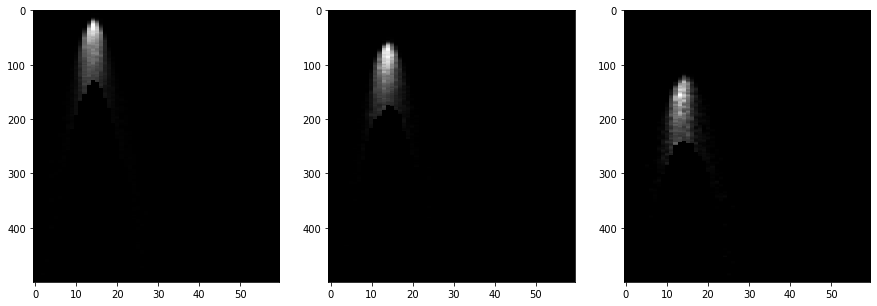

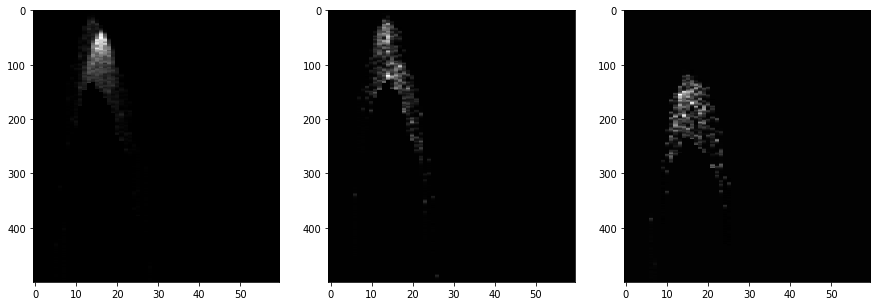

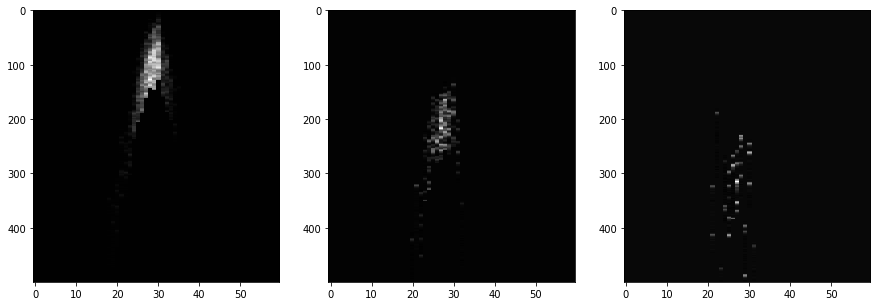

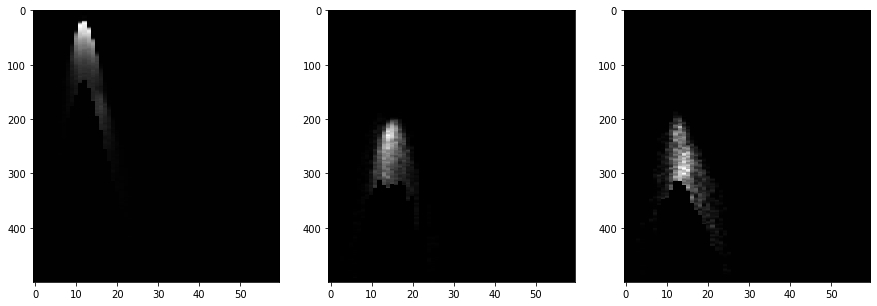

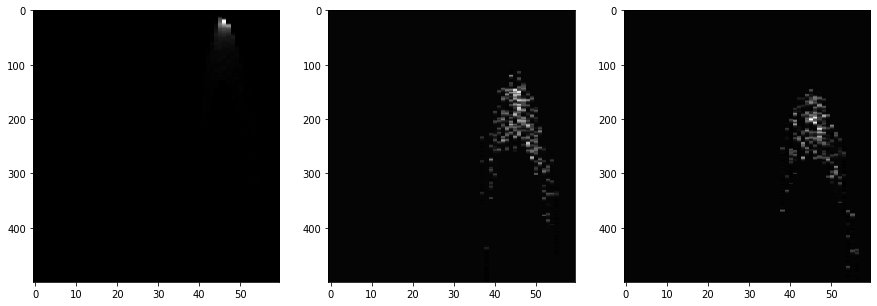

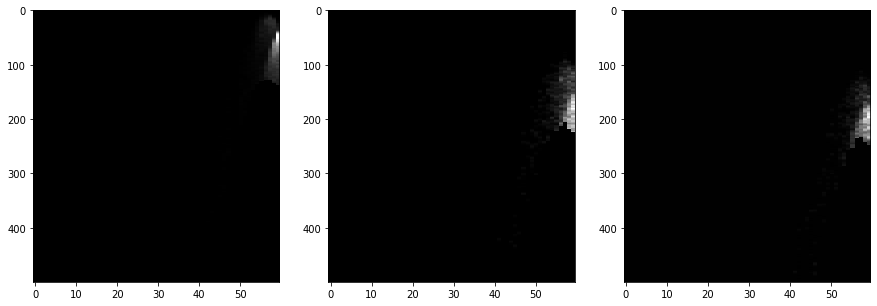

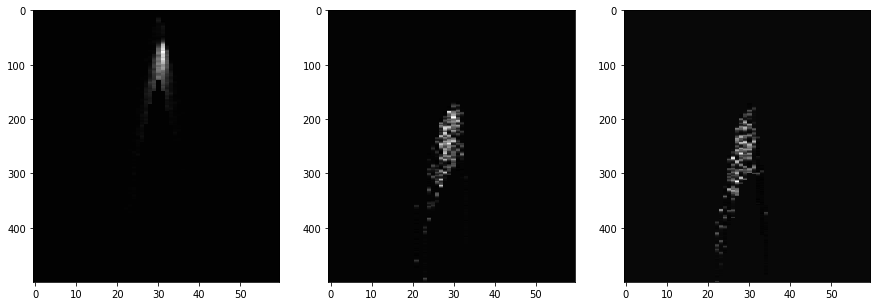

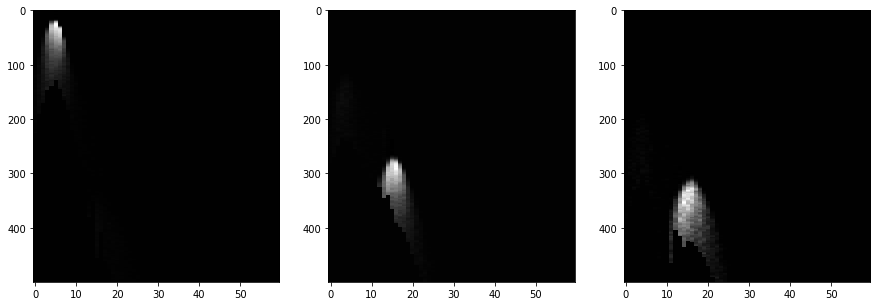

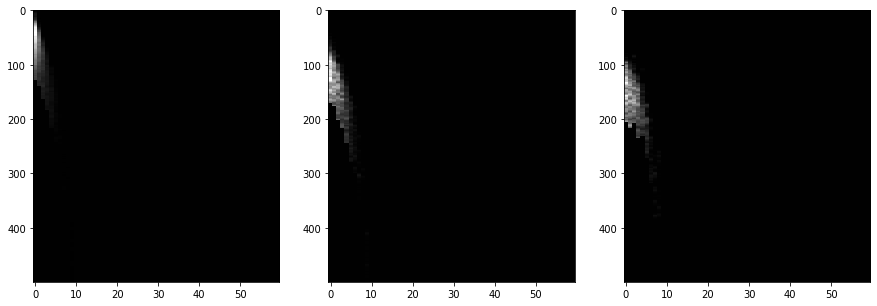

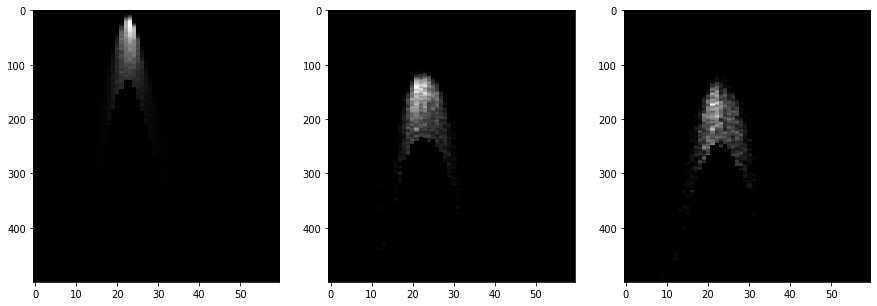

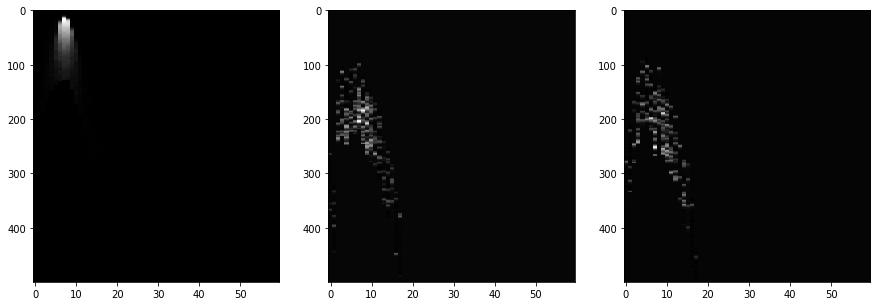

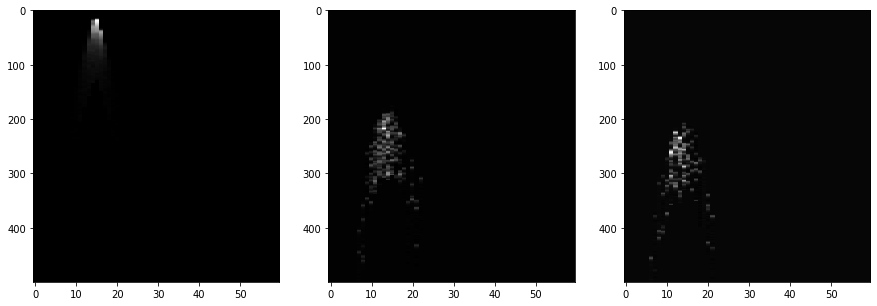

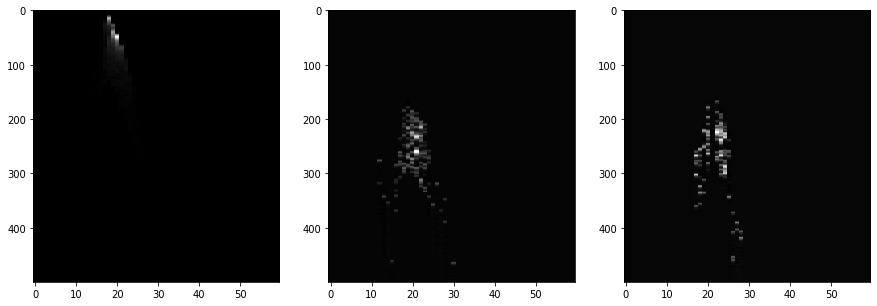

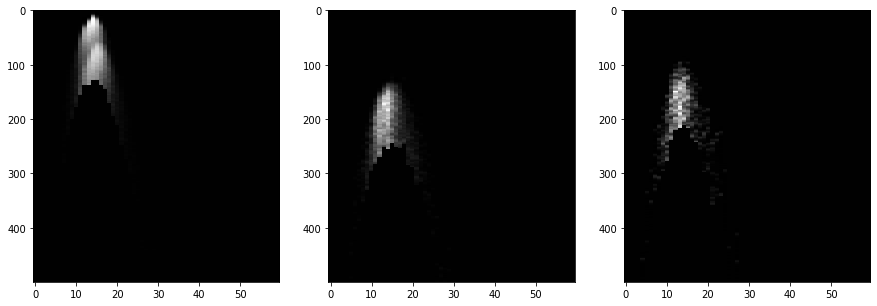

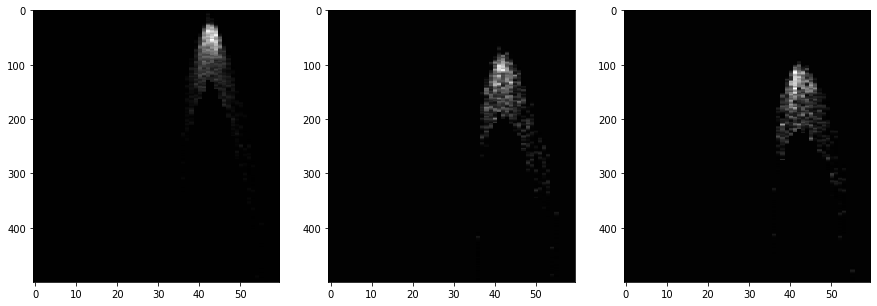

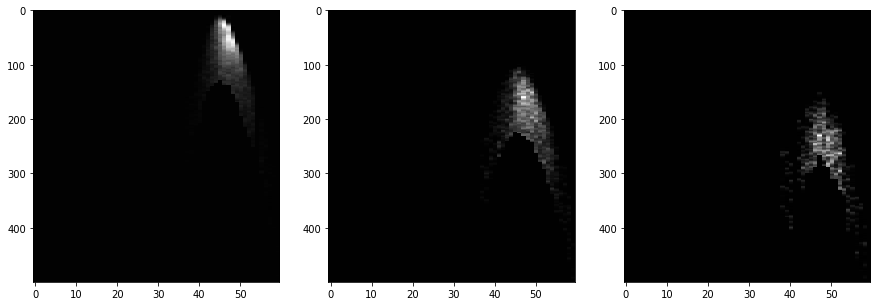

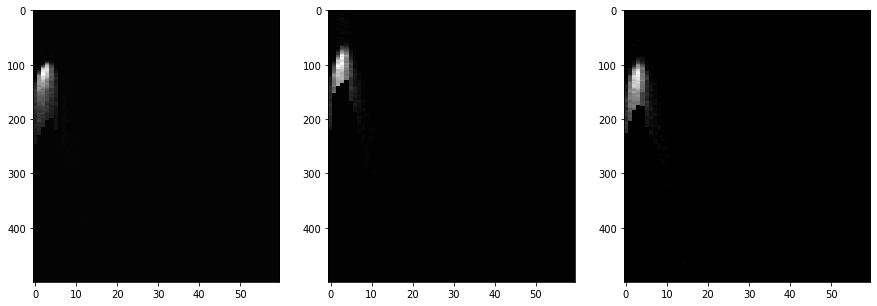

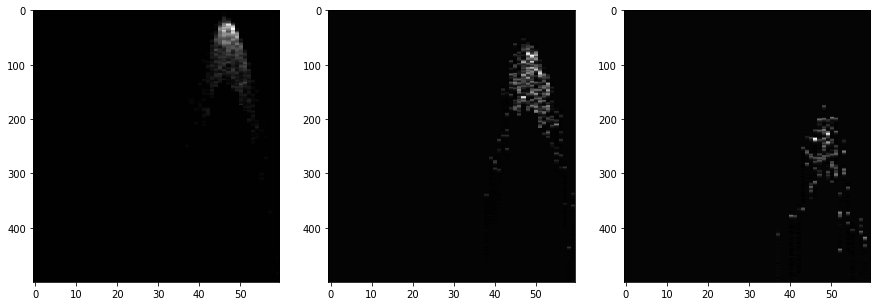

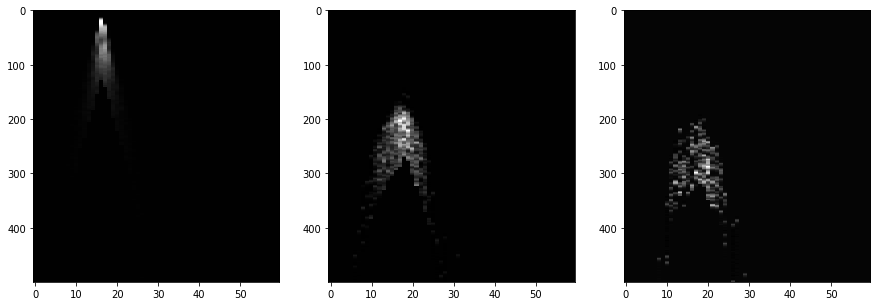

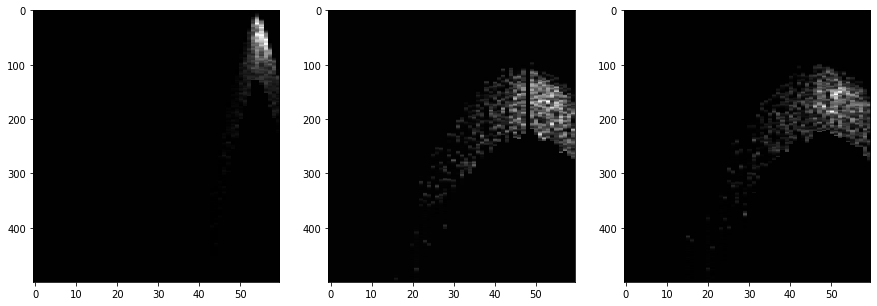

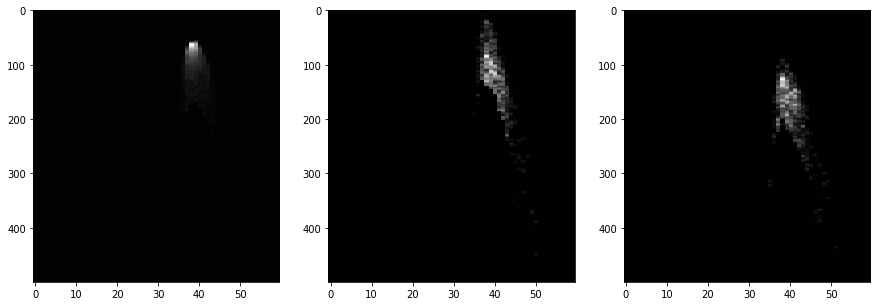

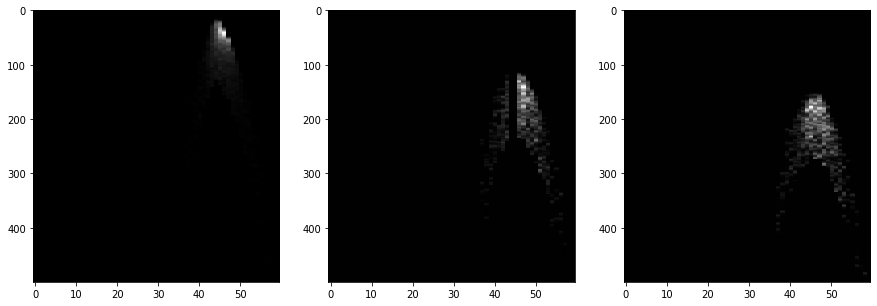

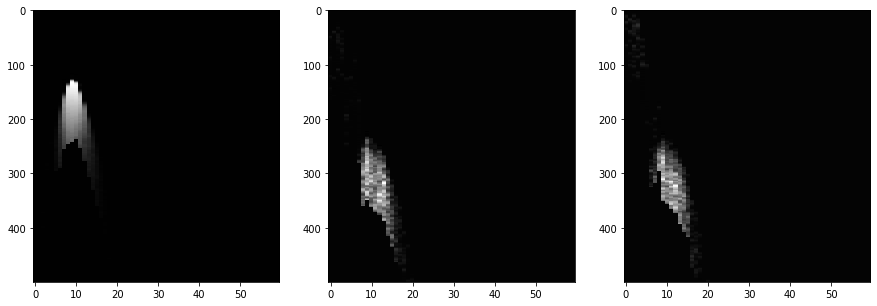

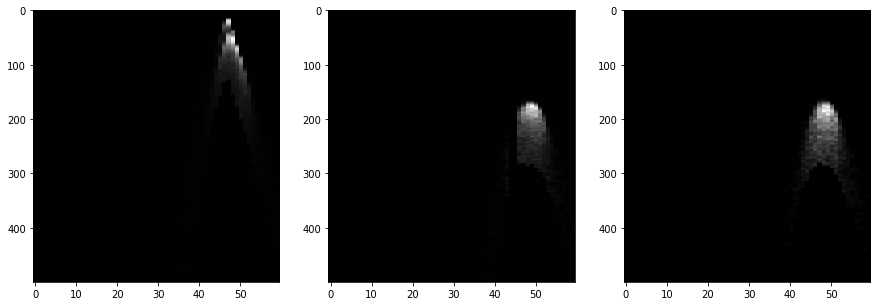

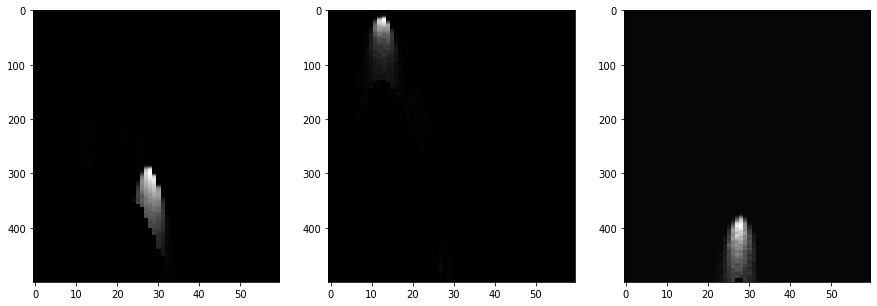

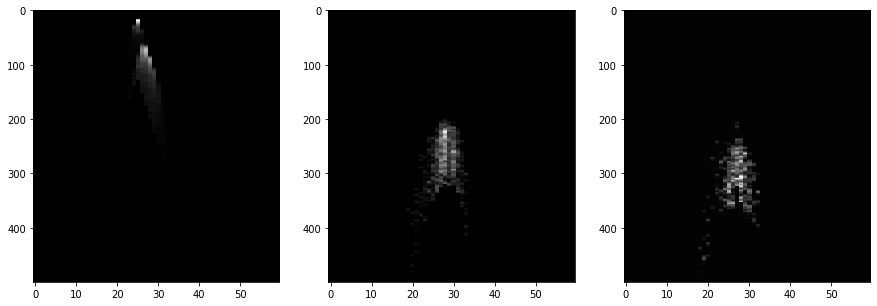

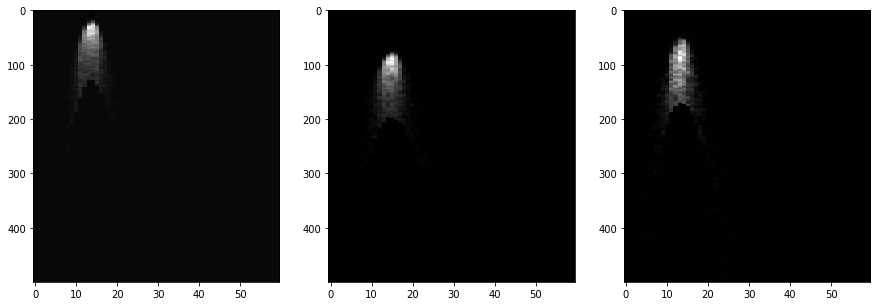

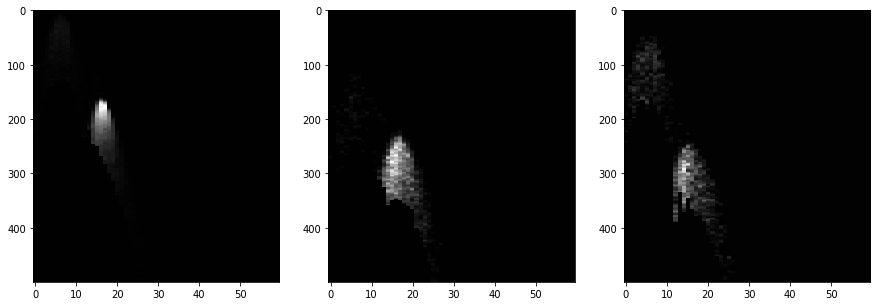

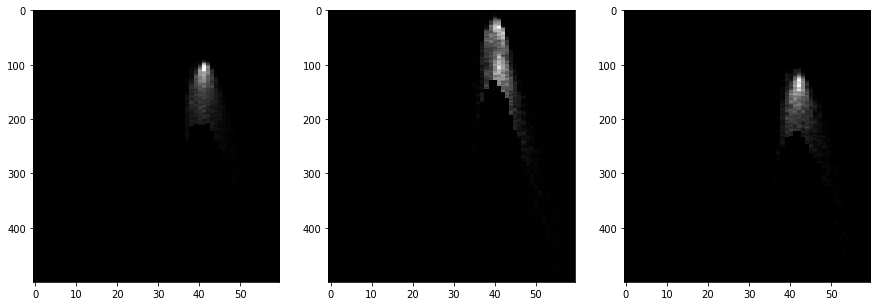

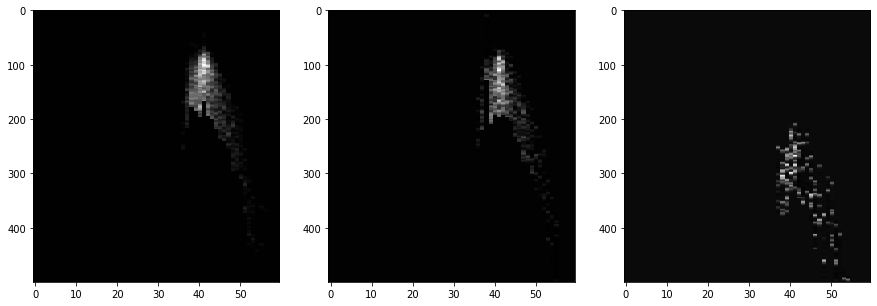

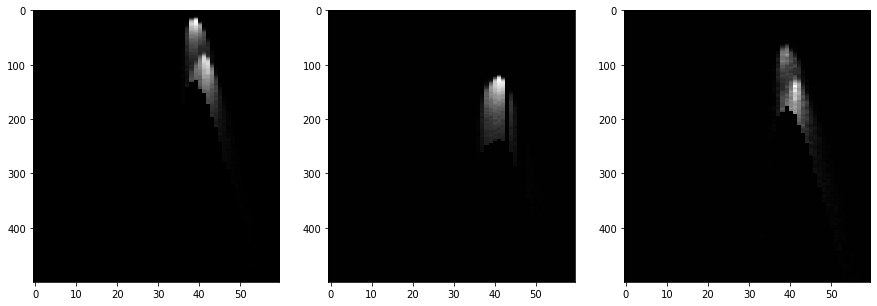

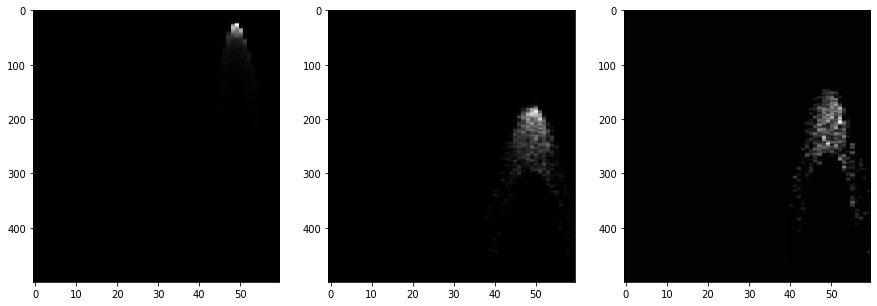

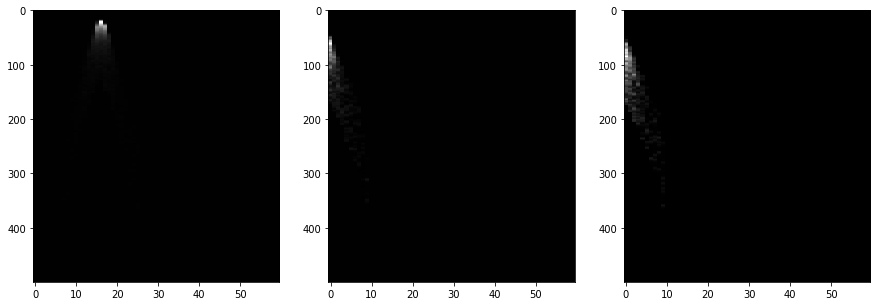

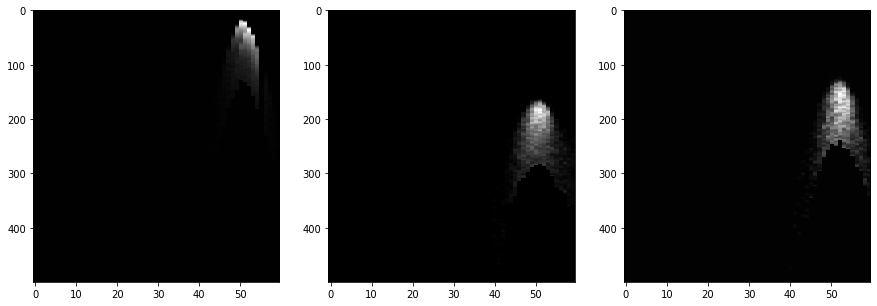

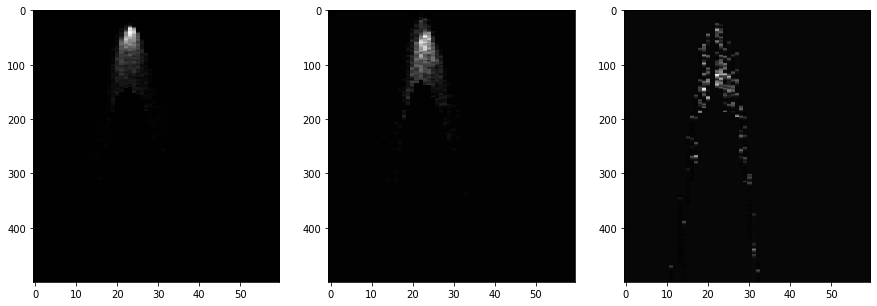

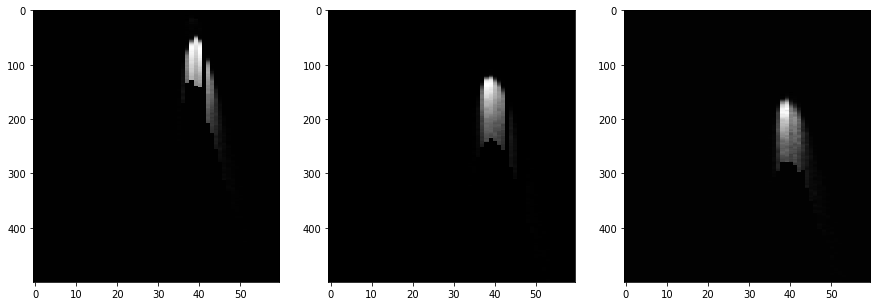

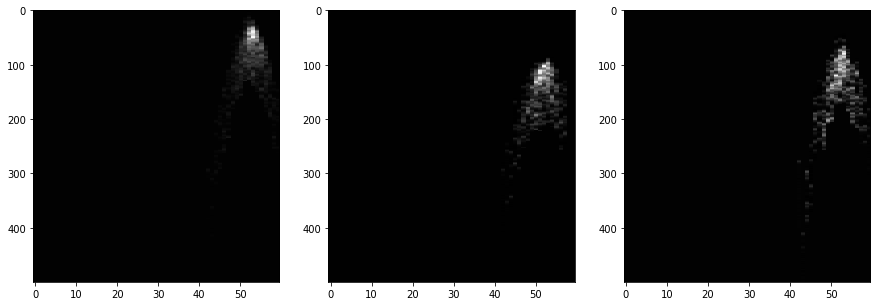

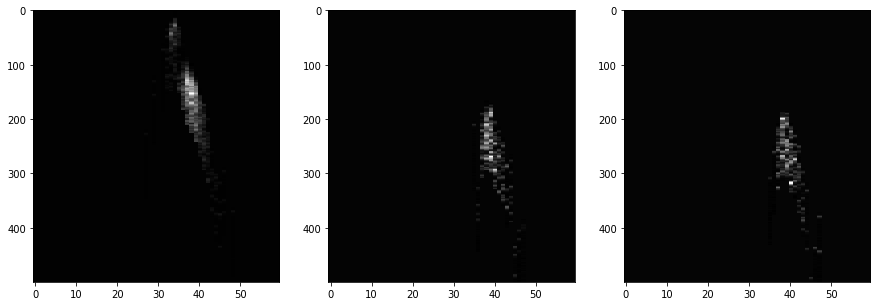

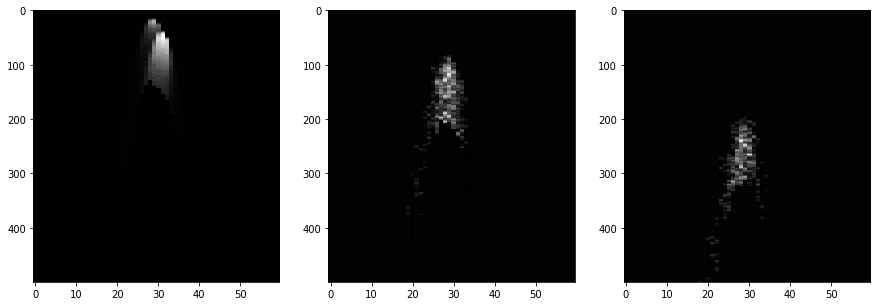

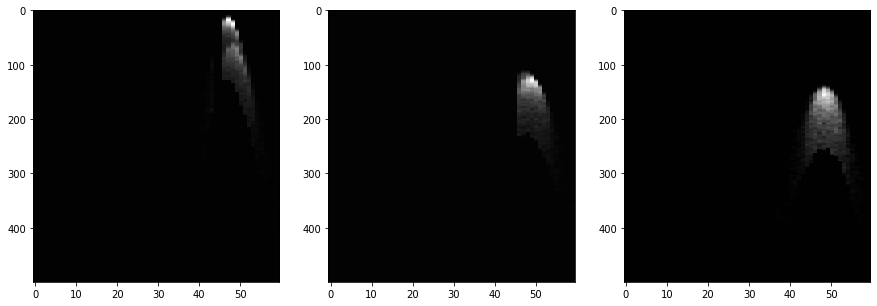

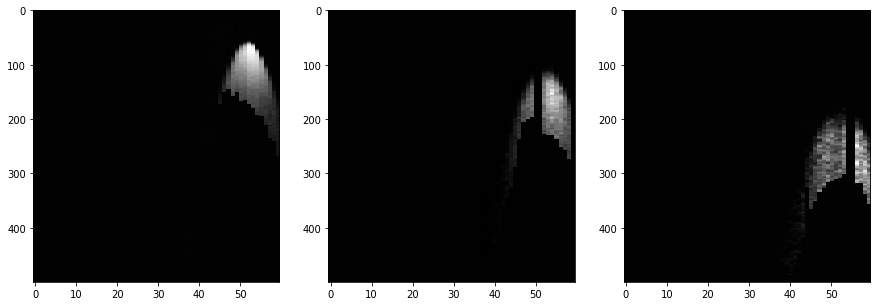

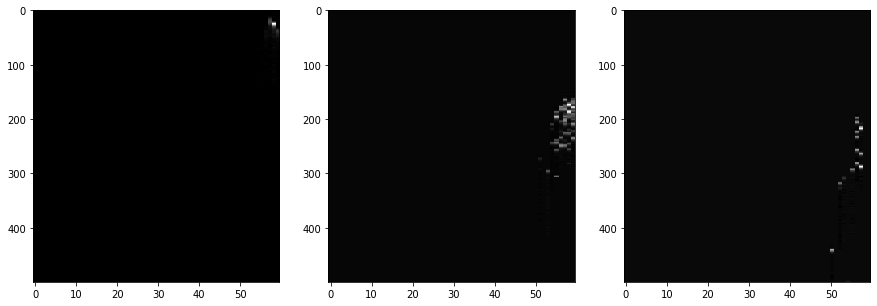

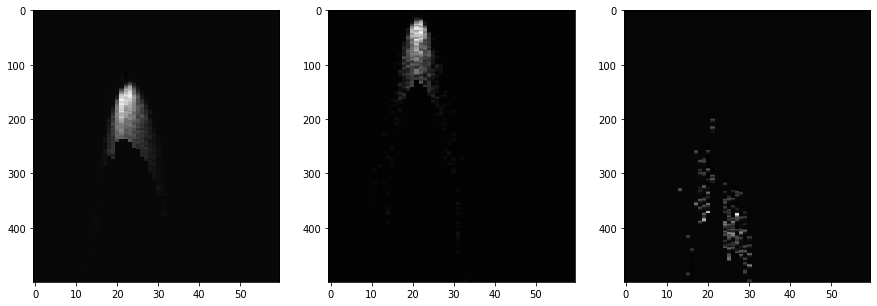

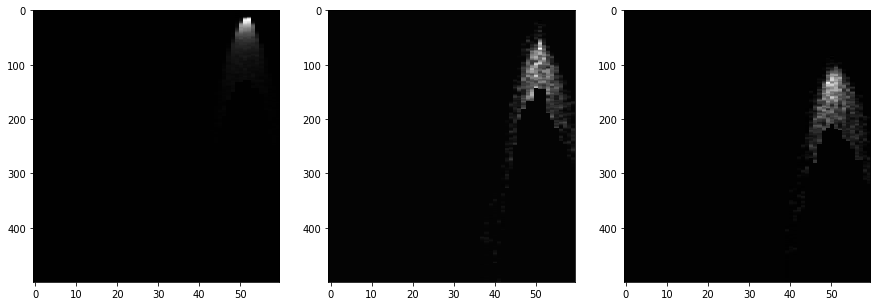

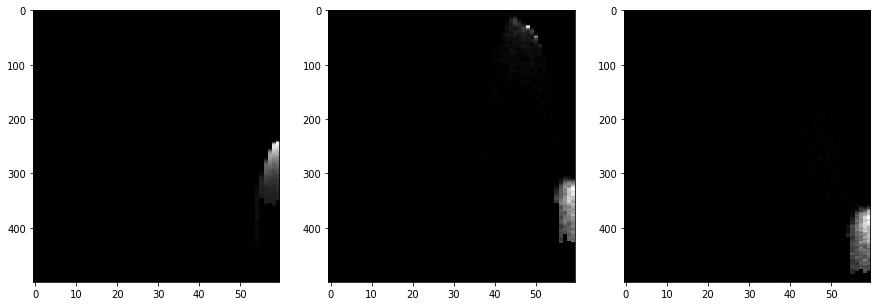

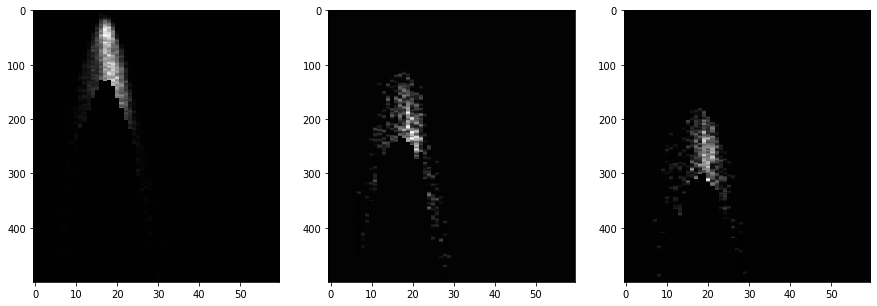

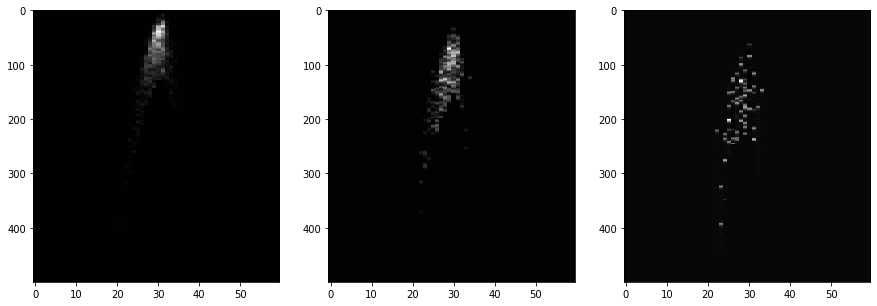

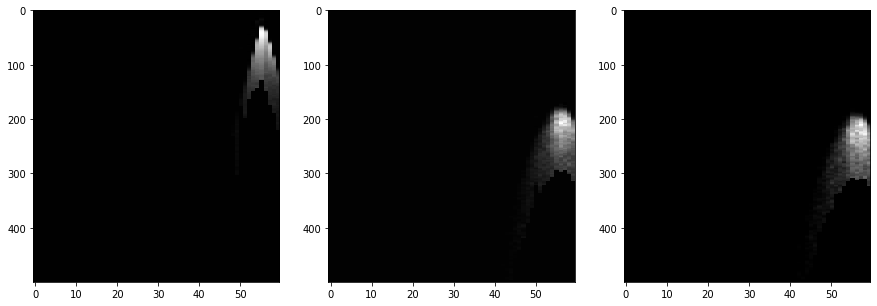

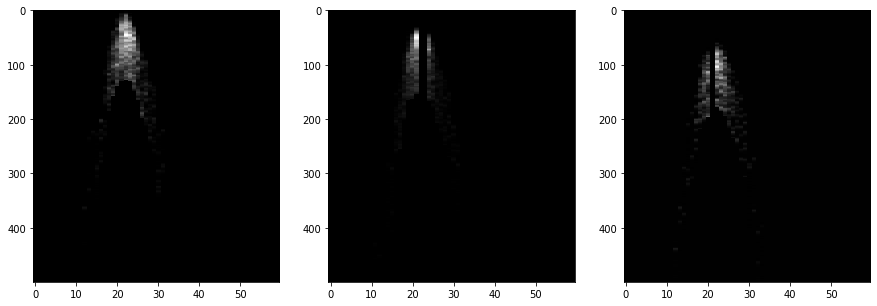

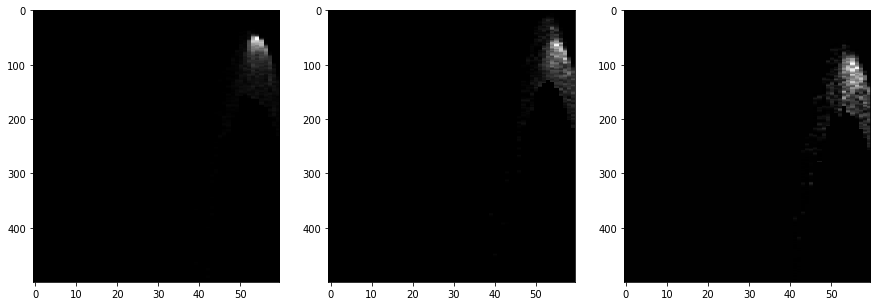

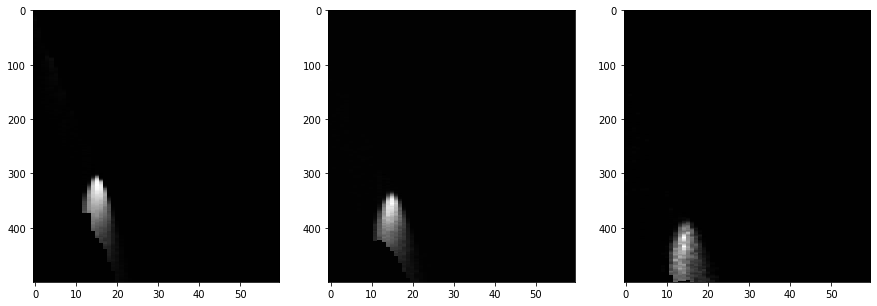

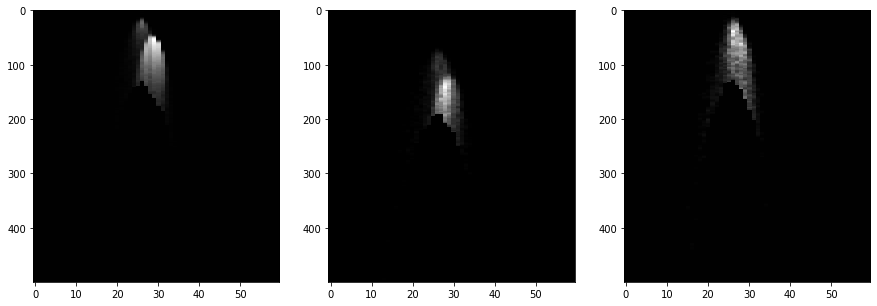

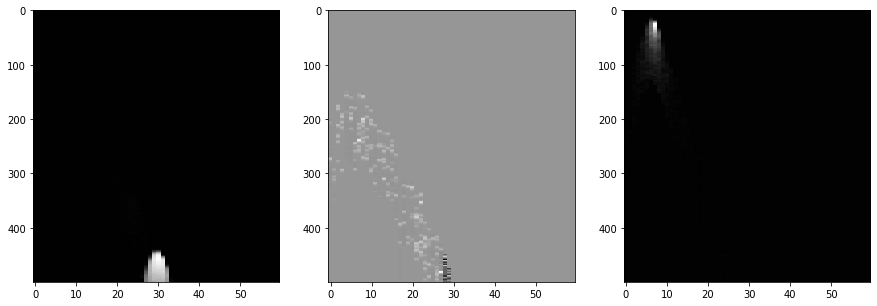

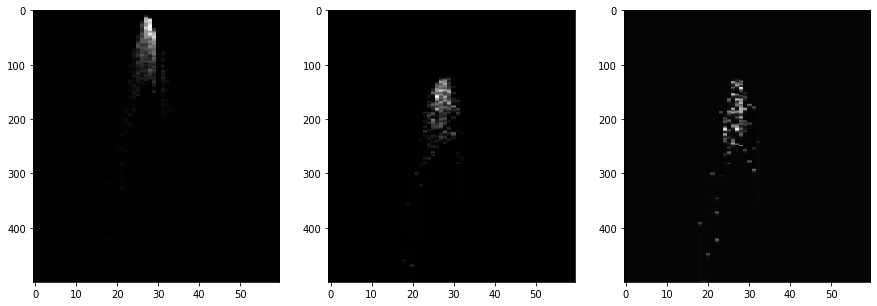

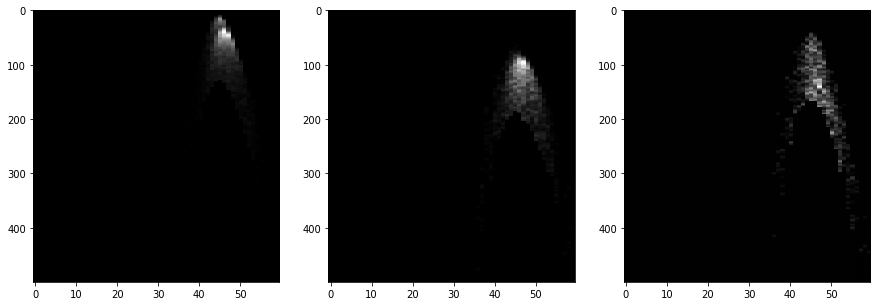

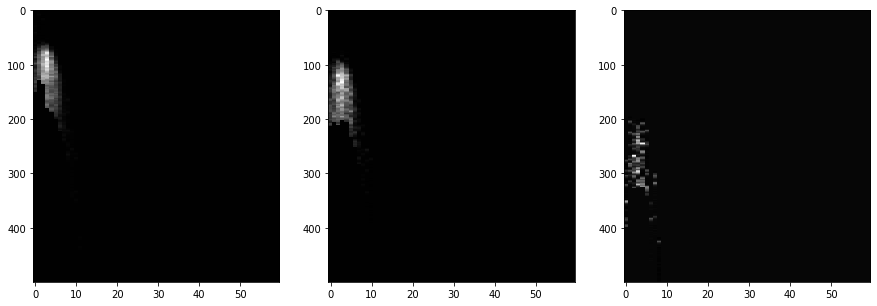

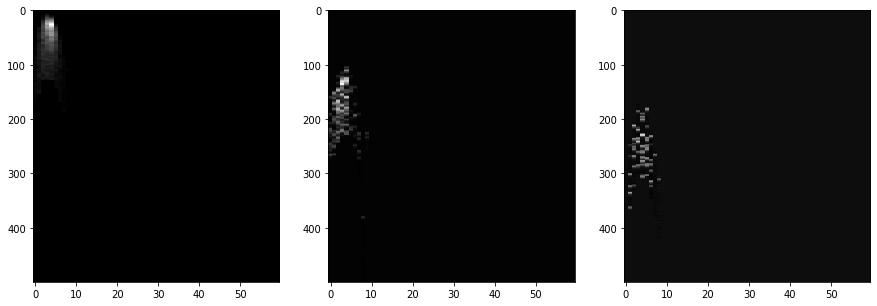

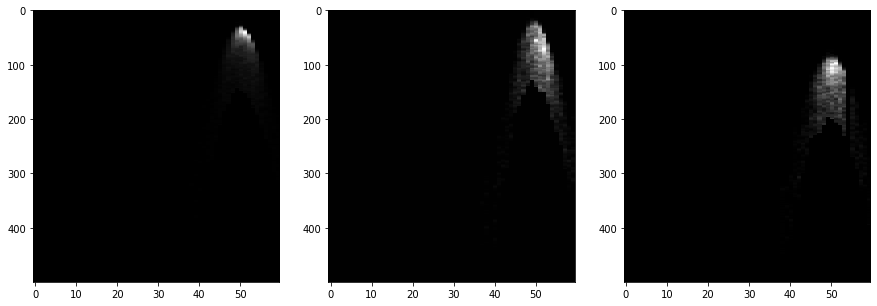

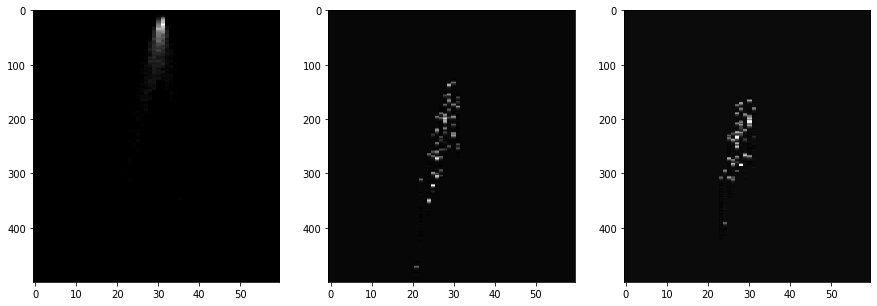

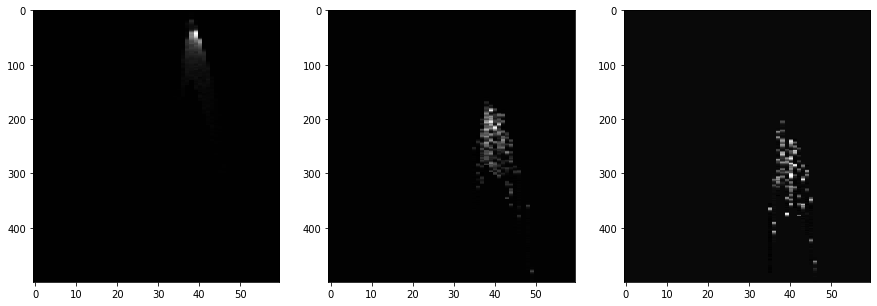

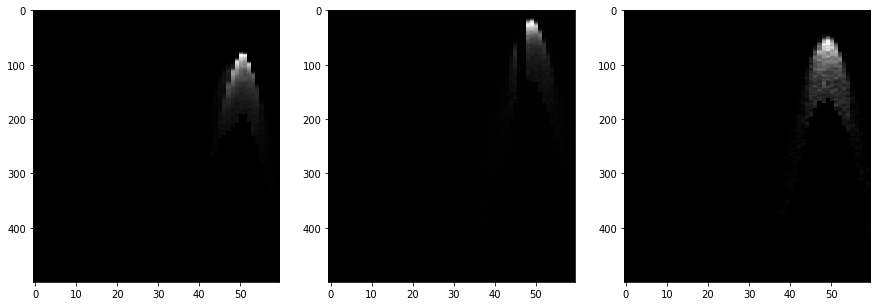

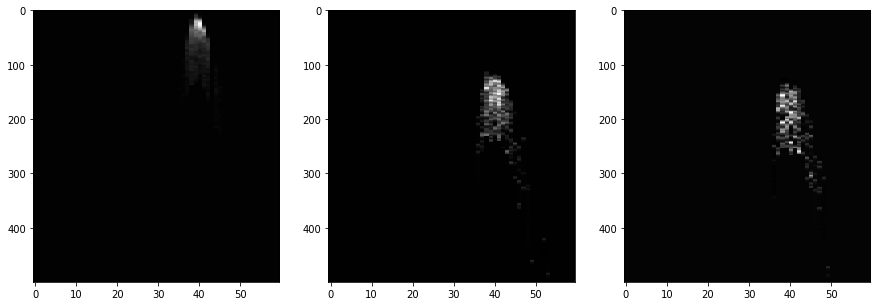

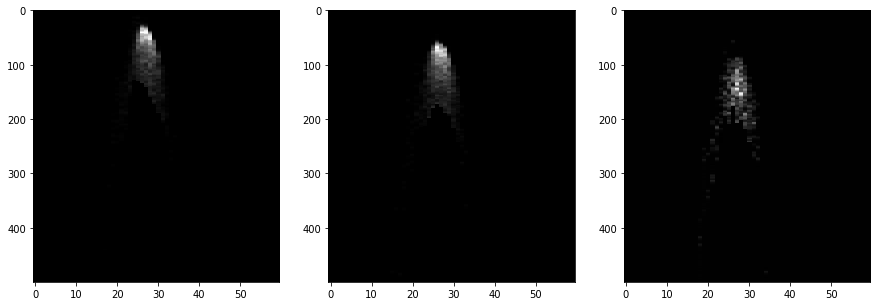

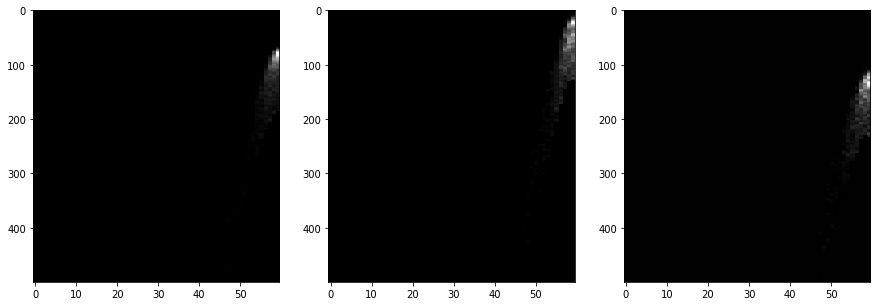

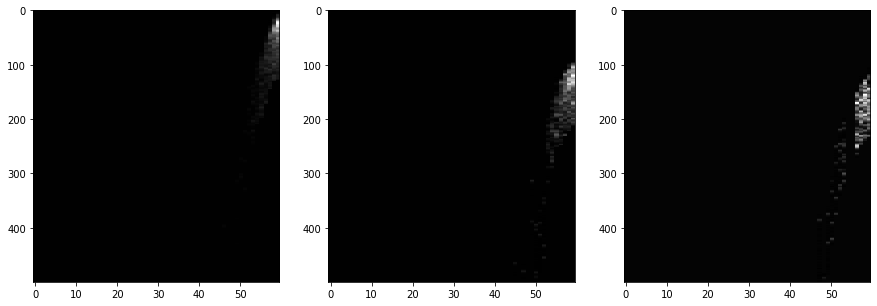

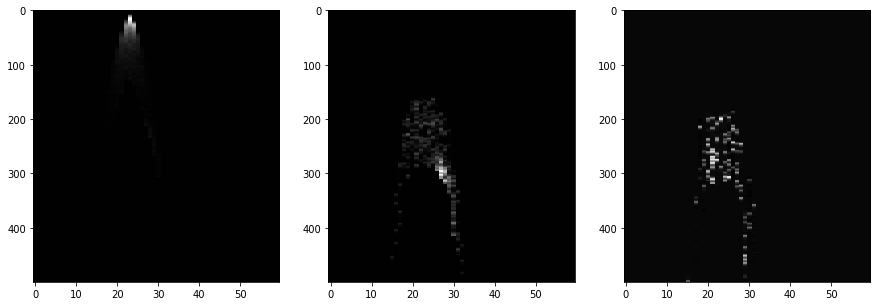

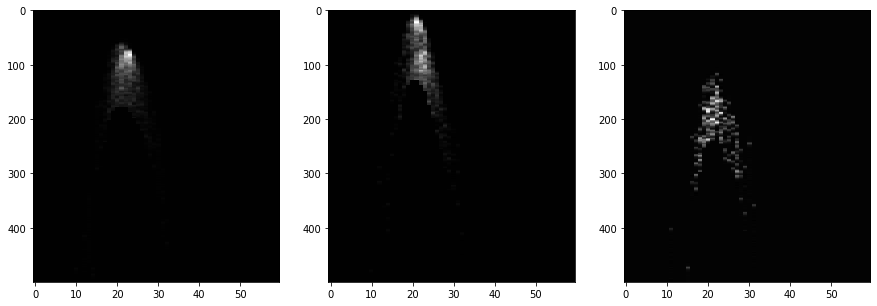

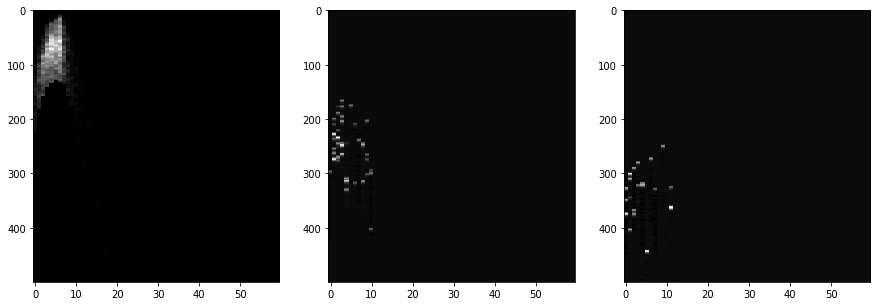

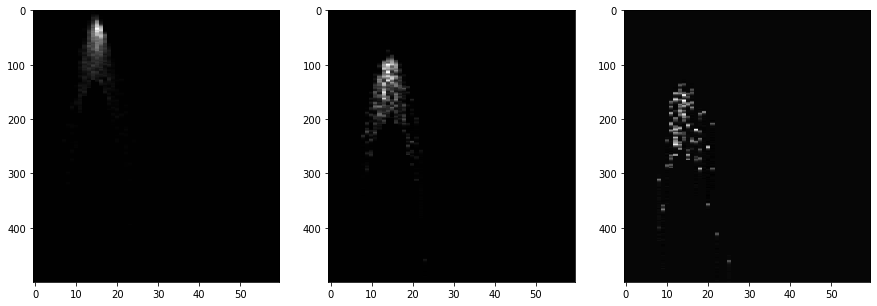

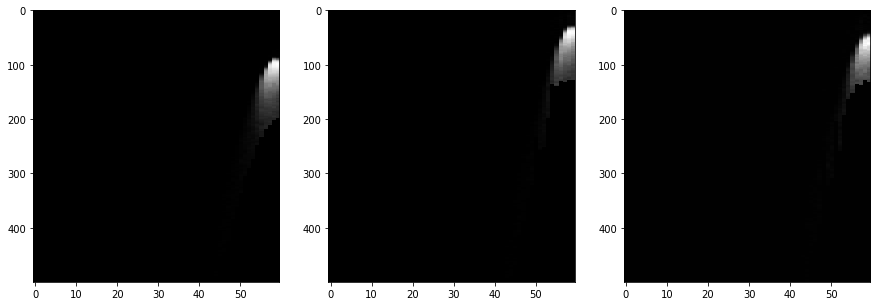

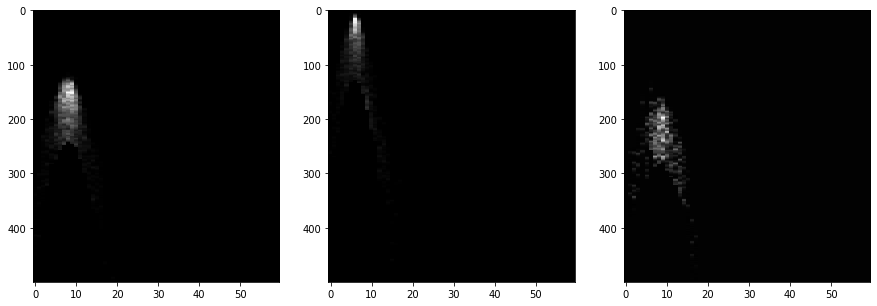

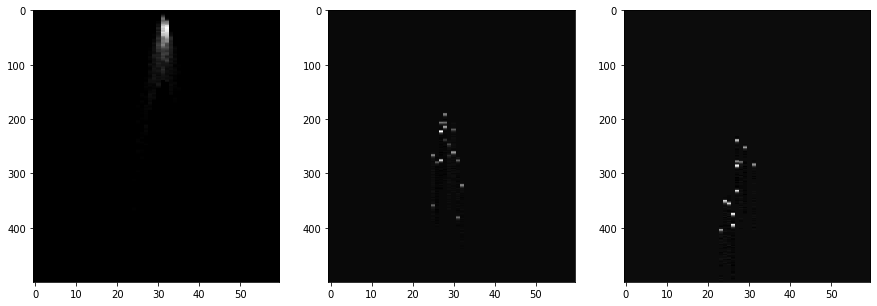

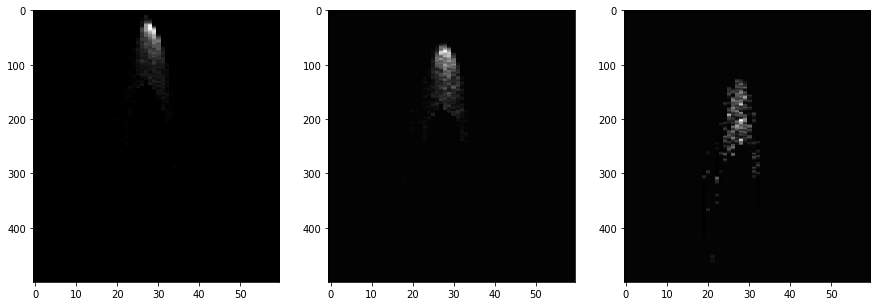

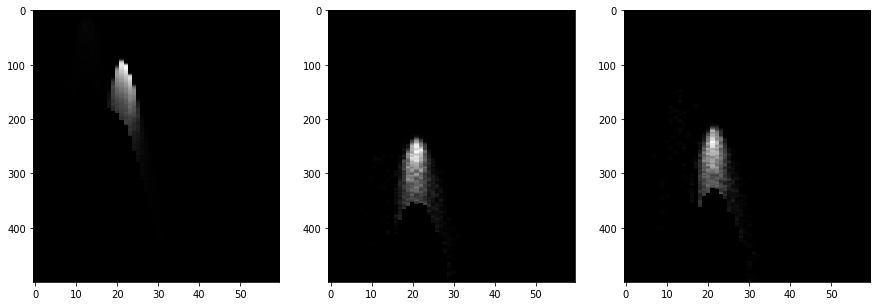

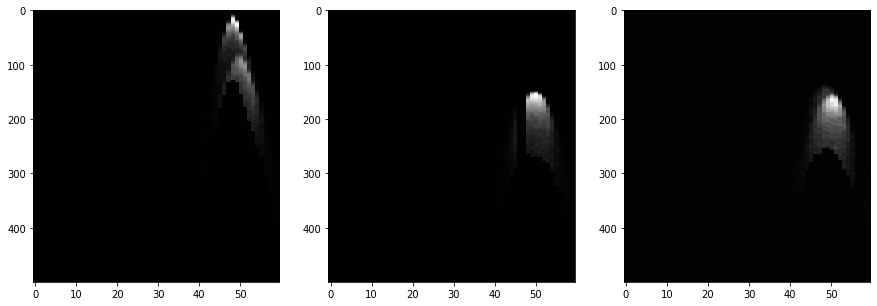

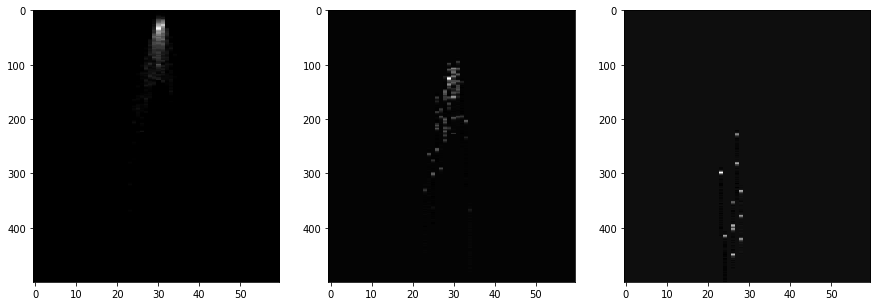

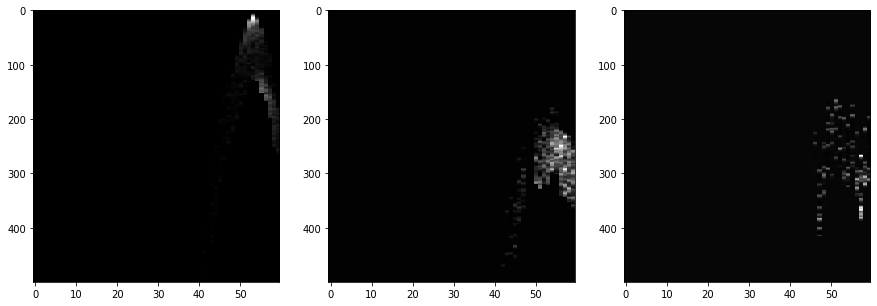

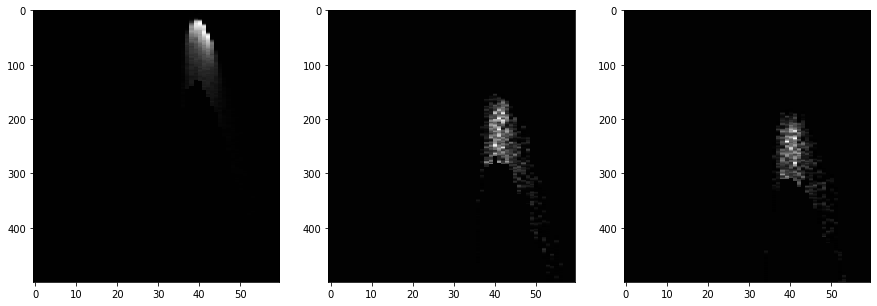

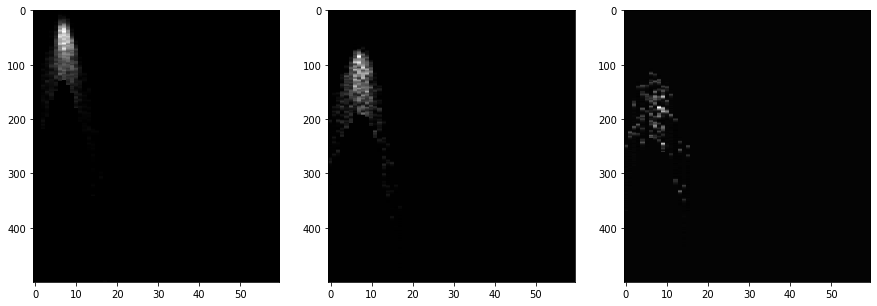

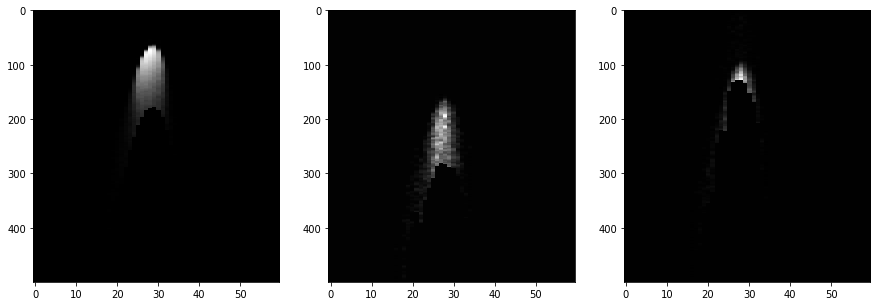

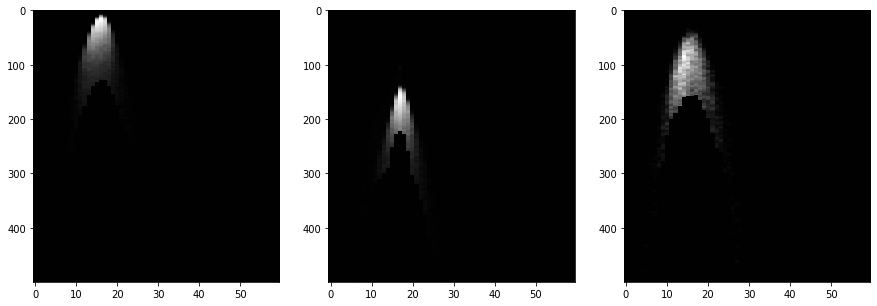

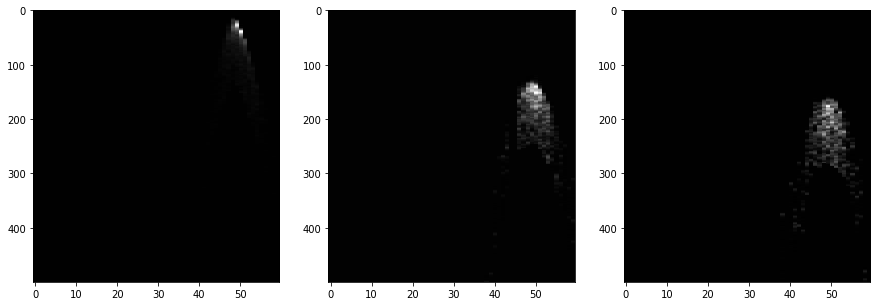

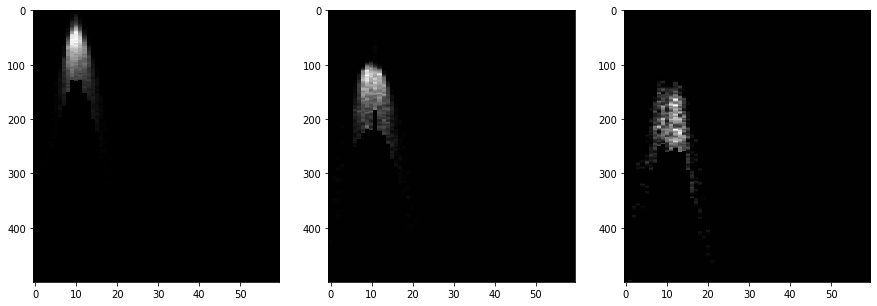

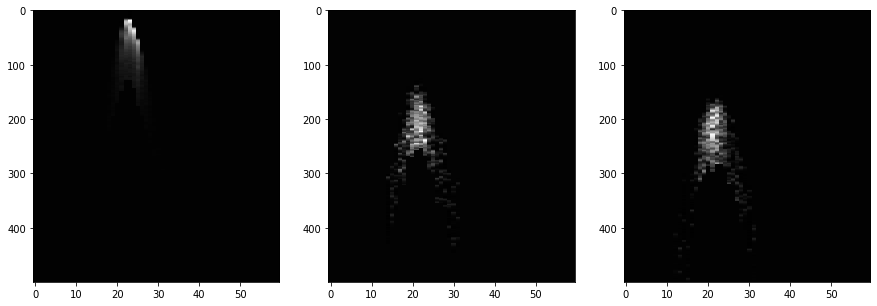

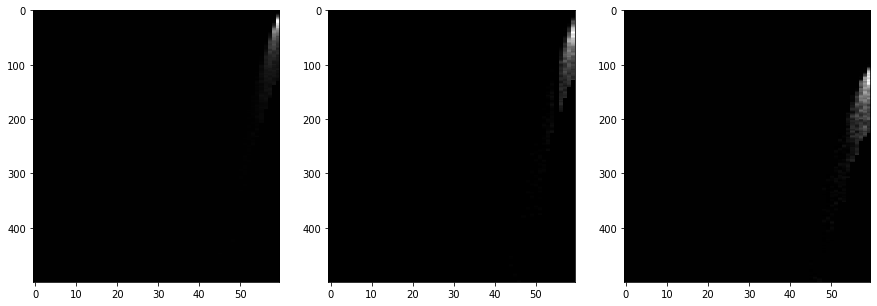

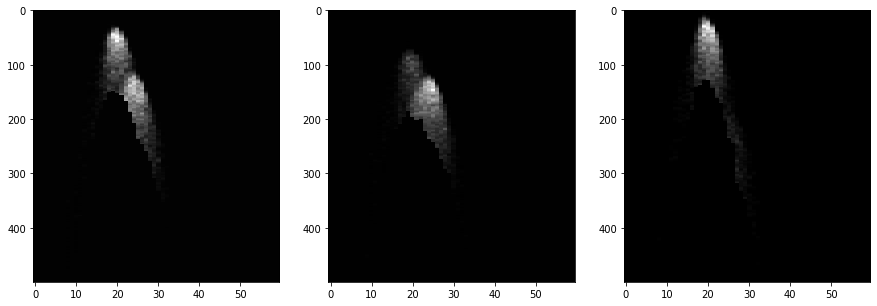

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*')[:1]:
    if pos >50:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    cut1=0.99
    cut2=0.8
    for n,e in enumerate(x):
        if pos >100:
            break
        ch = (pred_n1[n] >cut1) and (pred_n4[n] > cut2)
        #print(pos)
        if ch:
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)

NuMu_1_1_1?_
#.npz files =  10
/home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_1_18_data.npz (4727, 1)
[[(587.875, 82,    0.   ) (288.   , 46, 3324.27 ) (173.55 , 81, 4339.876)]] [1954.625] [[  23.01323 1478.3696  1947.8285 ]]
[[(7109.975, 69,     0.   ) (1614.875, 70, 15639.901)
  (1006.1  , 76, 15608.159)]] [10327.675] [[ -212.02106 -1251.7673   1947.8735 ]]
[[(1861.325, 53,     0.   ) ( 207.7  , 44, 15619.424)
  (  69.925, 54, 15619.244)]] [3387.375] [[-2438.594   5463.294   1945.1923]]
[[(601.575, 40,     0.   ) (379.325, 50, 14275.189)
  ( 41.25 , 49, 10372.323)]] [1133.15] [[-712.8557  -809.30316 1947.9088 ]]
[[(640.175, 73,     0.   ) (275.375, 66, 15566.991)
  ( 30.975, 72, 15644.726)]] [1089.5] [[ 593.008       5.946361 1947.9724  ]]
[[(1603.35 , 38,     0.   ) ( 109.675, 29, 15670.261)
  ( 102.725, 48, 16262.637)]] [4338.2] [[ 2148.0364 -4723.104   1945.8882]]
[[(1352.675, 16,     0.   ) ( 406.825, 25, 15624.736)
  ( 123.6  ,  8, 15637.061)]] [2526.425] [[ -327.

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_1_11_data.npz (4560, 1)
[[(524.675, 3,     0.   ) (523.625, 2, 15682.755) (144.725, 4, 15647.253)]] [1742.35] [[ 2890.0432 -1211.5765  1947.2297]]
[[(1663.35, 69,     0.   ) ( 194.25, 70, 15639.901)
  ( 174.7 , 62, 15602.474)]] [2199.75] [[-2039.982   -953.2352  1947.6023]]
[[(4876.75 , 73,     0.   ) ( 815.775, 74, 13948.177)
  ( 259.   , 66, 15566.991)]] [7288.1] [[-22715.996      489.48557   1907.5037 ]]
[[(884.3  , 55,     0.   ) (661.425, 63, 15724.399)
  (510.65 , 64, 14742.8  )]] [2587.325] [[ 226.98456  623.67395 1947.9655 ]]
[[(654.475, 20,     0.   ) (153.975, 19, 13544.796)
  ( 89.05 , 12, 15607.295)]] [1394.325] [[11292.394   6137.6284  1935.0422]]
[[(1461.425,  6,     0.    ) ( 131.65 ,  5, 15566.9375)
  ( 101.125, 13, 15570.326 )]] [1915.875] [[-3029.5962   -466.11902  1947.263  ]]
[[(647.325, 81,    0.    ) (256.3  , 45, 6285.4956)
  (215.925, 86, 3591.3179)]] [2029.375] [[-285.1181  278.5534 1947.9875]]
[[(91

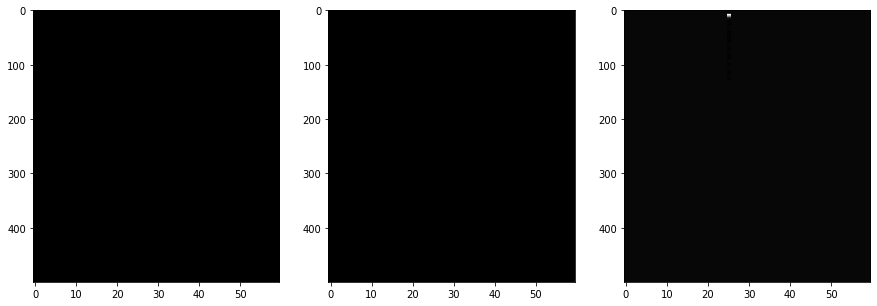

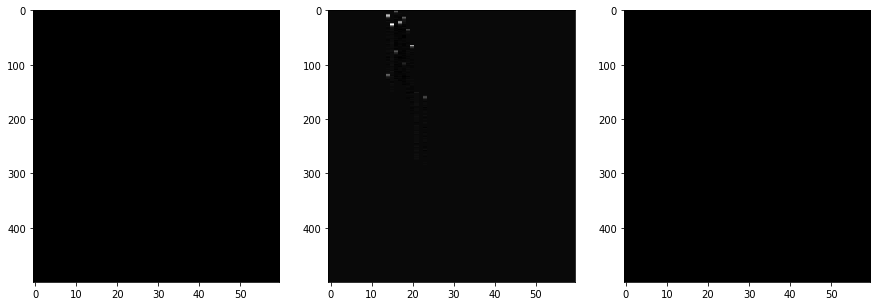

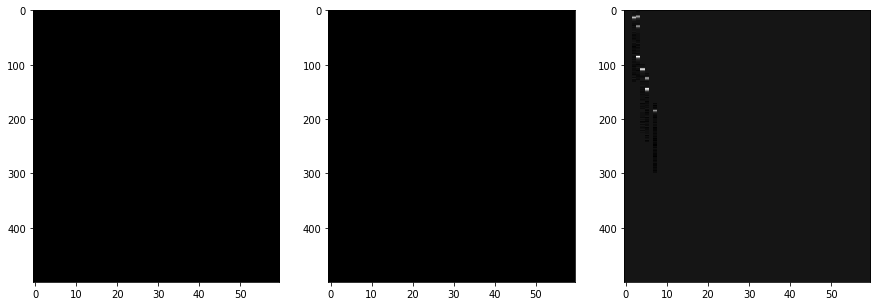

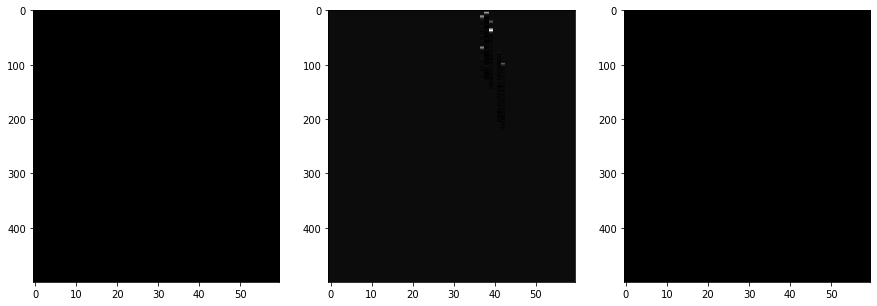

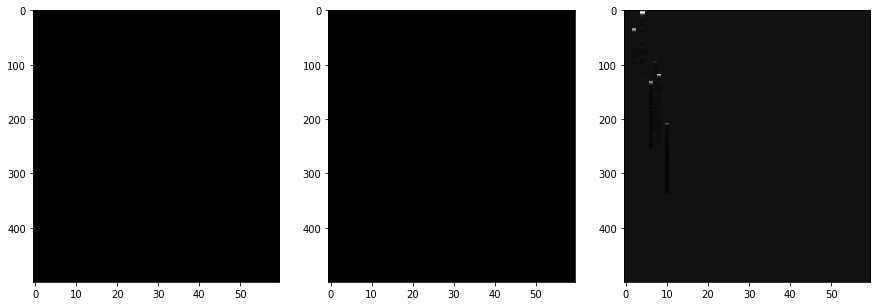

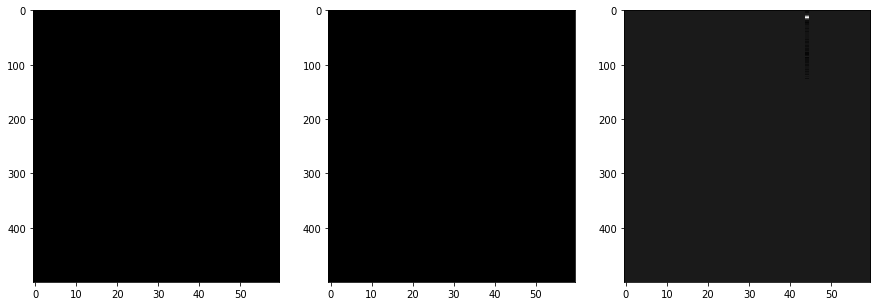

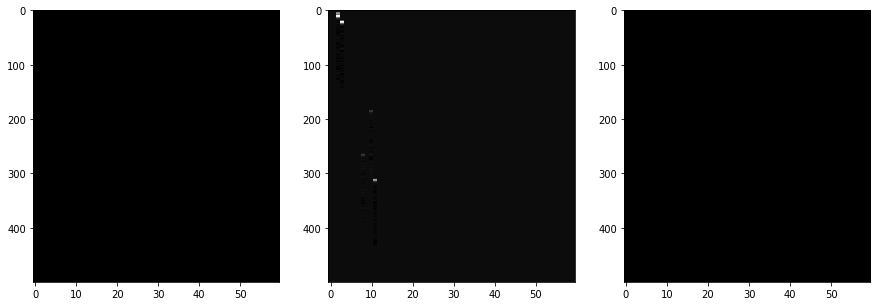

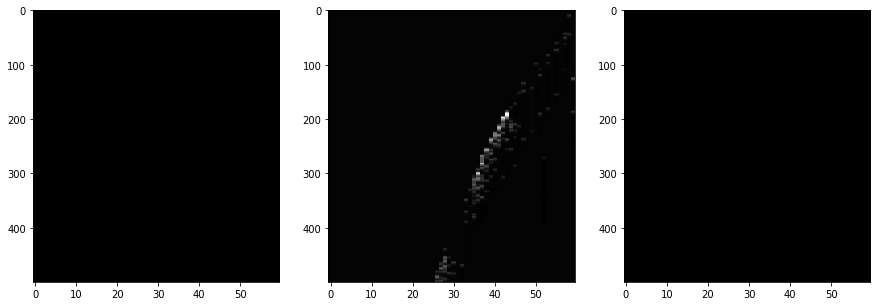

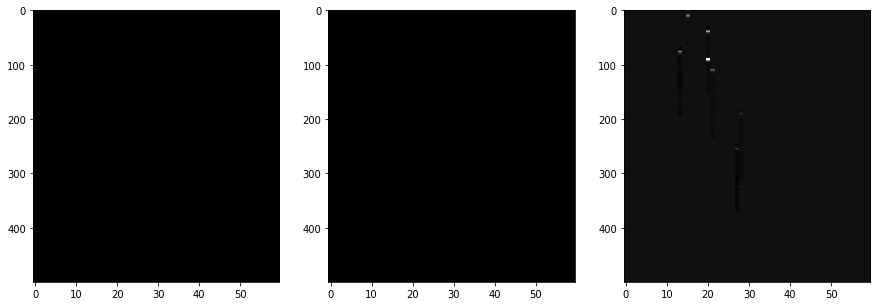

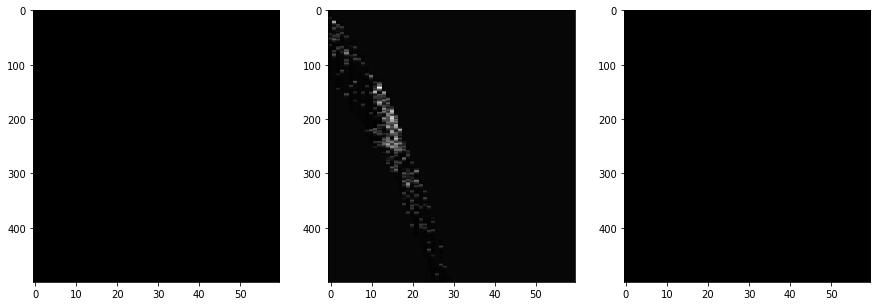

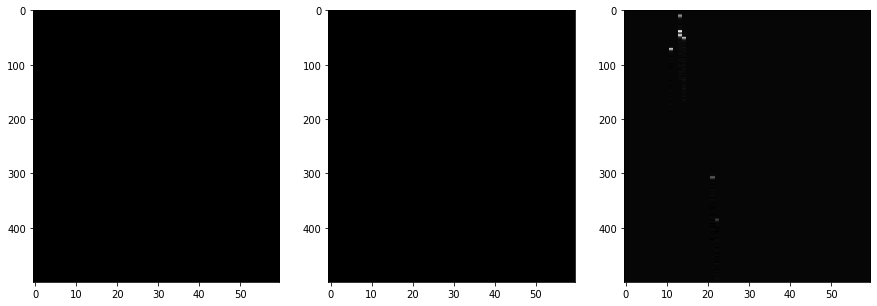

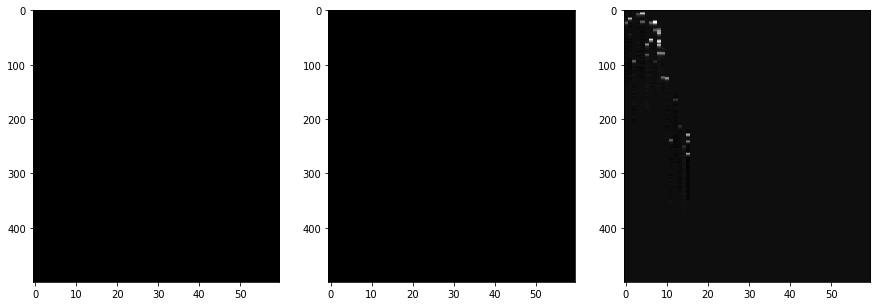

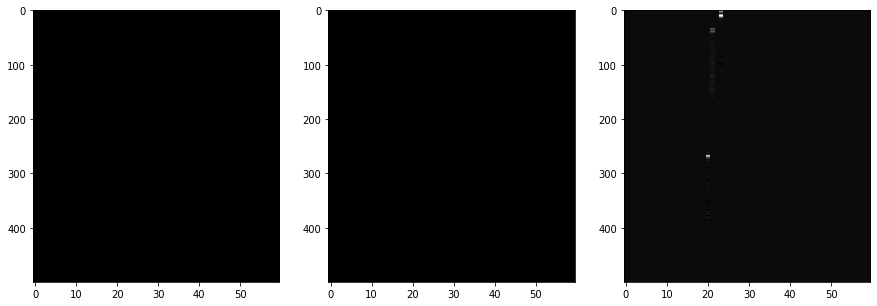

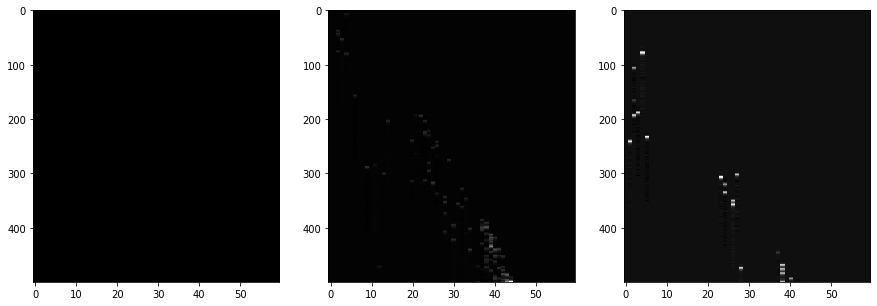

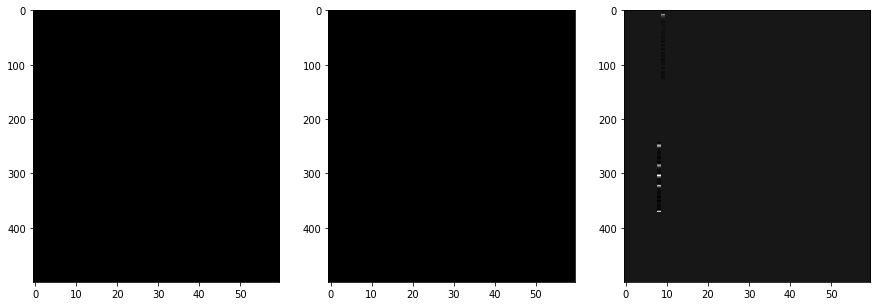

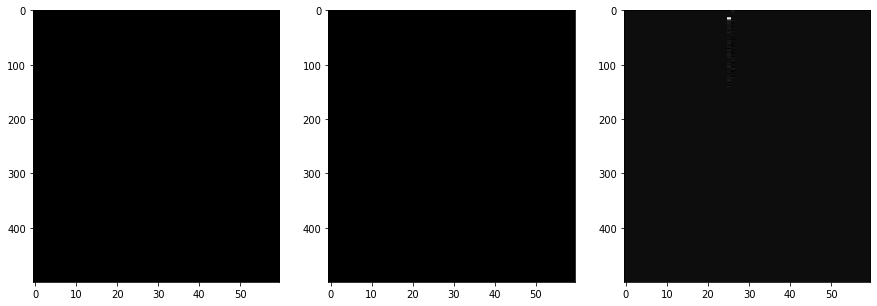

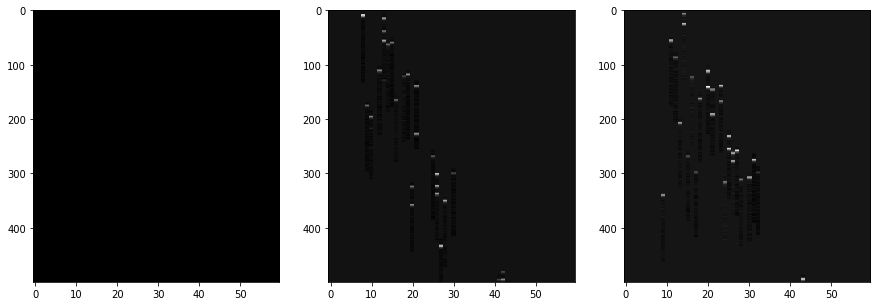

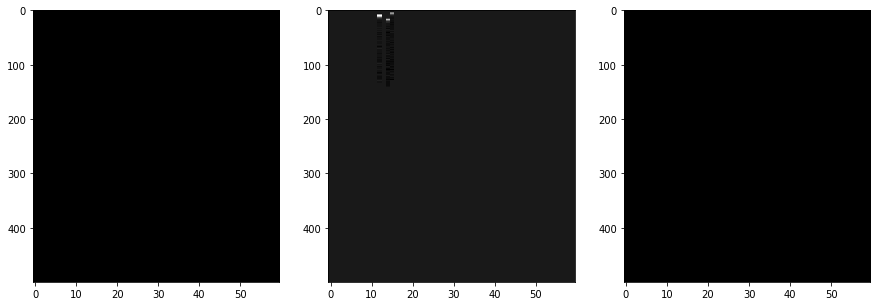

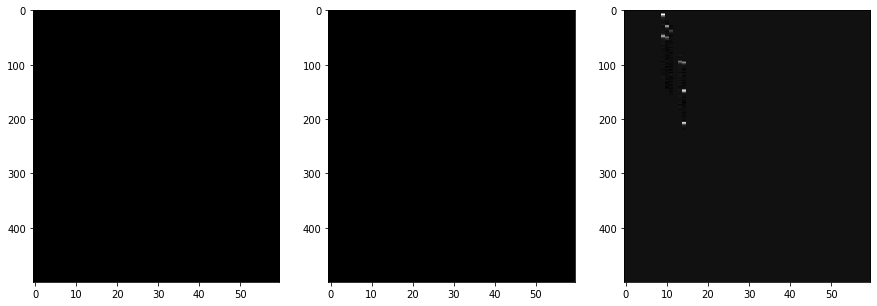

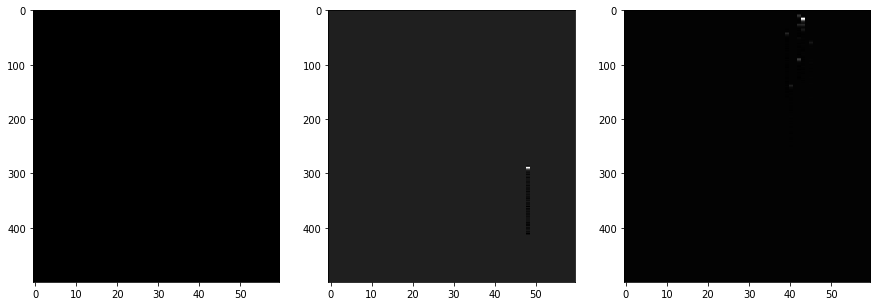

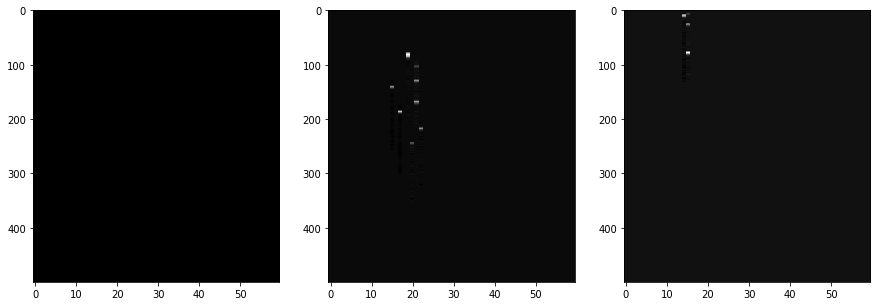

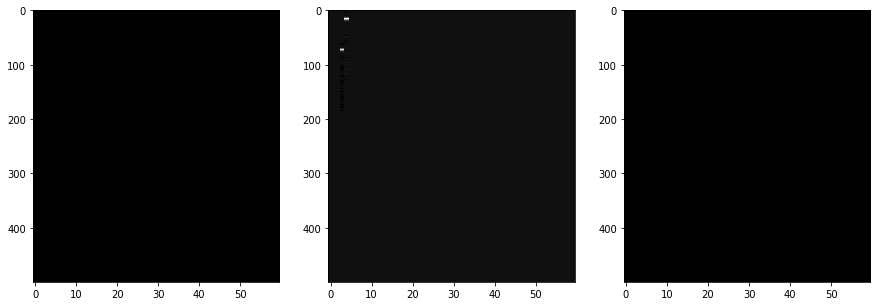

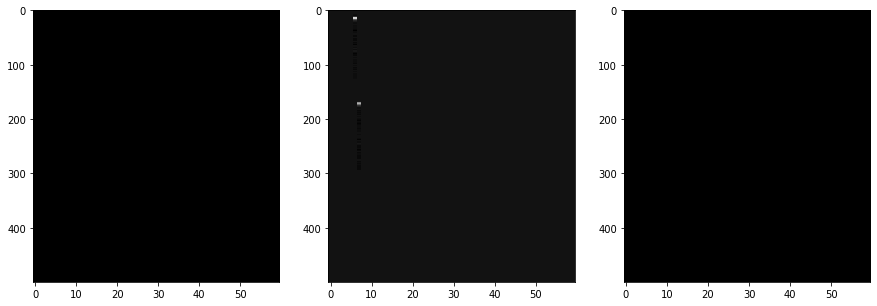

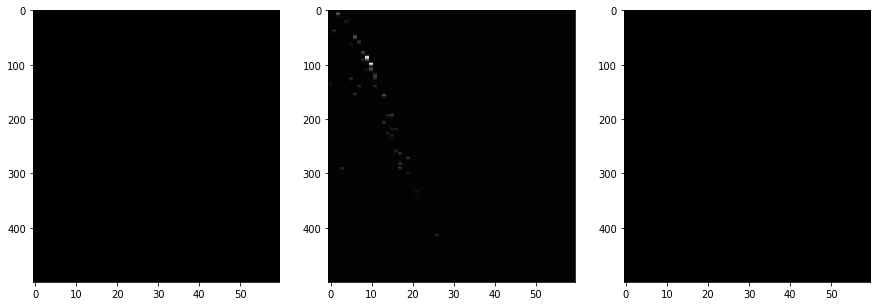

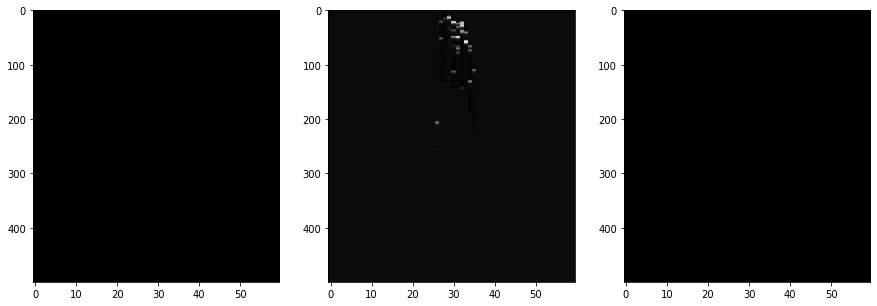

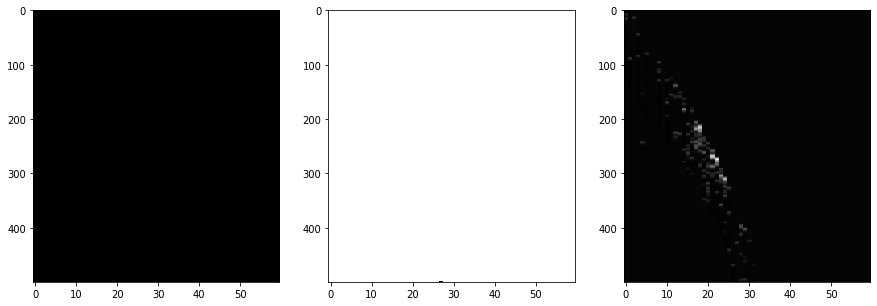

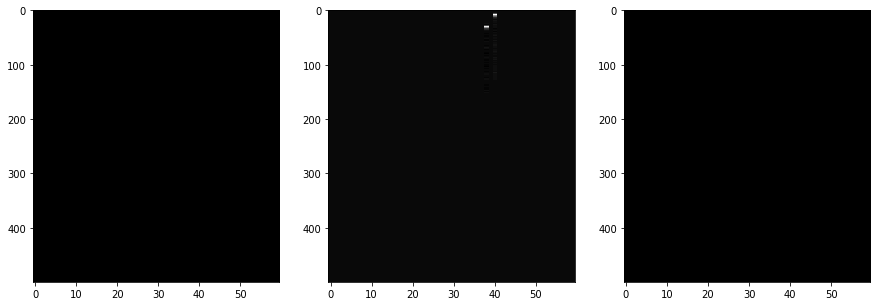

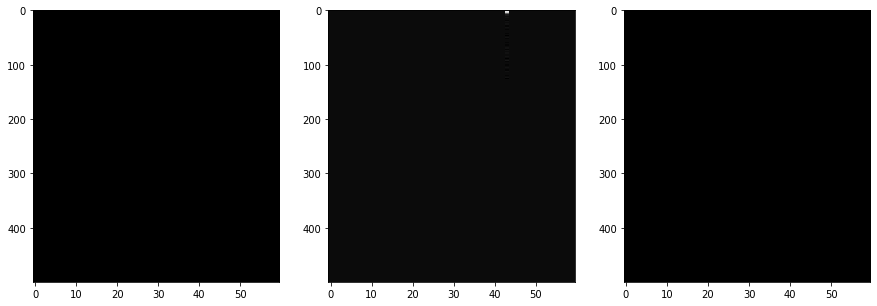

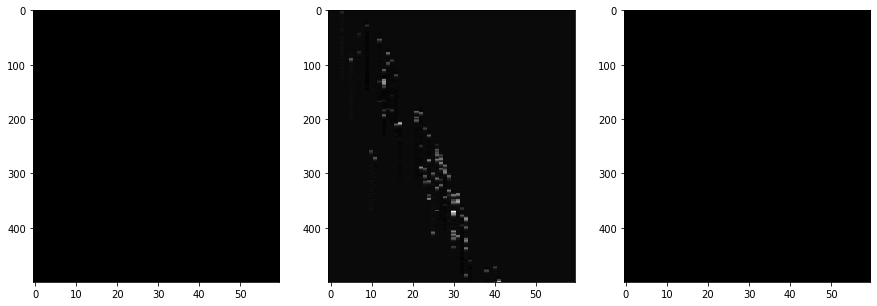

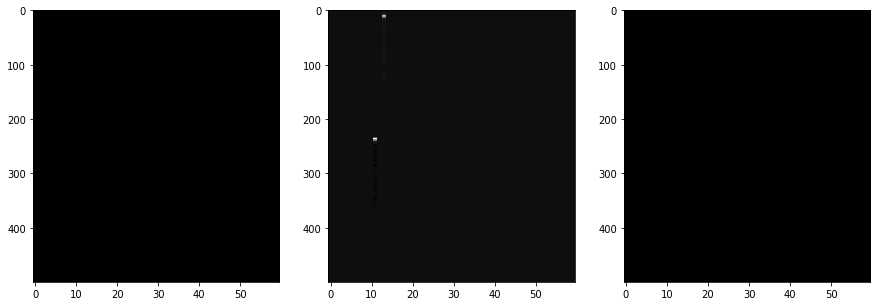

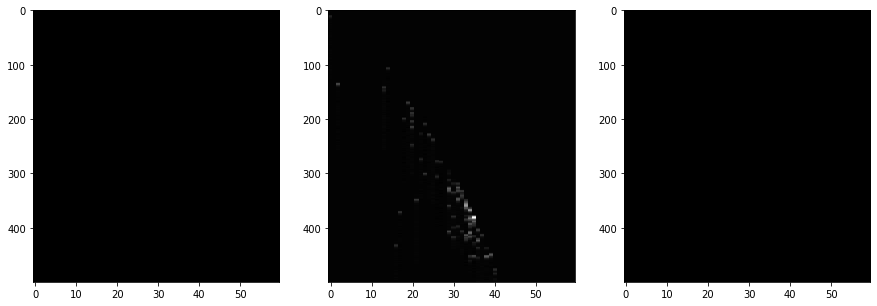

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    if pos >30:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    #im = (x['image']-mean)/std
    #pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #im = (x['image']-mean_3)/std_3
    #pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #cut1=0.56
    #cut2=0.6
    for n,e in enumerate(x):
        if pos >30:
            break
        #ch = (cut1 <= pred_n1[n]) and (pred_n1[n] <= cut2) and (cut1 <= pred_n1[n]) and (pred_n4[n] <= cut2)
        #print(pos)
        #print(np.sum(e['image'][0,:,:,0]))
        if np.sum(e['image'][0,:,:,0])==0:
            print(e['qst'],e['qtot'],e['primary']['position'])
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)

In [15]:
# pos = 0
# print(name)
# start = time.time()
# print("hello")
# start = time.time()
# data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
# print('#.npz files = ',n_files)
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#  #   print(x.dtype)
#     print(file_name, x.shape)
#     y = np.zeros(x.shape[0],dtype = save_dtype)    
#      #Get_preds    
#     for n,e in enumerate(x):    #mean = np.mean(im)
#         im = (e['image']-mean)/std
#         pred_n1 = model.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         pred_n2 = model_m.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         im = (e['image']-mean_3)/std_3
#         pred_n3 = model_3.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         #im = (e['image']-mean_4)/std_4
#         pred_n4 = model_4.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
        
#         #print(pred_mc[0], pred_mc.dtype)
#         preds = np.zeros(1,dtype = preds_dtype)    
#         preds[['n1','n2','n3','n4']] = (pred_n1,pred_n2,pred_n3,pred_n4)
#         weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
#                                  n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
#         y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
#            "logan_veto","hese_old","hese","weight"]][n]=(e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
#                                                          e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
#                                                          e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
#        # print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    
    
#     data[pos:pos+len(x)] = y
#     pos = pos + len(x)
    
# end = time.time()
# print(end - start)

NuE_3_1_1
hello
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuE_3_1_1_data.npz (420, 1)
105.5365993976593
